In [1]:
#ultima version 13/12
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.neighbors import LocalOutlierFactor  
data = pd.read_csv('./Datos/ultimotesis_completo_EDITADO.csv')


x = data.iloc[:,:-1]
y = data.iloc[:,-1].values
data.head(10)
data.shape

(3908, 23)

In [2]:
#ANALISIS EXPLORATORIO DE DATOS
data.head()

ProductoCodigo                      Nombre  ImpuestoId Impuesto  \
0             357                    BATERIAS           1   IVA 21   
1             361                  MATERIALES           1   IVA 21   
2             364             ROPA DE TRABAJO           1   IVA 21   
3             372  COMBUSTIBLES Y LUBRICANTES           1   IVA 21   
4             373       MATERIALES ELECTRICOS           1   IVA 21   

                             Descripcion  Activo  CuentaContableCodigo  \
0                  BATERIAS DE VEHICULOS       1                 10478   
1  MATERIALES PARA EL AREA DE PRODUCCION       1                 10422   
2                                    NaN       1                 10372   
3           COMBUSTIBLES Y LUBRINCANTES.       1                 10415   
4                                    NaN       0                 10420   

                          CuentaContable  SubRubroCodigo  \
0  REPARACION Y MANTENIMIENTO DE RODADOS              28   
1                MATERIALES COMUNICACIÓN              71   
2                        ROPA DE TRABAJO              76   
3             COMBUSTIBLES Y LUBRICANTES             159   
4                  MATERIALES ELECTRICOS              70   

                                   SubRubro  ...  \
0                      BATERÍAS AUTOMOTICES  ...   
1  ROUTER DE CONEXIÓN AÉREA Y PARA INTERIOR  ...   
2           EQUIPAMIENTO Y MATERIALES AUDIO  ...   
3        REPARACIÓN Y MANTENIMIENTO RODADOS  ...   
4           MATERIALES DE CONEXIONES VARIOS  ...   

                                Subclasificacion ClasificacionCodigo  \
0                                        ENERGÍA                   1   
1  EQUIPAMIENTO CON PROCESAMIENTO DE INFORMACIÓN                   3   
2                          EQUIPAMIENTO TV/RADIO                   4   
3        SERVICIOS DE REPARACIÓN Y MANTENIMIENTO                   8   
4  EQUIPAMIENTO CON PROCESAMIENTO DE INFORMACIÓN                   3   

                          Clasificacion UnidadCodigo  Unidad PrecioVenta  \
0                      CABLES Y ENERGÍA            1  UNIDAD         NaN   
1  EQUIPAMIENTO DE REDES/COMUNICACIONES            1  UNIDAD         NaN   
2           BIENES E INSUMOS MATERIALES            1  UNIDAD         NaN   
3                   SERVICIOS GENERALES            1  UNIDAD         NaN   
4  EQUIPAMIENTO DE REDES/COMUNICACIONES            1  UNIDAD         NaN   

   Stock MovimientosStock MovimientoCantidad  ImporteCompra  
0      3              NaN                NaN     69670,0014  
1      1              NaN                NaN      14504,262  
2     10              NaN                NaN    809293,3516  
3     12              NaN                NaN     71329,4947  
4      1              0.0                0.0     41655,0988  

[5 rows x 23 columns]

In [3]:
data.shape

(3908, 23)

In [ ]:
#ANALISIS EXPLORATORIO DE DATOS

In [10]:
# descripción de los tipos de datos del DATASET DATA
data.dtypes

ProductoCodigo              int64
Nombre                     object
ImpuestoId                  int64
Impuesto                   object
Descripcion                object
Activo                      int64
CuentaContableCodigo        int64
CuentaContable             object
SubRubroCodigo              int64
SubRubro                   object
RubroCodigo                 int64
Rubro                      object
SubclasificacionCodigo      int64
Subclasificacion           object
ClasificacionCodigo         int64
Clasificacion              object
UnidadCodigo                int64
Unidad                     object
PrecioVenta                object
Stock                     float64
MovimientosStock          float64
MovimientoCantidad        float64
ImporteCompra              object
dtype: object

In [30]:
#6
data.dtypes
print(data.describe())

       ProductoCodigo   ImpuestoId       Activo  CuentaContableCodigo  \
count     3908.000000  3908.000000  3908.000000           3908.000000   
mean      3944.606192     2.260491     0.924514          10449.074463   
std       1277.680878     1.655267     0.264208            257.779369   
min        357.000000     1.000000     0.000000           1674.000000   
25%       2904.750000     1.000000     1.000000          10420.000000   
50%       3930.500000     2.000000     1.000000          10422.000000   
75%       5002.250000     2.000000     1.000000          10601.000000   
max       6159.000000     6.000000     1.000000          10772.000000   

       SubRubroCodigo  RubroCodigo  SubclasificacionCodigo  \
count     3908.000000  3908.000000             3908.000000   
mean        74.821136    36.305527               14.455476   
std         40.644104    17.553991                6.185124   
min          1.000000     1.000000                1.000000   
25%         58.750000    28.0000

In [118]:
#7
# Registros con algún valor negativo en cualquier columna
data_numeric = data.select_dtypes(include=[int, float])

registros_negativos = (data_numeric < 0).any(axis=1).sum()

print(f"Número de registros con valores negativos: {registros_negativos}")



Número de registros con valores negativos: 0


In [117]:
#8
#Cuales tienen valores null
data.isnull().sum()


ProductoCodigo               0
Nombre                       0
ImpuestoId                   0
Impuesto                     0
Descripcion               2375
Activo                       0
CuentaContableCodigo         0
CuentaContable               0
SubRubroCodigo               0
SubRubro                     0
RubroCodigo                  0
Rubro                        0
SubclasificacionCodigo       0
Subclasificacion             0
ClasificacionCodigo          0
Clasificacion                0
UnidadCodigo                 0
Unidad                       0
PrecioVenta               3283
Stock                        0
MovimientosStock           787
MovimientoCantidad         787
ImporteCompra             2695
cluster                      0
TieneDescripcion             0
dtype: int64

In [75]:
#9
data.tail(10)

ProductoCodigo                                             Nombre  \
3898            6146                     ROUTER CR2116-12G-4S 16 GB RAM   
3899            6147  SOPORTE TRAPECIO 300MM DOBLE SUSPENSION PARA B...   
3900            6148                              SELLOS PERSONALIZADOS   
3901            6149        IMPRESORA LASER B230V DNIA 34PPM LAN + WIFI   
3902            6154      TABLET 10´ PROCESADOR  QUAD CORE  RAM 2GB 32G   
3903            6155                              SMARTWATCH NM-PLUS BT   
3904            6156                        ETHERNET ADAPTADOR STARLINK   
3905            6157                     PIZARRA BLANCA MARCO ALUMINIO    
3906            6158               BORRADOR DE PIZARRA CON 3 MARCADORES   
3907            6159     PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V   

      ImpuestoId  Impuesto                                    Descripcion  \
3898           1    IVA 21      16GB RAM, 13xGb Ethernet y 4xSFP+ Puertos   
3899           1    IVA 21                                            NaN   
3900           1    IVA 21                                            NaN   
3901           2  IVA 10,5                                            NaN   
3902           2  IVA 10,5             Tablet para Donacion TK 21216/2024   
3903           1    IVA 21  relojes digitales para Donacion TK 21216/2024   
3904           1    IVA 21                                            NaN   
3905           1    IVA 21                                            NaN   
3906           1    IVA 21                                            NaN   
3907           1    IVA 21                                            NaN   

      Activo  CuentaContableCodigo              CuentaContable  \
3898       1                 10422     MATERIALES COMUNICACIÓN   
3899       1                 10422     MATERIALES COMUNICACIÓN   
3900       1                 10082            MUEBLES Y UTILES   
3901       1                 10089  MAQUINAS Y EQUIPOS EMPRESA   
3902       1                 10073  EQUIPOS - Bienes de Cambio   
3903       1                 10073  EQUIPOS - Bienes de Cambio   
3904       1                 10422     MATERIALES COMUNICACIÓN   
3905       1                 10082            MUEBLES Y UTILES   
3906       1                 10082            MUEBLES Y UTILES   
3907       1                 10422     MATERIALES COMUNICACIÓN   

      SubRubroCodigo                                           SubRubro  ...  \
3898              72  SOHO (MODEM-ROUTER-SWITCH DE TIPO SMALL OFFICE...  ...   
3899              75                      OTROS CCESORIOS PARA CABLEADO  ...   
3900              86           ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...   
3901              93                                         IMPRESORAS  ...   
3902             236                             CELULARES Y ACCESORIOS  ...   
3903             236                             CELULARES Y ACCESORIOS  ...   
3904              95            PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA  ...   
3905              86           ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...   
3906              86           ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...   
3907              75                      OTROS CCESORIOS PARA CABLEADO  ...   

                                   Subclasificacion ClasificacionCodigo  \
3898  EQUIPAMIENTO CON PROCESAMIENTO DE INFORMACIÓN                   3   
3899                                INFRAESTRUCTURA                   3   
3900                    EQUIPOS ELEMENTOS E INSUMOS                   4   
3901                    EQUIPOS ELEMENTOS E INSUMOS                   4   
3902                    EQUIPOS ELEMENTOS E INSUMOS                   4   
3903                    EQUIPOS ELEMENTOS E INSUMOS                   4   
3904                    EQUIPOS ELEMENTOS E INSUMOS                   4   
3905                    EQUIPOS ELEMENTOS E INSUMOS                   4   
3906                    EQUIPOS ELEMENTOS E INSUM

In [119]:
#10
# Reemplo los valores NULL o NaN en PrecioVenta por ceros
data['PrecioVenta'] = data['PrecioVenta'].fillna(0)
print(data.isnull().sum())

ProductoCodigo               0
Nombre                       0
ImpuestoId                   0
Impuesto                     0
Descripcion               2375
Activo                       0
CuentaContableCodigo         0
CuentaContable               0
SubRubroCodigo               0
SubRubro                     0
RubroCodigo                  0
Rubro                        0
SubclasificacionCodigo       0
Subclasificacion             0
ClasificacionCodigo          0
Clasificacion                0
UnidadCodigo                 0
Unidad                       0
PrecioVenta                  0
Stock                        0
MovimientosStock           787
MovimientoCantidad         787
ImporteCompra             2695
cluster                      0
TieneDescripcion             0
dtype: int64


In [120]:
#11
# Reviso los valores faltantes
print("Valores faltantes por columna:")
print(data.isnull().sum())

# Columna específicas para aplicar la media
columnas_para_imputar = ['PrecioVenta']

# Reemplo las comas por puntos en las columnas relevantes
data['PrecioVenta'] = data['PrecioVenta'].str.replace(',', '.', regex=False)
# Convertir la columna a tipo numérico
data['PrecioVenta'] = pd.to_numeric(data['PrecioVenta'], errors='coerce')





# Mostrar las columnas con valores faltantes en las columnas con decimales
print("Valores faltantes en columnas con decimales:")
print(data[columnas_para_imputar].isnull().sum())
# Imputar la media solo en las columnas con decimales


# Verificar que ya no haya valores faltantes en las columnas con decimales
print("Valores faltantes después de la imputación en columnas con decimales:")
#print(data[columnas_para_imputar].isnull().sum())


Valores faltantes por columna:
ProductoCodigo               0
Nombre                       0
ImpuestoId                   0
Impuesto                     0
Descripcion               2375
Activo                       0
CuentaContableCodigo         0
CuentaContable               0
SubRubroCodigo               0
SubRubro                     0
RubroCodigo                  0
Rubro                        0
SubclasificacionCodigo       0
Subclasificacion             0
ClasificacionCodigo          0
Clasificacion                0
UnidadCodigo                 0
Unidad                       0
PrecioVenta                  0
Stock                        0
MovimientosStock           787
MovimientoCantidad         787
ImporteCompra             2695
cluster                      0
TieneDescripcion             0
dtype: int64
Valores faltantes en columnas con decimales:
PrecioVenta    3283
dtype: int64
Valores faltantes después de la imputación en columnas con decimales:


In [5]:
#11#
Filtrar solo columnas numéricas
columnas_numericas = data.select_dtypes(include=[int, float]).columns
# Mostrar columnas numéricas con valores faltantes
print("Valores faltantes en columnas numéricas:")
print(data[columnas_numericas].isnull().sum())

Valores faltantes en columnas numéricas:
ProductoCodigo              0
ImpuestoId                  0
Activo                      0
CuentaContableCodigo        0
SubRubroCodigo              0
RubroCodigo                 0
SubclasificacionCodigo      0
ClasificacionCodigo         0
UnidadCodigo                0
Stock                       0
MovimientosStock          787
MovimientoCantidad        787
dtype: int64


In [ ]:
#ANALISIS DE CORRELACION

#12
#ANALISIS DE CORRELACION
# CORRELACION Seleccionar solo las columnas numéricas
columnas =  ['ImpuestoId','Activo','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
            ,'Stock','PrecioVenta','MovimientosStock','MovimientoCantidad']


data_seleccionada = data[columnas]

In [ ]:
#HICE ESTO
# Reemplazar las comas por puntos en las columnas relevantes
#data[columnas] = data[columnas].str.replace(',', '.', regex=False)
# Convertir la columna a tipo numérico
#data[columnas] = pd.to_numeric(data[columnas], errors='coerce')

In [126]:
# Calcular la matriz de correlación

corr_matrix = data_seleccionada.corr()

# Imprimir la matriz de correlación
print(corr_matrix)
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag_r', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()


ValueError: could not convert string to float: '3760,59'

In [8]:
#14
#Vamos a agregar una nueva variable para descripcion
# Crear la nueva columna 'TieneDescripcion' basada en si 'descripcion' tiene valores nulos o no
data['TieneDescripcion'] = np.where(data['Descripcion'].isnull(), 0, 1)

# Verificar el resultado
print(data[['Descripcion', 'TieneDescripcion']])

                                        Descripcion  TieneDescripcion
0                             BATERIAS DE VEHICULOS                 1
1             MATERIALES PARA EL AREA DE PRODUCCION                 1
2                                               NaN                 0
3                      COMBUSTIBLES Y LUBRINCANTES.                 1
4                                               NaN                 0
...                                             ...               ...
3903  relojes digitales para Donacion TK 21216/2024                 1
3904                                            NaN                 0
3905                                            NaN                 0
3906                                            NaN                 0
3907                                            NaN                 0

[3908 rows x 2 columns]


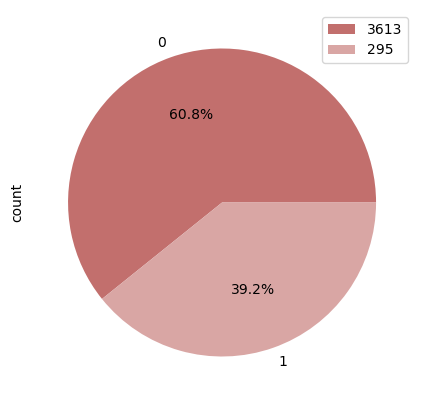

In [10]:
#14
# Se muestra el porcentaje de la muestra para cada una de los dos valores TieneDescipcion
#AGREGADO A LA TESIS
import seaborn as sns
color=sns.color_palette("vlag_r")
data['TieneDescripcion'].value_counts().plot(kind='pie',colors=color,autopct='%1.1f%%',figsize=(5,5))
plt.show
varValue = data.Activo.value_counts()
plt.legend(list(varValue))
plt.show()

In [112]:
#15
#COmprobación de chi cuadrada - 
tabla_contingencia = pd.crosstab(data['Clasificacion'], data['Subclasificacion'])
print(tabla_contingencia)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Estadístico Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")

Subclasificacion                      ACERO  COBRE  COSTOS PERSONAL  DISCOS  \
Clasificacion                                                                 
BIENES E INSUMOS MATERIALES               0      0                0       0   
CABLES Y ENERGÍA                          4    230                0       0   
DESARROLLO DE SOFTWARE                    0      0                0       0   
EQUIPAMIENTO DE REDES/COMUNICACIONES      0      0                0       0   
HERRAMIENTAS                              0      0                0      12   
LICENCIAS, DERECHOS Y SUSCRIPCIONES       0      0                0       0   
RAE                                       0      0                0       0   
RRHH                                      0      0               25       0   
SERVICIOS GENERALES                       0      0                0       0   

Subclasificacion                      ELECTRÓNICAS  ELÉCTRICAS  ENERGÍA  \
Clasificacion                                          

In [145]:
#analisi de NUEVAS COMBINACIONES
data['ClasificacionCompleta'] = data['Clasificacion'] + ' - ' + data['Subclasificacion'] + ' - ' + data['Rubro'] + ' - ' + data['SubRubro']
#data['ClasificacionCompletaCod'] =  data['SubclasificacionCodigo'] + ' - ' + data['RubroCodigo'] + ' - ' + data['SubRubrCodigo']
data['InformacionFinanciera'] = data['CuentaContableCodigo'].astype(str) + '-' + data['ImpuestoId'].astype(str) + '-' + data['PrecioVenta'].astype(str)

#Combinación "Unidad de Medida y Impuesto"
data['UnidadImpuesto'] = data['Unidad'] + ' - ' + data['Impuesto']

#data['DesempenoInventario'] = (data['MovimientosStock'] / (data['Stock'] + 1)) * data['ImporteCompra'].astype(float)
#data['PrecioStockRatio'] = data['PrecioVenta'].astype(float) / (data['Stock'] + 1)  # Evitar división por 0

data['ClasificacionDescripcion'] = data['Clasificacion'] + ' - ' + data['Descripcion'].fillna('')

data['ActivoPrecio'] = data['Activo'].astype(str) + '-' + data['PrecioVenta'].astype(str)
data['ActivoPrecio'] = data['Activo'].astype(str) 

In [398]:
#Vuelvo a calcular la matriz de corre
columnas =  ['ImpuestoId','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
            ,'Stock','PrecioVenta','MovimientosStock','MovimientoCantidad']

#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data[columnas]
# Calcular la matriz de correlación

corr_matrix = data_seleccionada.corr()

# Imprimir la matriz de correlación
print(corr_matrix)
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag_r', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

KeyError: "['ImpuestoId', 'CuentaContableCodigo', 'UnidadCodigo', 'PrecioVenta', 'MovimientosStock', 'MovimientoCantidad'] not in index"

                          Activo  CuentaContableCodigo  SubRubroCodigo  \
Activo                  1.000000             -0.009959        0.005726   
CuentaContableCodigo   -0.009959              1.000000       -0.019850   
SubRubroCodigo          0.005726             -0.019850        1.000000   
RubroCodigo            -0.003414              0.031315        0.774409   
SubclasificacionCodigo -0.032991              0.082962        0.638913   
ClasificacionCodigo    -0.015476              0.040217        0.602756   
TieneDescripcion       -0.040232             -0.038052       -0.067327   

                        RubroCodigo  SubclasificacionCodigo  \
Activo                    -0.003414               -0.032991   
CuentaContableCodigo       0.031315                0.082962   
SubRubroCodigo             0.774409                0.638913   
RubroCodigo                1.000000                0.824171   
SubclasificacionCodigo     0.824171                1.000000   
ClasificacionCodigo        0.

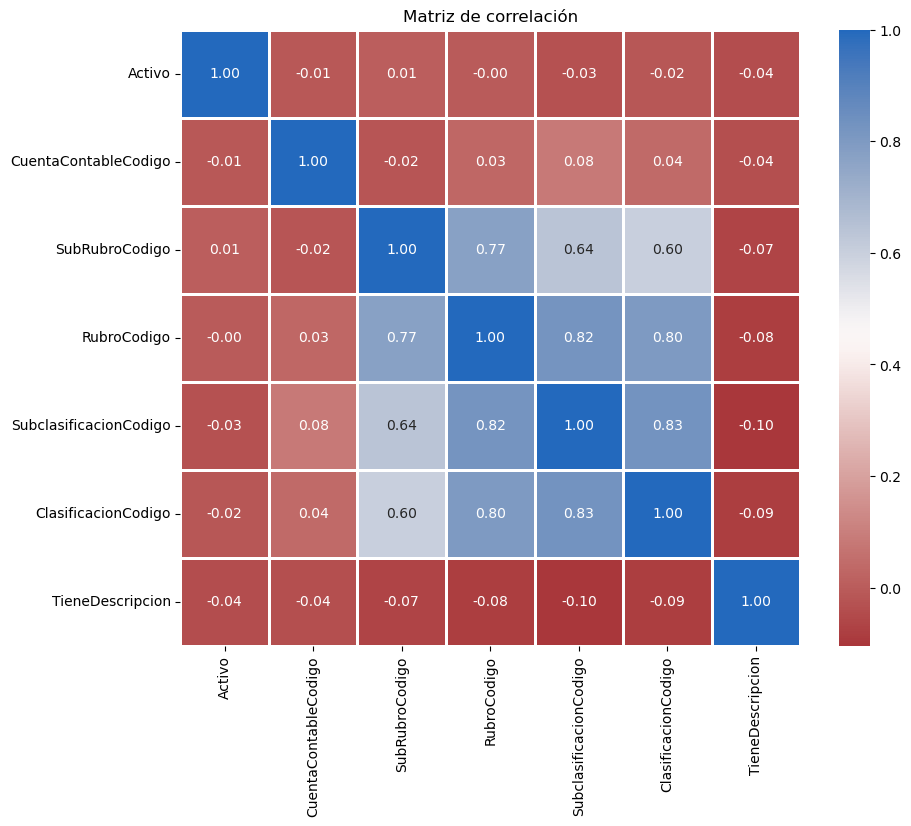

In [95]:
#ANALISIS DE CORRELACION
#Vuelvo a calcular la matriz de corre

columnas =  ['Activo','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','TieneDescripcion']
#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data[columnas]
# Calculo la matriz de correlación

corr_matrix = data_seleccionada.corr()

print(corr_matrix)
# Visualizo
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,linecolor='white', linewidths=1,cmap='vlag_r', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4368\1118756391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Clasificacion', palette='vlag_r')


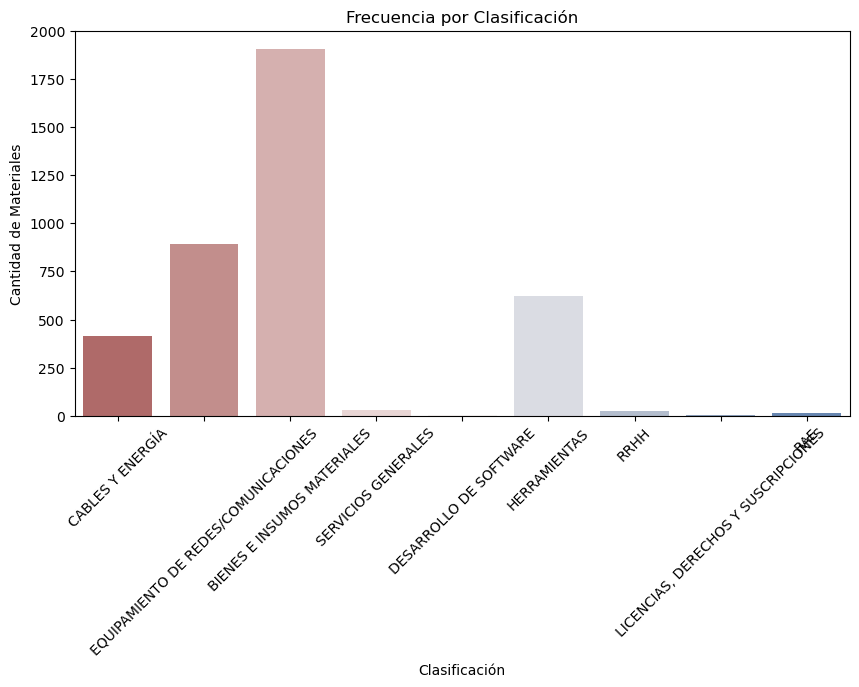

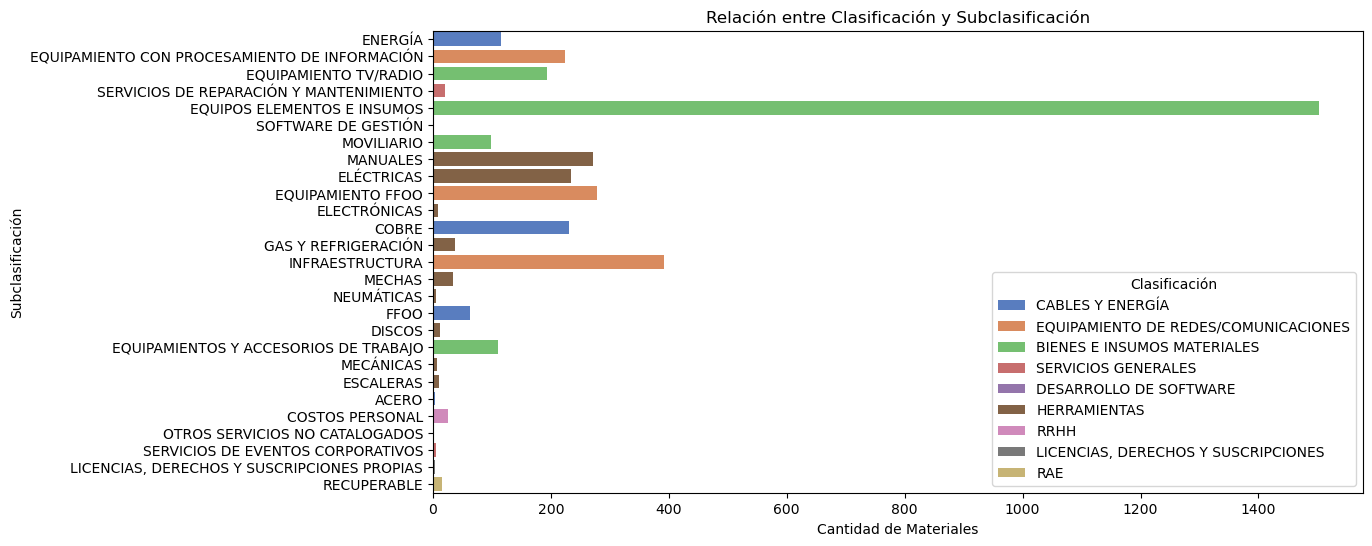

AttributeError: 'Text' object has no property 'labelrotation'

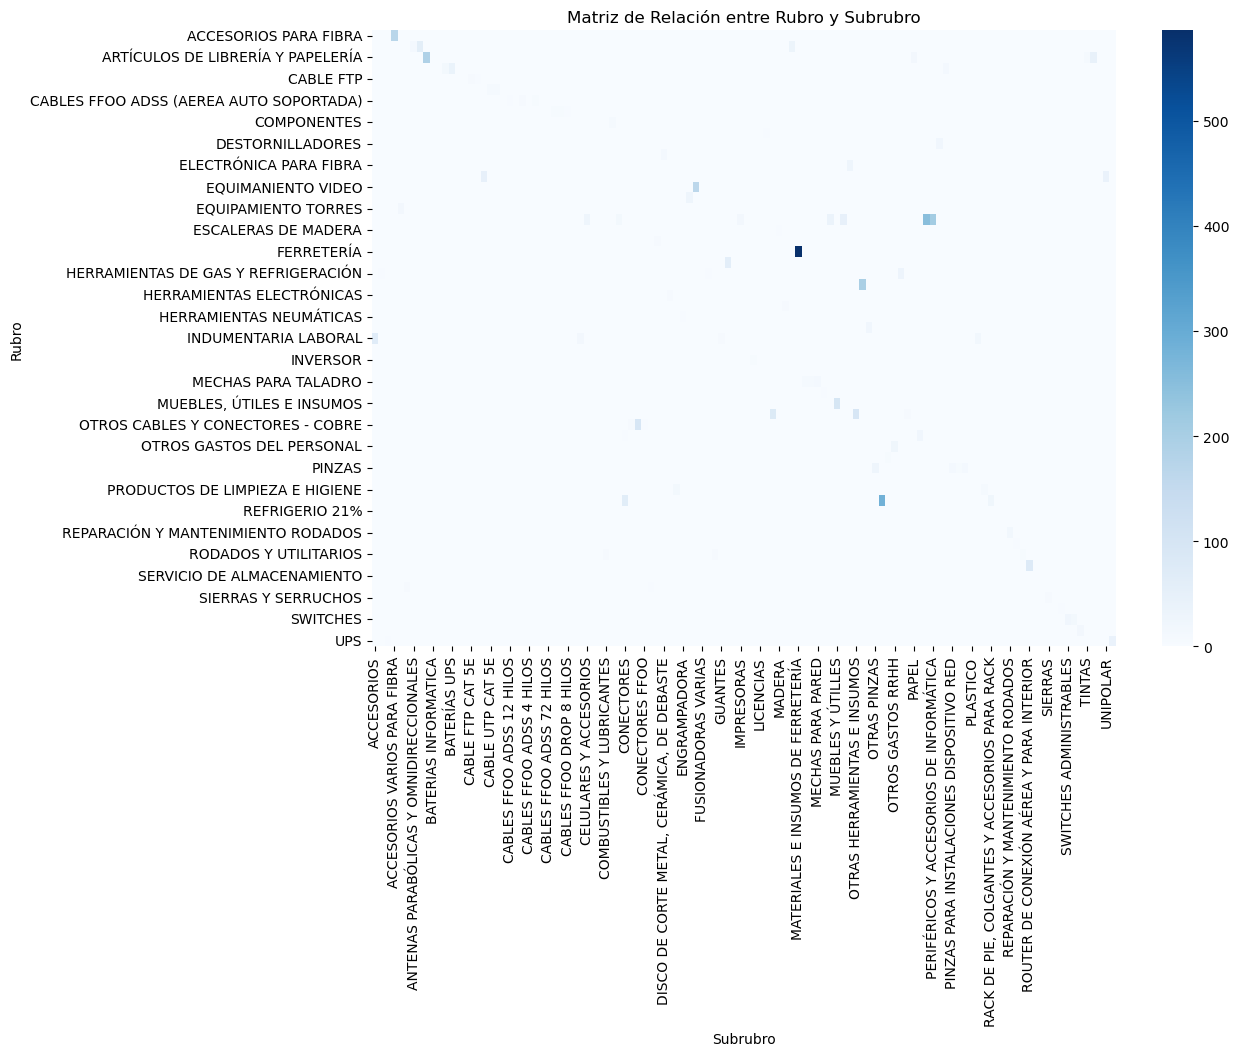

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras para mostrar la frecuencia de categorías en "Clasificación"
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Clasificacion', palette='vlag_r')
plt.title('Frecuencia por Clasificación')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de Materiales')
plt.xticks(rotation=45)
plt.show()

# Gráfico jerárquico: relación entre Subclasificación y Clasificación
plt.figure(figsize=(12, 6))
#sns.countplot(data=data, y='Subclasificacion', hue='Clasificacion', palette='muted')
sns.countplot(data=data, y='Subclasificacion', hue='Clasificacion', palette='muted')
plt.title('Relación entre Clasificación y Subclasificación')
plt.xlabel('Cantidad de Materiales')
plt.ylabel('Subclasificación')
plt.legend(title='Clasificación')
plt.show()

# Matriz de calor para analizar relaciones entre Rubro y Subrubro
contingencia = pd.crosstab(data['Rubro'], data['SubRubro'])
plt.figure(figsize=(12, 8))
sns.heatmap(contingencia, cmap='Blues', annot=False, cbar=True,color='Black')
plt.title('Matriz de Relación entre Rubro y Subrubro')
plt.xlabel('Subrubro',labelrotation=45)
plt.ylabel('Rubro')
plt.show()

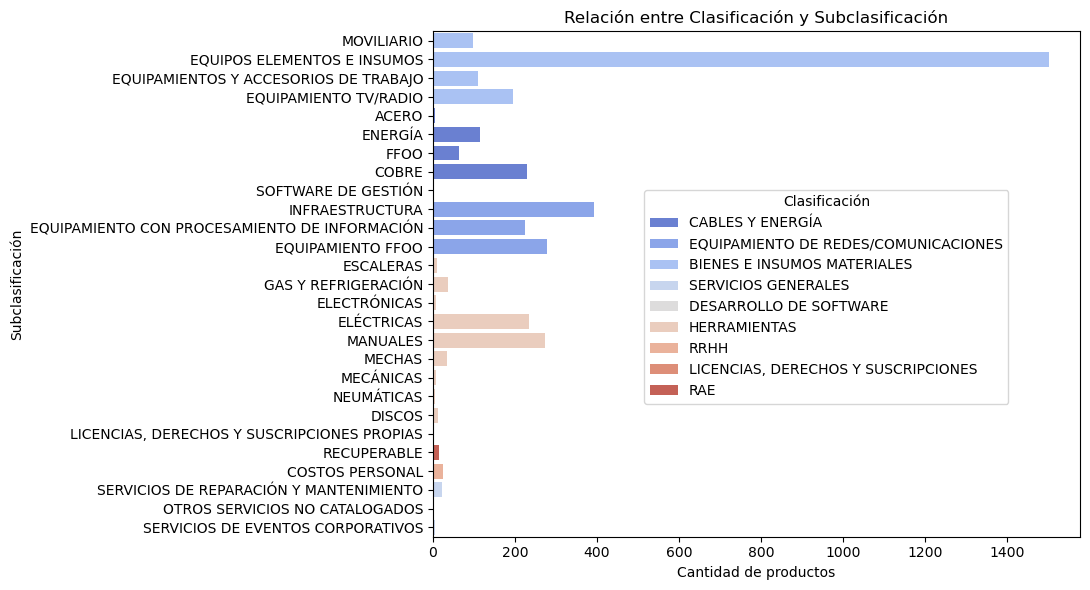

In [102]:
#relación grafica entre CLasificion y SUbclasificacion
import matplotlib.pyplot as plt
import seaborn as sns

# Ordenar las subclasificaciones basadas en la clasificación
orden_subclasificacion = data.groupby('Subclasificacion')['Clasificacion'].first().sort_values().index

# Crear el gráfico jerárquico con el eje Y ordenado palette='vlag_a'
plt.figure(figsize=(11, 6))
sns.countplot(data=data, y='Subclasificacion', hue='Clasificacion',order=orden_subclasificacion,palette='coolwarm')  # Ordenamos el eje Y
plt.title('Relación entre Clasificación y Subclasificación')
plt.xlabel('Cantidad de productos')
plt.ylabel('Subclasificación')

plt.legend(title='Clasificación', bbox_to_anchor=(0.9, 0.7), loc='upper right')  # Ajustar posición de la leyendabbox_to_anchor=()
plt.tight_layout()  # Mejorar el espaciado
plt.show()

<Figure size 1200x800 with 0 Axes>

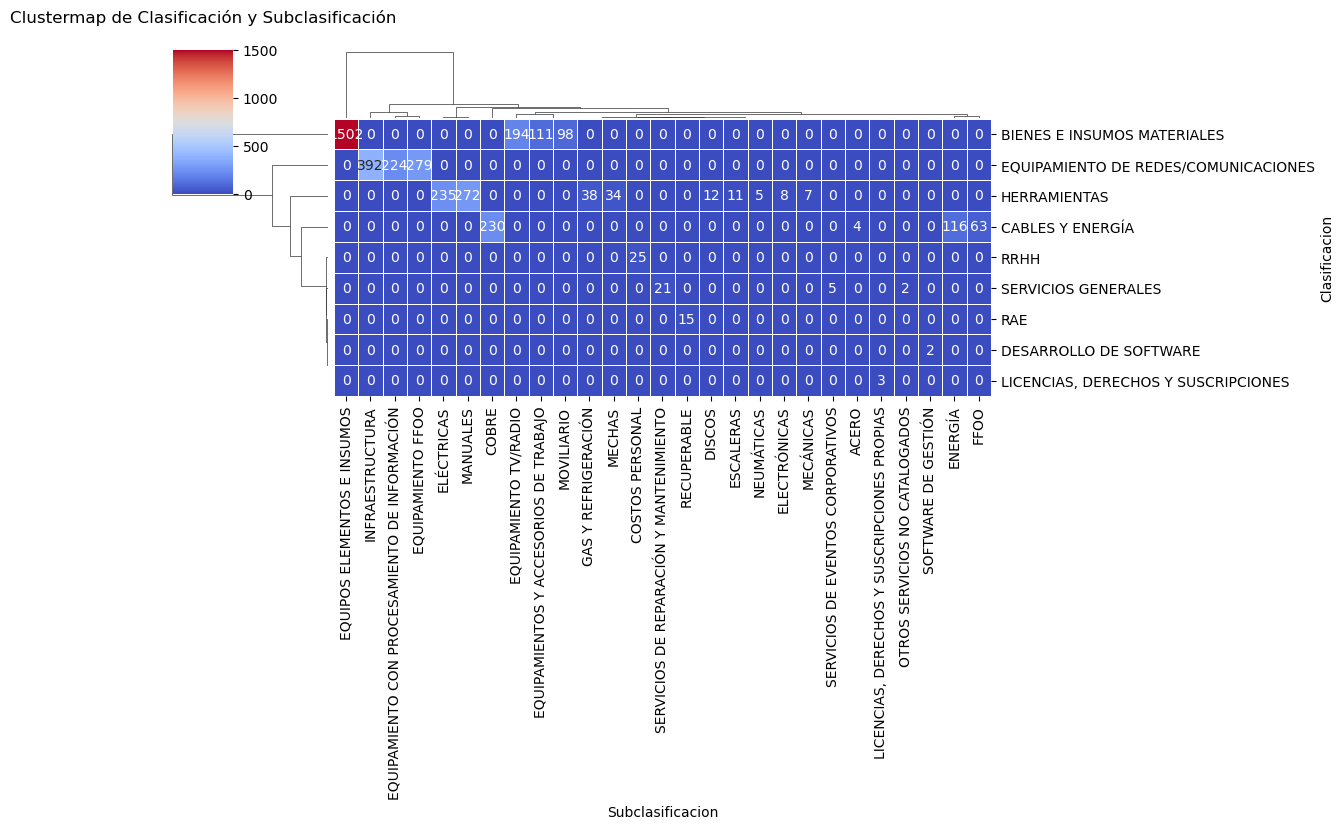

In [96]:
#Clusterpam Clasificación y Subclasificacion
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla cruzada entre Clasificación y Subclasificación
tabla_cruzada = pd.crosstab(data['Clasificacion'], data['Subclasificacion'])

# Crear el clustermap
plt.figure(figsize=(12, 8))
sns.clustermap(tabla_cruzada, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, figsize=(12, 8))

# Personalización
plt.title('Clustermap de Clasificación y Subclasificación', loc='center', pad=20)
plt.show()

AttributeError: 'Text' object has no property 'labelrotation'

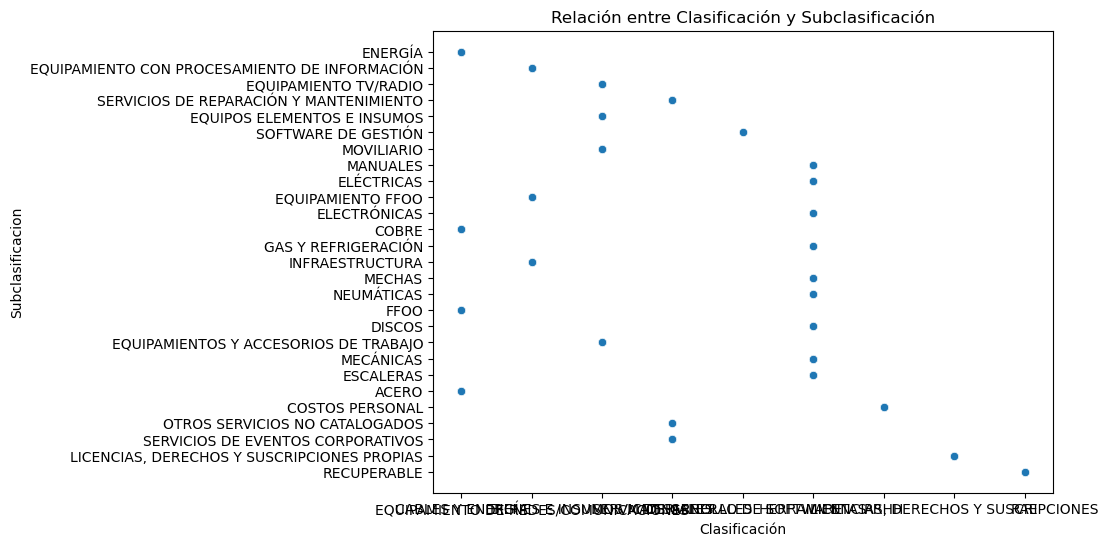

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot para dos variables dependientes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Clasificacion", y="Subclasificacion")
#sns.heatmap(contingencia, cmap='Blues', annot=False, cbar=True)
plt.title("Relación entre Clasificación y Subclasificación")
plt.xlabel("Clasificación")
plt.ylabel("Subclasificacióno")
plt.show()

In [49]:
# Identificar valores nulos
nulos = data.isnull().sum()
nulos_porcentaje = (nulos / len(data)) * 100

# Mostrar resumen de valores nulos
print("Valores nulos por columna:")
print(nulos)
print("\nPorcentaje de valores nulos por columna:")
print(nulos_porcentaje)

# Identificar valores negativos en columnas numéricas
negativos = (data.select_dtypes(include=['number']) < 0).sum()
negativos_porcentaje = (negativos / len(data)) * 100

# Mostrar resumen de valores negativos
print("\nValores negativos por columna:")
print(negativos)
print("\nPorcentaje de valores negativos por columna:")
print(negativos_porcentaje)





Valores nulos por columna:
ProductoCodigo               0
Nombre                       0
ImpuestoId                   0
Impuesto                     0
Descripcion               2375
Activo                       0
CuentaContableCodigo         0
CuentaContable               0
SubRubroCodigo               0
SubRubro                     0
RubroCodigo                  0
Rubro                        0
SubclasificacionCodigo       0
Subclasificacion             0
ClasificacionCodigo          0
Clasificacion                0
UnidadCodigo                 0
Unidad                       0
PrecioVenta               3283
Stock                        0
MovimientosStock           787
MovimientoCantidad         787
ImporteCompra             2695
TieneDescripcion             0
dtype: int64

Porcentaje de valores nulos por columna:
ProductoCodigo             0.000000
Nombre                     0.000000
ImpuestoId                 0.000000
Impuesto                   0.000000
Descripcion               60.7

                       Stock  MovimientosStock  MovimientoCantidad  \
Stock               1.000000          0.003491            0.270186   
MovimientosStock    0.003491          1.000000            0.120049   
MovimientoCantidad  0.270186          0.120049            1.000000   
TieneDescripcion    0.021469          0.052025            0.024283   

                    TieneDescripcion  
Stock                       0.021469  
MovimientosStock            0.052025  
MovimientoCantidad          0.024283  
TieneDescripcion            1.000000  


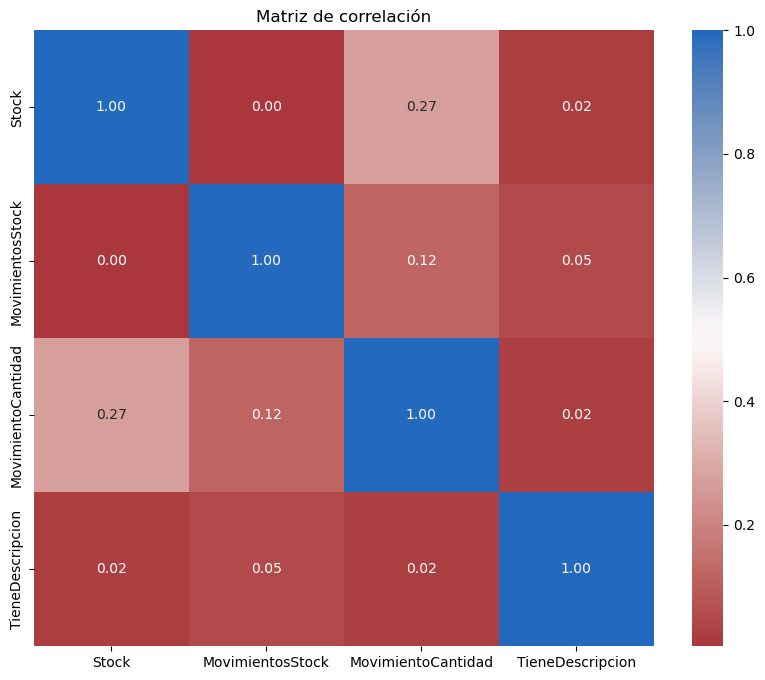

In [14]:
#Vuelvo a calcular la matriz de corre
columnas =  ['Stock','MovimientosStock','MovimientoCantidad','TieneDescripcion']

#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data[columnas]
# Calcular la matriz de correlación

corr_matrix = data_seleccionada.corr()

# Imprimir la matriz de correlación
print(corr_matrix)
# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='vlag_r', fmt='.2f')#esto agregue que decia mapa de calor
plt.title('Matriz de correlación')
 
plt.show()

In [ ]:
#Como no obtenemos una matriz correlacionada buena trabajamos con las variables 

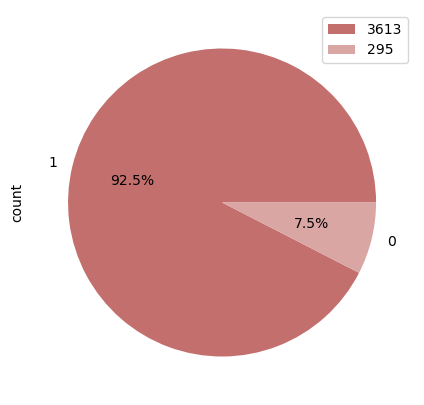

In [30]:
# Se muestra el porcentaje de la muestra para cada una de los dos valores Activo
import seaborn as sns

color=sns.color_palette("vlag_r")
data['Activo'].value_counts().plot(kind='pie',colors=color,autopct='%1.1f%%',figsize=(5,5))
plt.show
varValue = data.Activo.value_counts()
plt.legend(list(varValue))
plt.show()

Clasificacion
BIENES E INSUMOS MATERIALES             1905
EQUIPAMIENTO DE REDES/COMUNICACIONES     895
HERRAMIENTAS                             622
CABLES Y ENERGÍA                         413
SERVICIOS GENERALES                       28
RRHH                                      25
RAE                                       15
LICENCIAS, DERECHOS Y SUSCRIPCIONES        3
DESARROLLO DE SOFTWARE                     2
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4368\1706865766.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Cantidad')

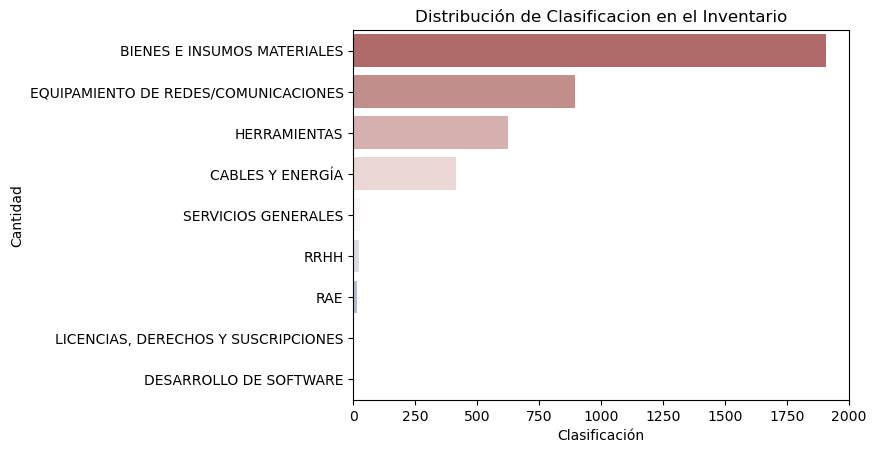

In [15]:
#REVISION DEL BALANCEO DE VARIABLES
# Contar la cantidad de ejemplos por clase (supongamos que la columna 'clase' representa las categorías)
conteo_clases = data['Clasificacion'].value_counts()

# Crear una paleta de colores
color = sns.color_palette("vlag_r", len(conteo_clases))
# Mostrar el conteo de clases
print(conteo_clases)


# Visualizar el balance de clases en un gráfico de barras
sns.barplot(
    x=conteo_clases.values, 
    y=conteo_clases.index, 
    palette=color  # Asignar colores
)
plt.title("Distribución de Clasificacion en el Inventario")
plt.xlabel("Clasificación")
plt.ylabel("Cantidad")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4368\1281418755.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['CuentaContable'], palette=color)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4368\1281418755.py:7: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.boxplot(y=data['CuentaContable'], palette=color)


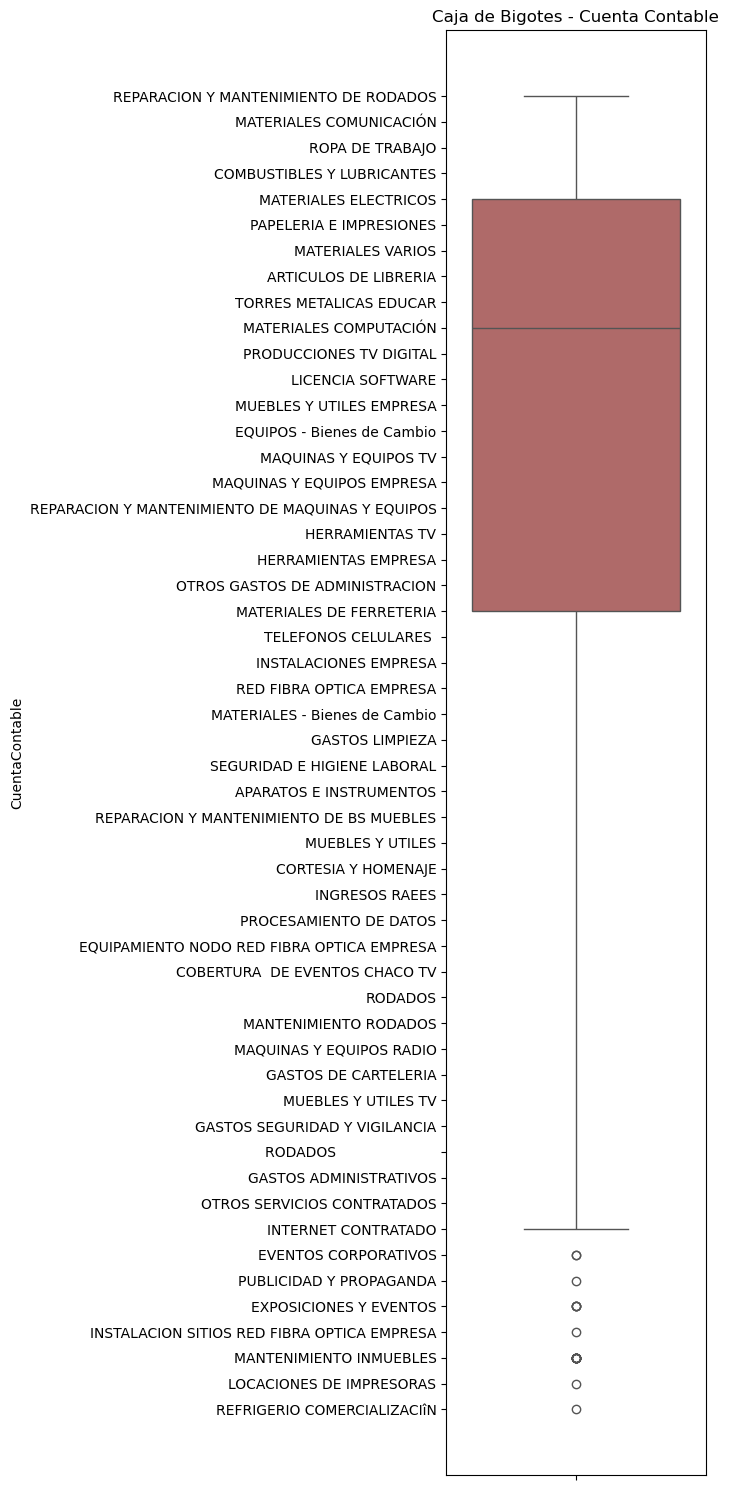

In [40]:
#REVISION DEL BALANCEO DE VARIABLES
# Caja de bigotes para Cuenta contable
plt.figure(figsize=(10, 15))
# Crear una paleta de colores
color = sns.color_palette("vlag_r", len(conteo_clases))
# Boxplot para 'precio'
plt.subplot(1, 2, 1)
sns.boxplot(y=data['CuentaContable'], palette=color)
plt.title('Caja de Bigotes - Cuenta Contable')



plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4368\358305781.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['SubRubro'], palette=color)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4368\358305781.py:7: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.boxplot(y=data['SubRubro'], palette=color)


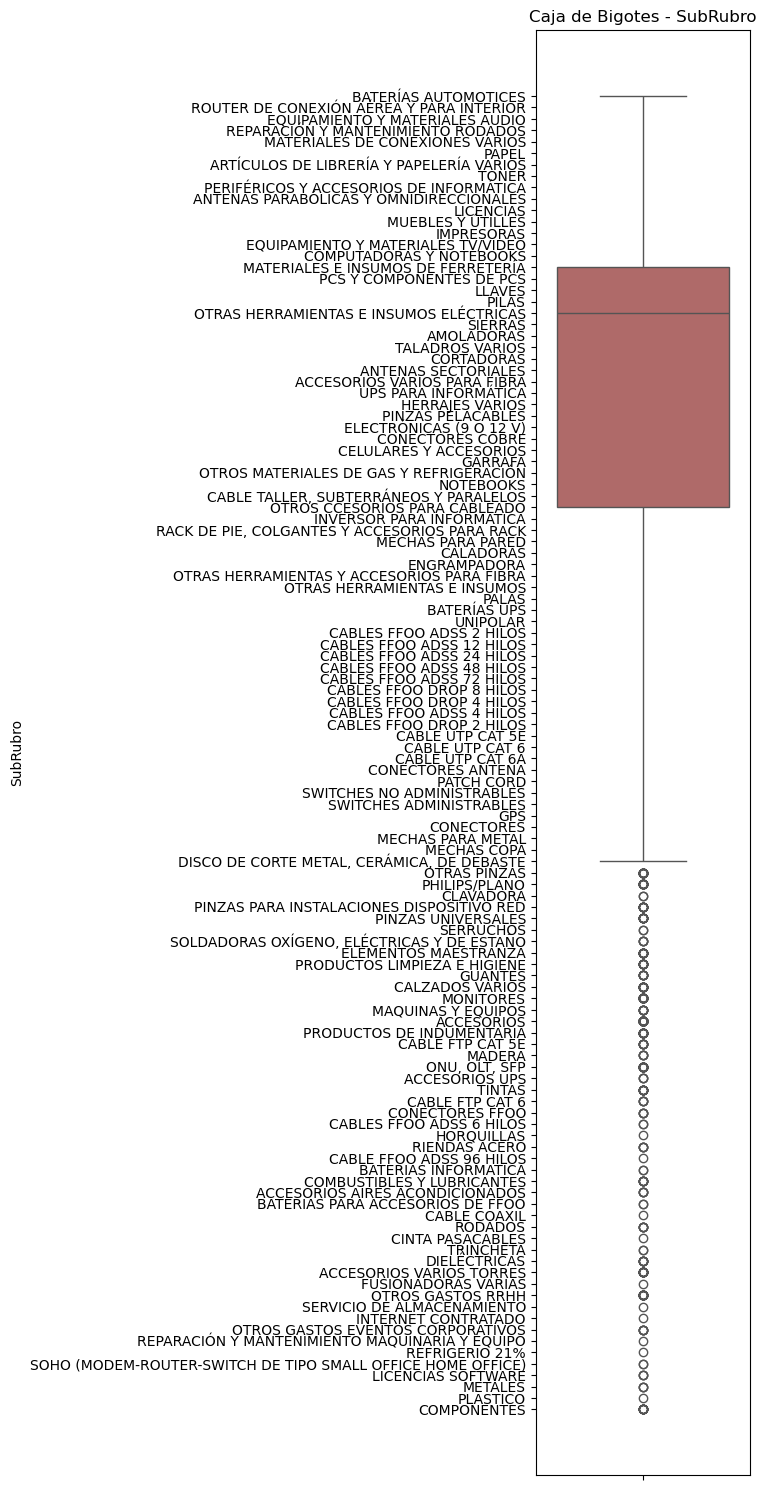

In [38]:
#REVISION DEL BALANCEO DE VARIABLES
# Caja de bigotes para Subro
plt.figure(figsize=(10, 15))
# Crear una paleta de colores
color = sns.color_palette("vlag_r", len(conteo_clases))
# Boxplot para 'precio'
plt.subplot(1, 2, 1)
sns.boxplot(y=data['SubRubro'], palette=color)
plt.title('Caja de Bigotes - SubRubro')



plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4368\1281418755.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data['CuentaContable'], palette=color)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4368\1281418755.py:7: UserWarning: The palette list has more values (9) than needed (1), which may not be intended.
  sns.boxplot(y=data['CuentaContable'], palette=color)


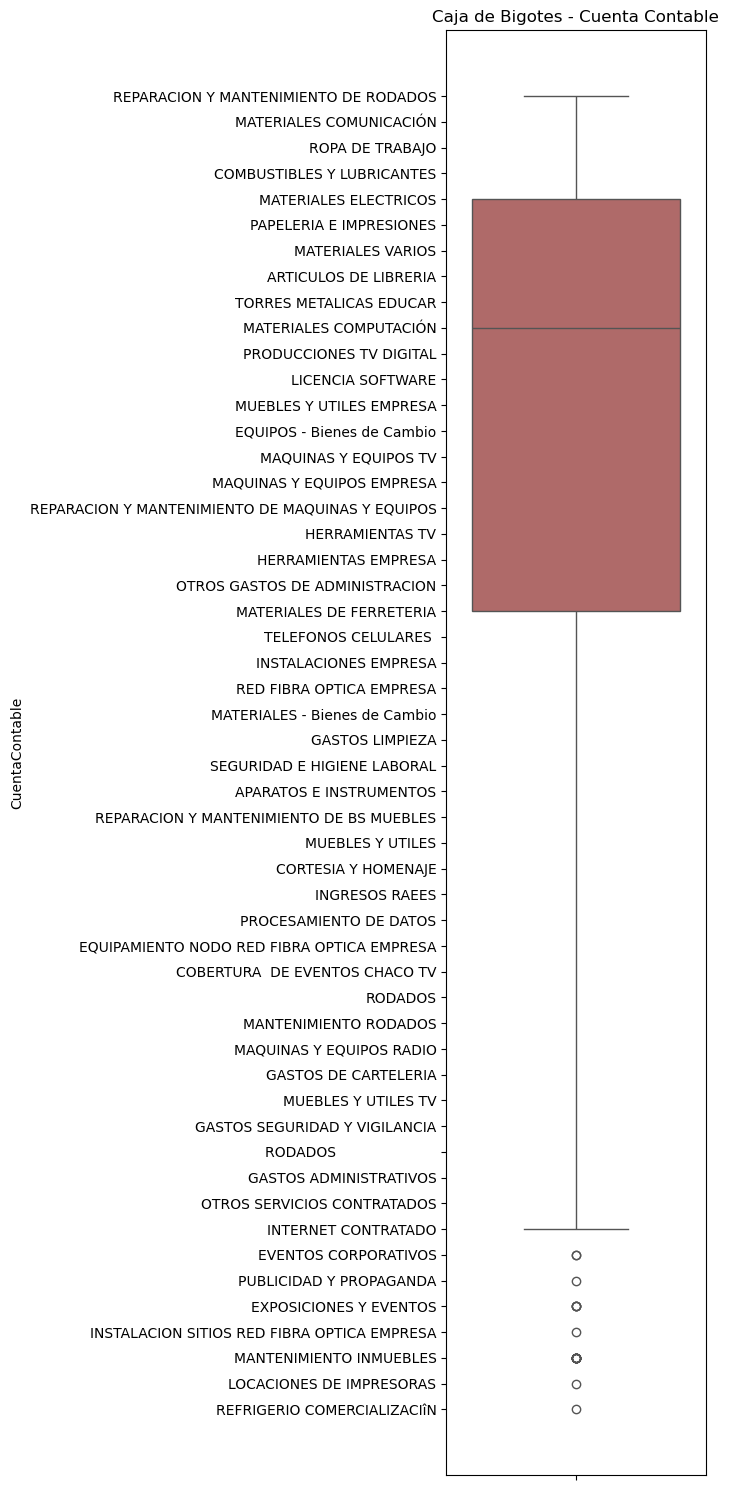

In [42]:
# Caja de bigotes para CuentaContable
plt.figure(figsize=(10, 15))
# Crear una paleta de colores
color = sns.color_palette("vlag_r", len(conteo_clases))
# Boxplot para 'precio'
plt.subplot(1, 2, 1)
sns.boxplot(y=data['CuentaContable'], palette=color)
plt.title('Caja de Bigotes - Cuenta Contable')



plt.tight_layout()
plt.show()

In [107]:
#Prueba Chi-Cuadrado para variables categóricas
#Si quieres analizar la relación entre dos variables categóricas, como puede ser el resultado de una clasificación (correcta o incorrecta) y la categoría de un producto, puedes utilizar una prueba de chi-cuadrado.

#Ejemplo de prueba Chi-Cuadrado:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
tabla = pd.crosstab(data['Clasificacion'], data['CuentaContable'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, ex = chi2_contingency(tabla)

print(f"Chi2 Statistic: {chi2}, P-Value: {p}")

#Conclusión:
#Hay una relación muy significativa entre las dos variables categóricas que estás analizando. El valor de Chi2 tan alto y el p-valor tan bajo (0.0) indican que la asociación entre estas variables es extremadamente fuerte y no es producto del azar.

#Este resultado sugiere que las dos variables están fuertemente relacionadas y que es muy improbable que no exista una conexión significativa entre ellas.

Chi2 Statistic: 10956.609967603825, P-Value: 0.0


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4368\1005797061.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_clases.values, y=conteo_clases.index, palette='coolwarm')


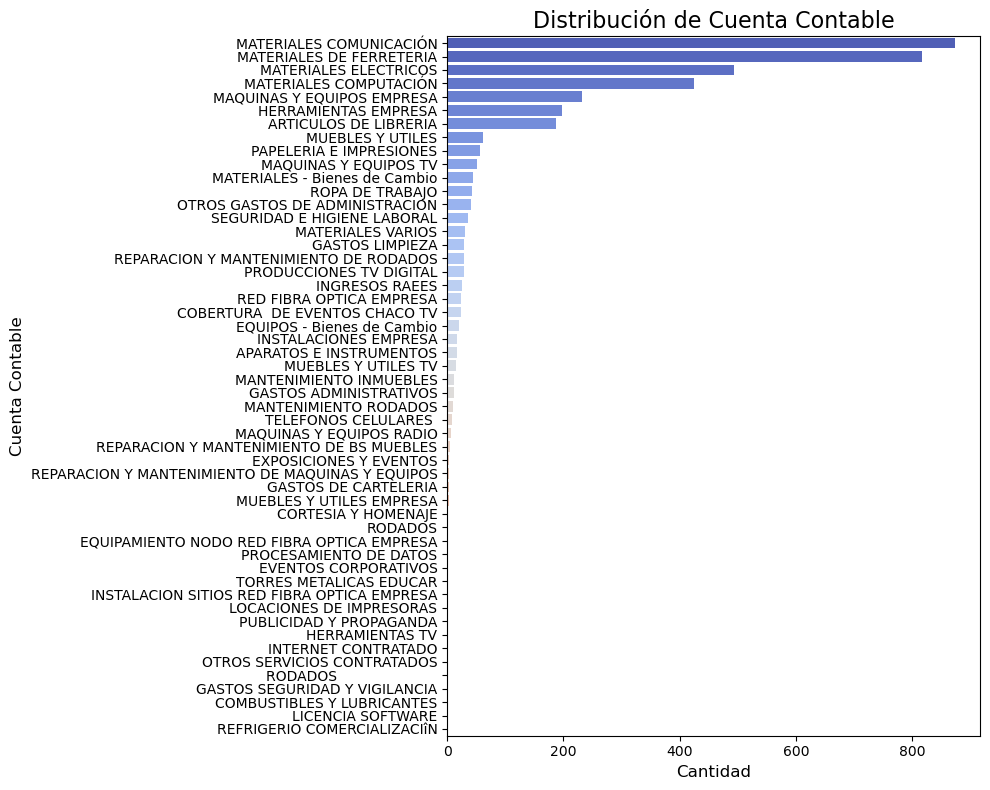

In [149]:
#REVISION DEL BALANCEO DE VARIABLES
#Distribución de cuentaContable
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de ejemplos por clase
conteo_clases = data['CuentaContable'].value_counts()

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))  # Cambiar las dimensiones del gráfico

# Crear gráfico de barras horizontales
sns.barplot(x=conteo_clases.values, y=conteo_clases.index, palette='coolwarm')

# Personalizar el gráfico
plt.title("Distribución de Cuenta Contable", fontsize=16)
plt.xlabel("Cantidad", fontsize=12)
plt.ylabel("Cuenta Contable", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Ggráfico
plt.tight_layout() 
plt.show()


cluster
0    2465
4     862
2     432
3      97
1      52
Name: count, dtype: int64
Silhouette Score: 0.6339600194476261
    ProductoCodigo                                             Nombre  \
3              372                         COMBUSTIBLES Y LUBRICANTES   
48            1182                                         PILA AAA     
49            1184  PILA 9 VOLT                                   ...   
50            1185  PILA AA                                       ...   
64            1262  CORTADORA SENSITIVA MOD HYMS07 355MM          ...   

    ImpuestoId  Impuesto                   Descripcion  Activo  \
3            1    IVA 21  COMBUSTIBLES Y LUBRINCANTES.       1   
48           1    IVA 21                      PILA AAA       1   
49           2  IVA 10,5                           NaN       1   
50           1    IVA 21                           NaN       0   
64           2  IVA 10,5                           NaN       1   

    CuentaContableCodigo              Cuent

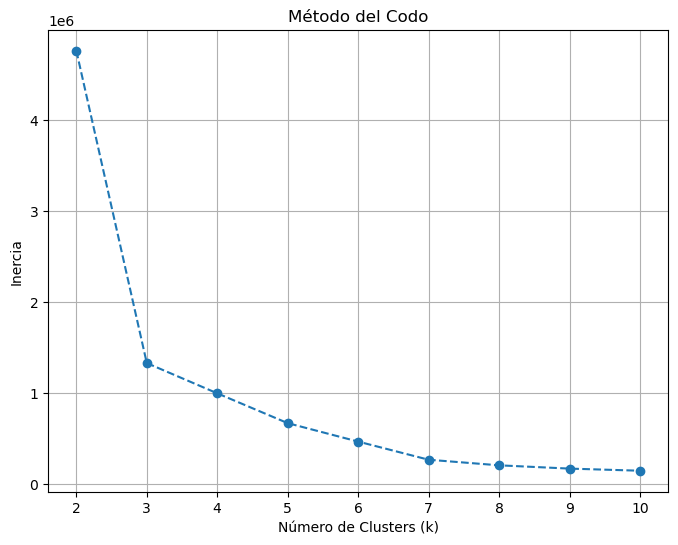

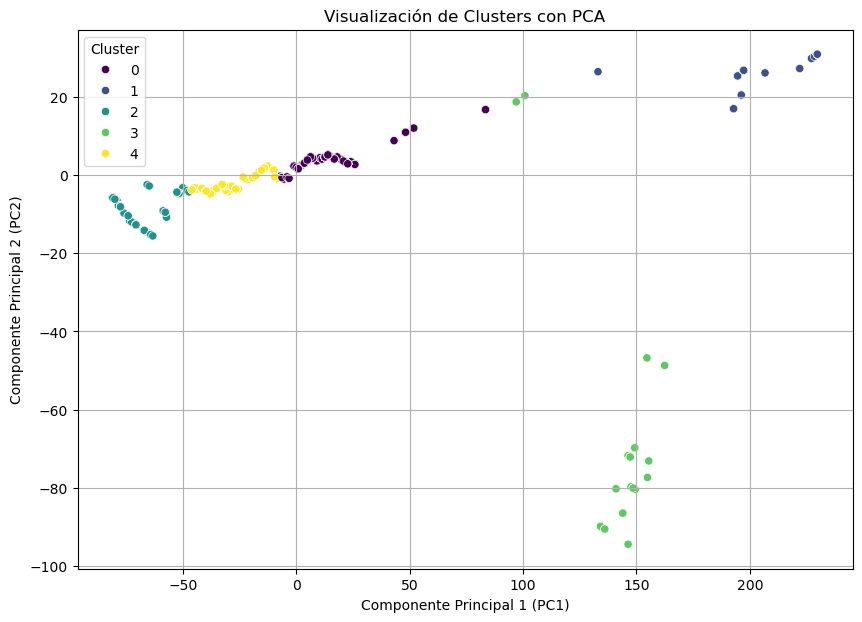

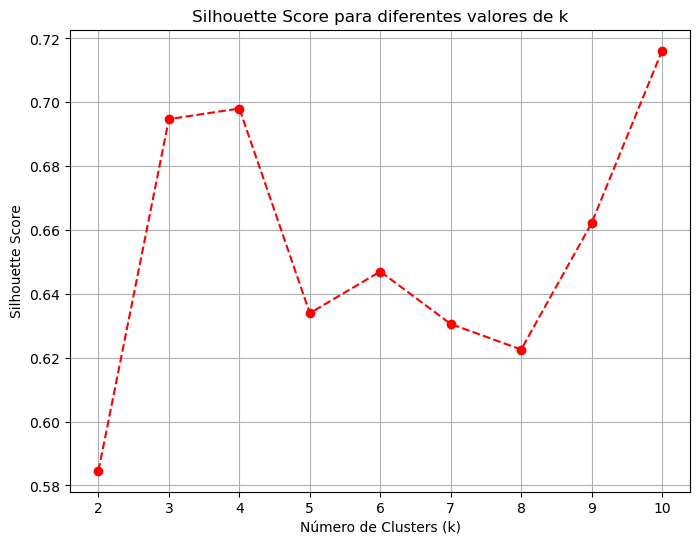

In [286]:
#Revisión de las nuevas clases o outliers
#En mi caso, donde me enfocas también en la detección de nuevas clases, puede ser que los datos desbalanceados incluyan
#clases que aún no se han identificado. 
#Aquí es donde entran los outliers o posibles anomalías que podrían representar nuevas clases.
#Para detectar nuevas clases potenciales, puedes utilizar técnicas como:

#Análisis de clustering: Esto  puede ayudar a encontrar grupos de datos que podrían ser candidatos para nuevas clases.
#Modelos de detección de outliers: Como Isolation Forest, LOF (Local Outlier Factor), que pueden identificar ejemplos que no se alinean bien con las clases existentes.
#Ejemplo de detección de nuevas clases usando clustering:

# K-means clustering
from sklearn.cluster import KMeans

features = data[['SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo']]  # Reemplaza con tus columnas

# Definir el número de clusters (k) - 

kmeans = KMeans(n_clusters=5, random_state=0).fit(features)

# Asignar los clusters al dataset
data['cluster'] = kmeans.labels_

# Mostrar la cantidad de datos en cada cluster (posibles nuevas clases)

print(data['cluster'].value_counts())

#Análisis de las propiedades de los clusters::Calcula estadísticas descriptivas (media, mediana, etc.) para cada cluster.
#cluster_summary = data.groupby('cluster').mean()
#print(cluster_summary)

#Validación del número de clusters (k):
#Usa métricas como el codo (Elbow Method) o el silhouette score para confirmar que K es un número adecuado de clusters.
from sklearn.metrics import silhouette_score
print("Silhouette Score:", silhouette_score(features, kmeans.labels_))
#  si da entre 0.7 – 1.0: Excelente separación entre clusters. Los datos están bien agrupados.
#Exploración del Cluster 3 (el más pequeño):
cluster_3_data = data[data['cluster'] == 3]
print(cluster_3_data.head())


#Ejemplo para probar diferentes 𝑘

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    score = silhouette_score(features, kmeans.labels_)
    print(f"Silhouette Score para k={k}: {score}")
    
    
    # Importar las librerías necesarias
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista para almacenar los valores de inercia
inertia = []

# Probar valores de k desde 2 hasta 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

#Visualización de Clusters en 2D con PCA
from sklearn.decomposition import PCA
import seaborn as sns

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Añadir los resultados de PCA al dataset
data['PC1'] = features_pca[:, 0]
data['PC2'] = features_pca[:, 1]

# Graficar los clusters en las dos primeras componentes principales 
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='cluster', 
    palette='viridis', 
    data=data,
    legend='full'
)
plt.title('Visualización de Clusters con PCA')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend(title='Cluster')
plt.grid()
plt.show()

#Silhouette Score para Diferentes Valores de k 
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Calcular el silhouette score para diferentes valores de k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Score para diferentes valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid()
plt.show()


Silhouette Score para k=3: 0.6947376951535524
cluster_3
0    2793
2     966
1     149
Name: count, dtype: int64


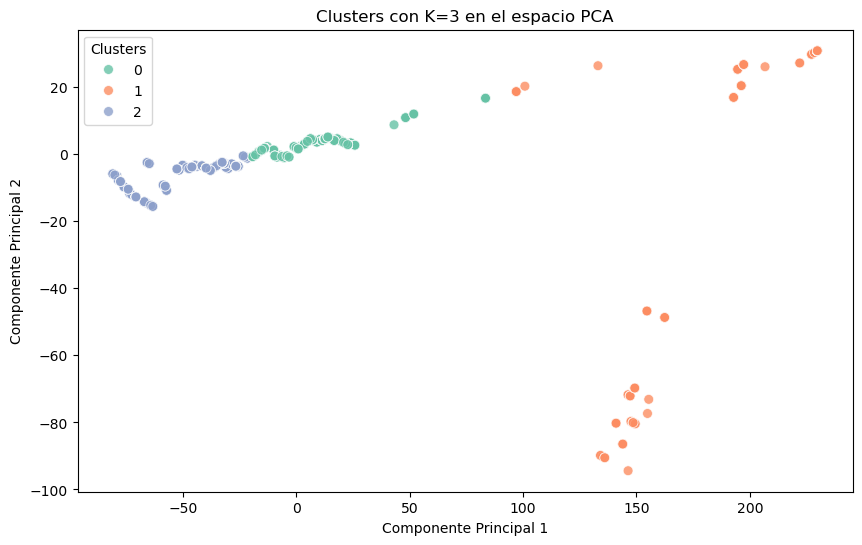

Silhouette Score para k=3: 0.6980509814387856
cluster_4
0    2793
2     966
3      97
1      52
Name: count, dtype: int64


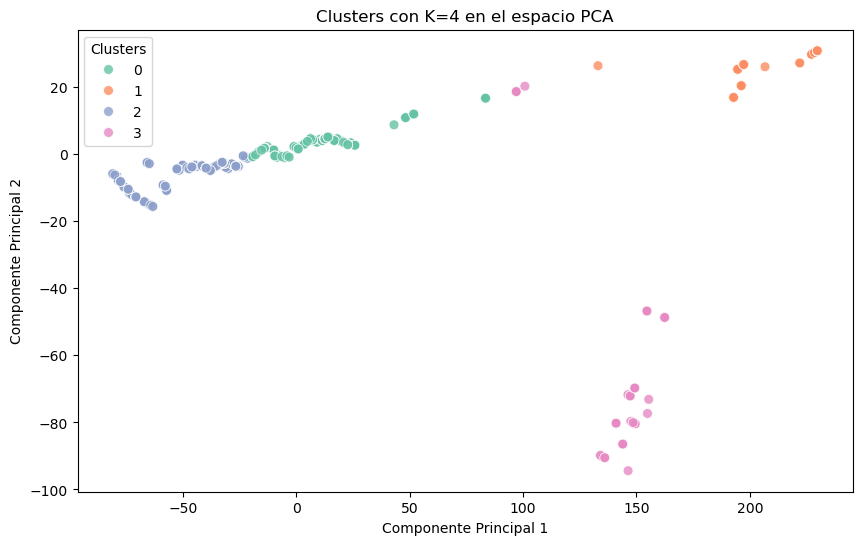

In [297]:
#k=3 y 4
# Ajustar K-Means con k=3
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(features)
data['cluster_3'] = kmeans_3.labels_



# Calcular el Silhouette Score para k=3
silhouette_k3 = silhouette_score(features, kmeans_3.labels_)
print(f"Silhouette Score para k=3: {silhouette_k3}")

# Analizar los clusters
print(data['cluster_3'].value_counts())

# Visualización de los clusters con k=3
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='cluster_3', data=data,
    palette='Set2', s=50, alpha=0.8
)
plt.title("Clusters con K=3 en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters")
plt.show()




# Ajustar K-Means con k=4
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(features)
data['cluster_4'] = kmeans_4.labels_



# Calcular el Silhouette Score para k=4
silhouette_k4 = silhouette_score(features, kmeans_4.labels_)
print(f"Silhouette Score para k=3: {silhouette_k4}")

# Analizar los clusters
print(data['cluster_4'].value_counts())

# Visualización de los clusters con k=4
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='cluster_4', data=data,
    palette='Set2', s=50, alpha=0.8
)
plt.title("Clusters con K=4 en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters")
plt.show()








In [ ]:

# Graficar el método del codo
    
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lista para almacenar los valores de inercia
inertia = []

# Probar valores de k desde 2 hasta 10
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(8, 6))
plt.plot(range(2, 6), inertia, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.xticks(range(2, 6))
plt.grid()
plt.show()
#cluster_summary_k3 = data.groupby('cluster_3').mean()
#print(cluster_summary_k3)


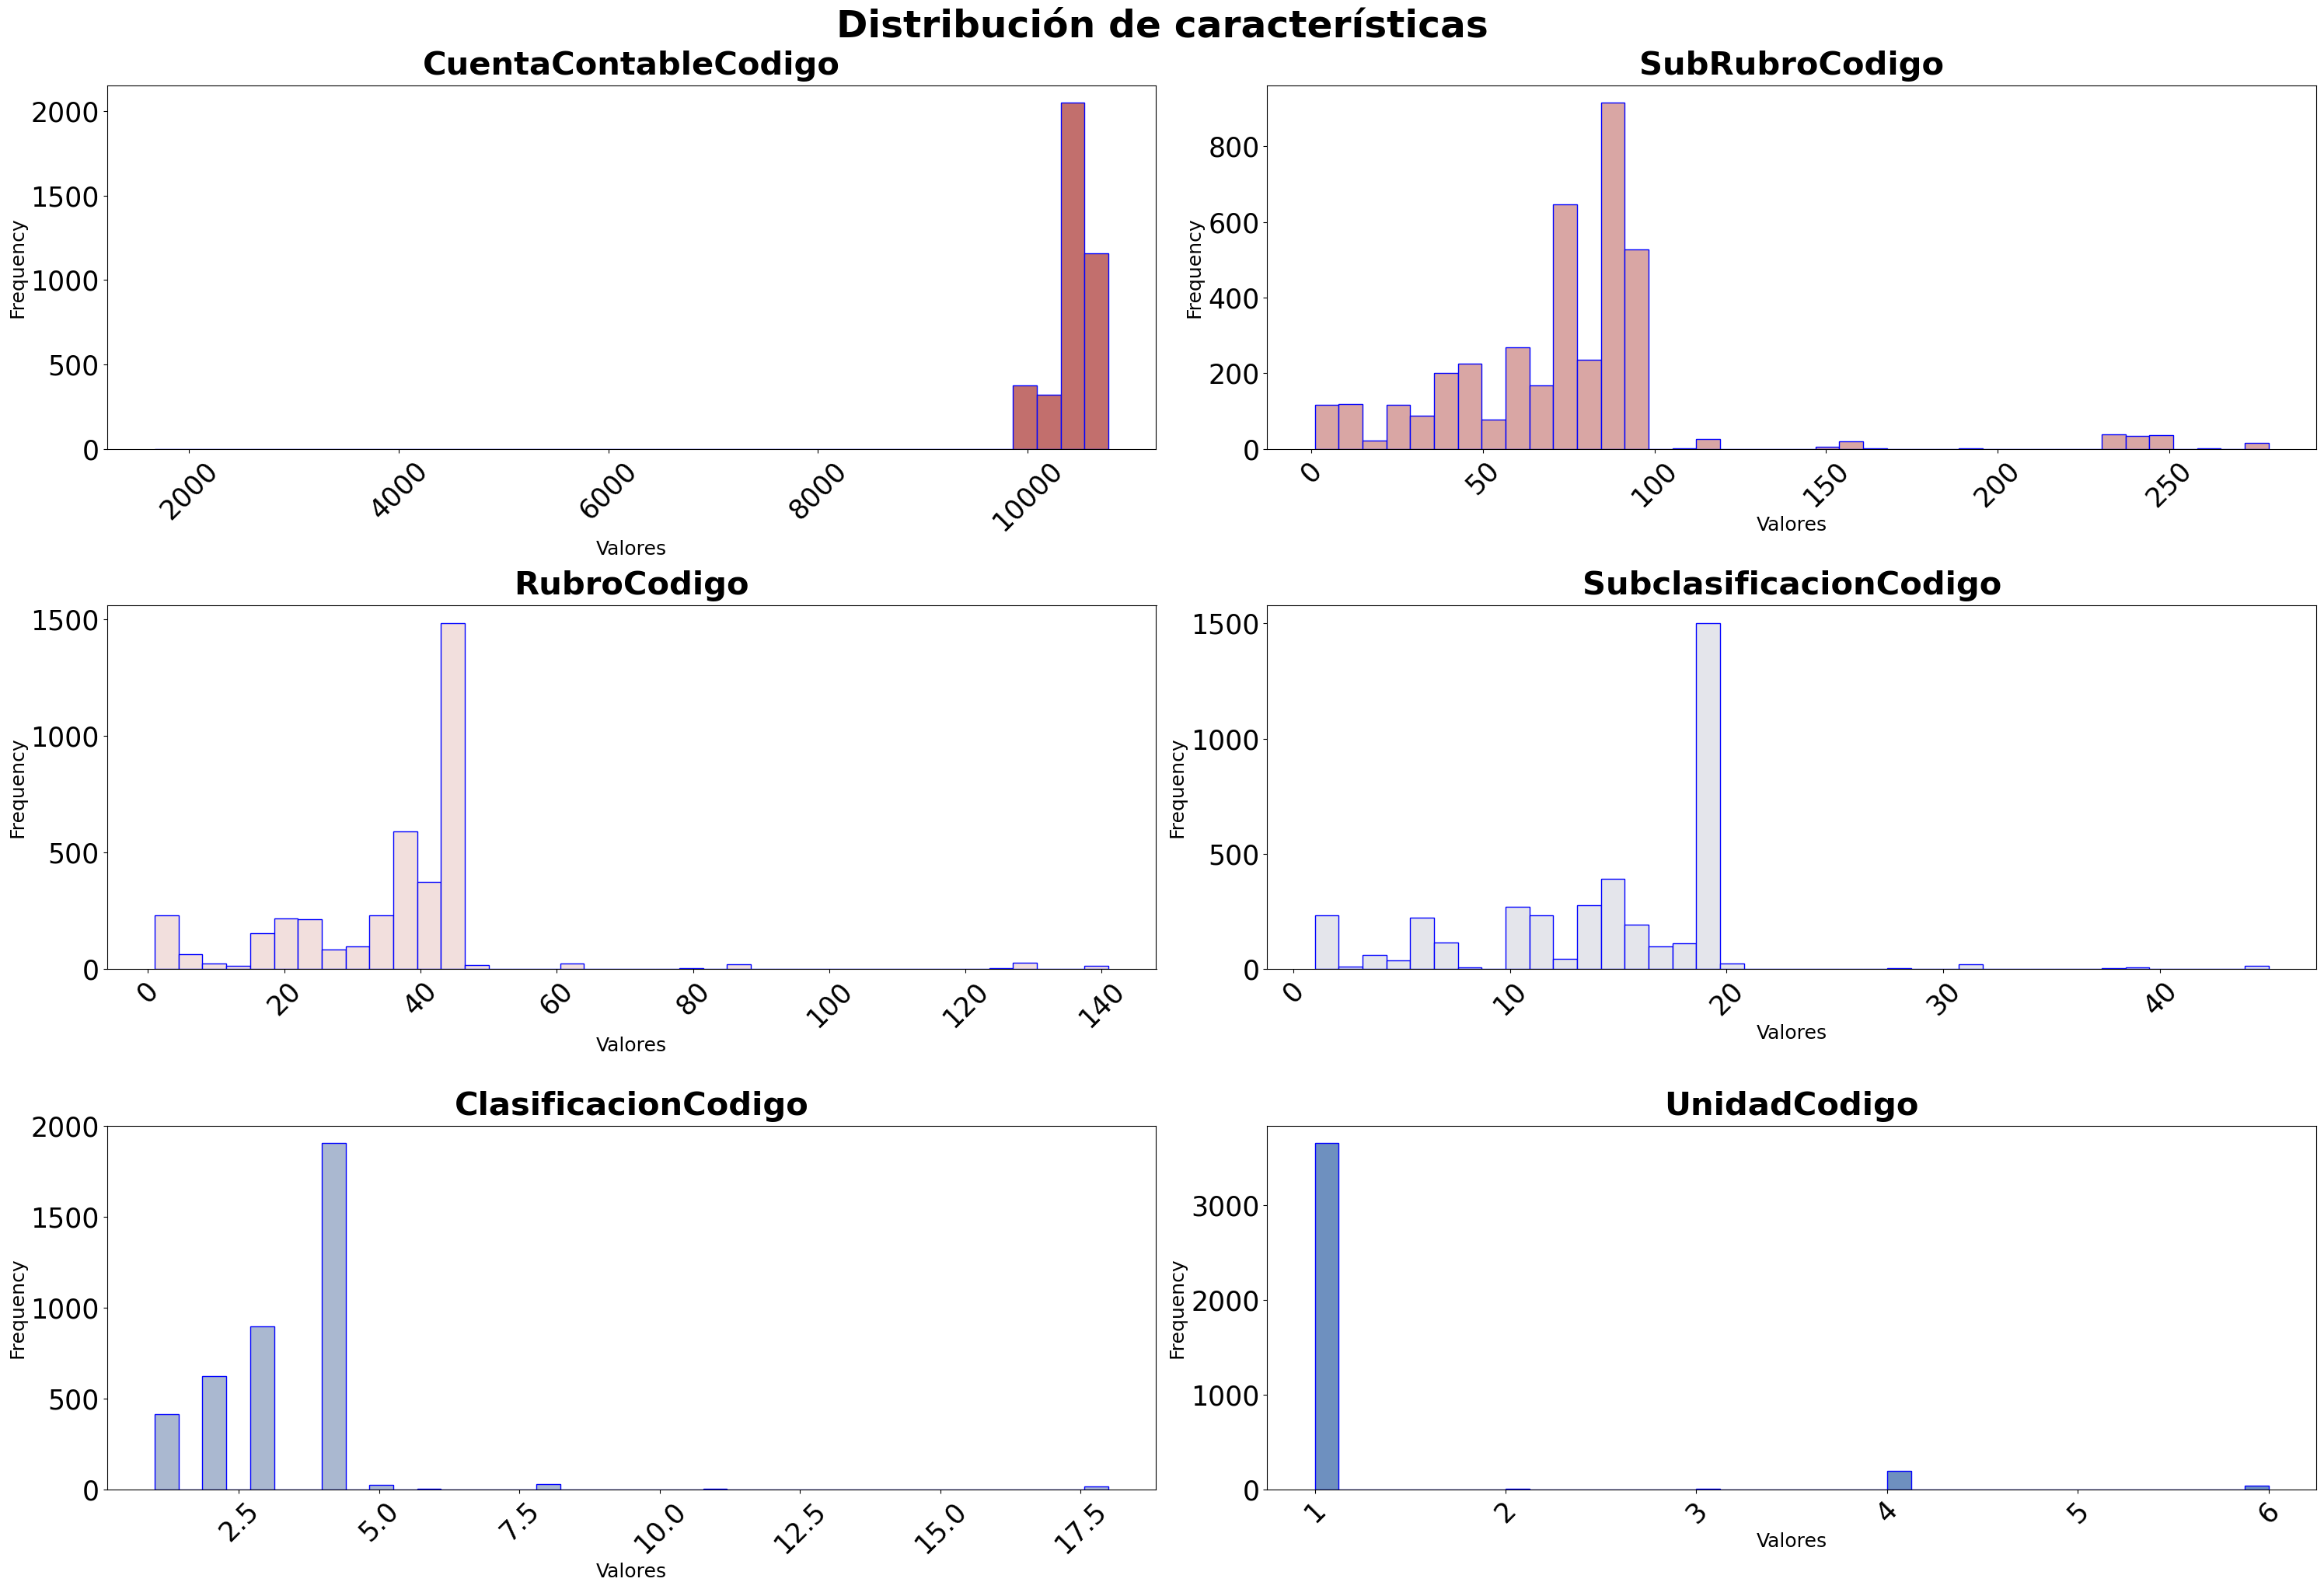

In [83]:
# Se muestra información de la distribución de las distintas características.
color=sns.color_palette("vlag_r")

columnas =  ['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
        ]
# x_col = data[columnas]
# data[x_col].hist(bins=40, edgecolor='b', linewidth=1.0,
                        # #   xlabelsize=8, ylabelsize=8, grid=False, 
                         #  figsize=(16,6), color=color[0])    
# plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
# plt.suptitle('Caracteristicas', x=0.50, y=1.25, fontsize=14);  



# Crear histogramas individuales para cada columna
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 20))
axes = axes.flatten()  # Aplanar el arreglo de ejes para iterar fácilmente

for i, col in enumerate(columnas):
    # Generar histograma para cada columna
    data[col].plot.hist(
        bins=40,
        edgecolor='b',
        linewidth=1.0,
        ax=axes[i],
        color=color[i % len(color)]  # Asignar colores de forma cíclica
    )
    
    axes[i].set_title(col, fontsize=30, fontweight='bold',pad=10)#  tamaño del título
   #  axes[i].tick_params(axis='both', labelsize=20)#  tamaño de etiqueta
    
     # Configurar etiquetas de los ejes
    axes[i].set_xlabel('Valores', fontsize=18)  # Etiqueta del eje x más legible
    axes[i].set_ylabel('Frequency', fontsize=18)  # Etiqueta del eje y más legible

    # Configurar valores de los ejes
    axes[i].tick_params(axis='x', labelsize=25, labelrotation=45)  # Valores del eje x más grandes y girados
    axes[i].tick_params(axis='y', labelsize=25)  # Valores del eje y más grandes



# Ajustar el diseño
plt.tight_layout()
plt.suptitle('Distribución de características', x=0.5, y=1.02, fontsize=35,fontweight='bold')
plt.show()

In [ ]:
import seaborn as sns

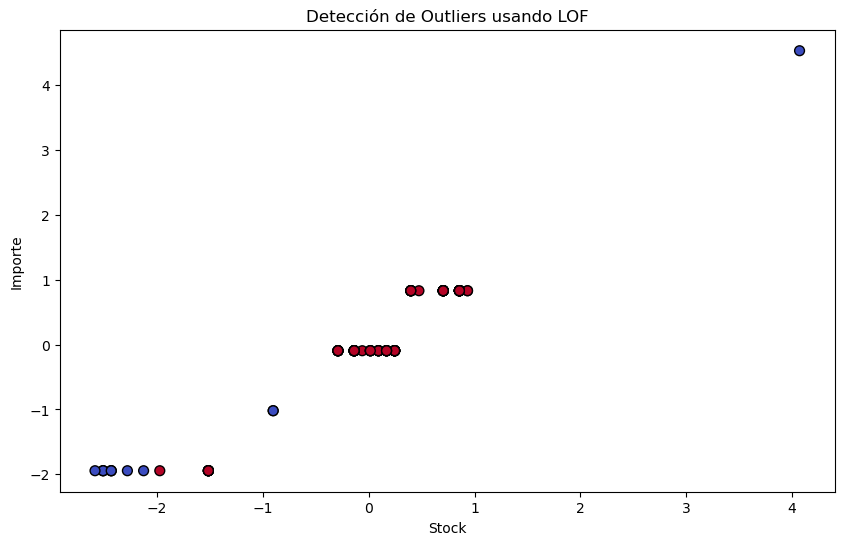

      ProductoCodigo                                             Nombre  \
311             2236  PATCH CORD UTP CAT 5E - 0,5M                  ...   
322             2247  PATCH CORD UTP CAT 6 - 2M                     ...   
1196            3125                                    CABLE FTP CAT 6   
1197            3126                                   CABLE UTP CAT 5E   
2449            4477                          CABLE UTP CAT 5E FURUKAWA   
3000            5142                   PATCH CORD DOBLES SC/APC a LC/PC   
3010            5152                                  MORSETO RETENCION   
3020            5162  FO Rigida de 12 Hilos ADSS (PROYECTO CHACO CON...   
3101            5250                       ZAPATILLA MULTINORMA 6 TOMAS   
3465            5652           KIT DE ALARMA MOD. DS-PWA48-KIT-WB AXPRO   
3633            5825                    UPS ONLINE MONOFASICO 1-3KV 1:1   
3655            5853                                    CABLE FTP CAT5E   

      ImpuestoId  Impues

In [27]:
# Selecciona las columnas numéricas para aplicar LOF
# Reemplazar valores nulos o eliminar columnas irrelevantes
data = data.dropna()  # Ejemplo simple: eliminar filas con valores nulos
#features = ['ProductoRubroId','UnidadId']  # Reemplaza con las columnas relevantes
#features = ['Stock','Importe']  # Reemplaza con las columnas relevantes
features = ['RubroCodigo','ClasificacionCodigo']  # Reemplaza con las columnas relevantes
columnas =  ['ImpuestoId','Activo','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
            ,'Stock']
X = data[features]
# Normalización (si es necesario)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# Normaliza las características
X_scaled = scaler.fit_transform(X)

# Crear el modelo LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Ajusta n_neighbors y contamination según tu dataset

# Ajustar el modelo y predecir outliers
y_pred = lof.fit_predict(X_scaled)


# LOF scores (valores más altos indican anomalías)
lof_scores = lof.negative_outlier_factor_

# Agregar los resultados al dataframe original
data['LOF_Score'] = -lof_scores  # Invertimos para que valores altos indiquen outliers
data['Outlier'] = y_pred  # -1 para outliers, 1 para normales

# Visualización de outliers
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Outlier'], cmap='coolwarm', edgecolor='k', s=50)
plt.title("Detección de Outliers usando LOF")
plt.xlabel("Stock")
plt.ylabel("Importe")
plt.show()

# Mostrar los puntos detectados como outliers
outliers = data[data['Outlier'] == -1]
print(outliers)

#df.to_csv("./Datos/resultados_outliers.csv", index=False)

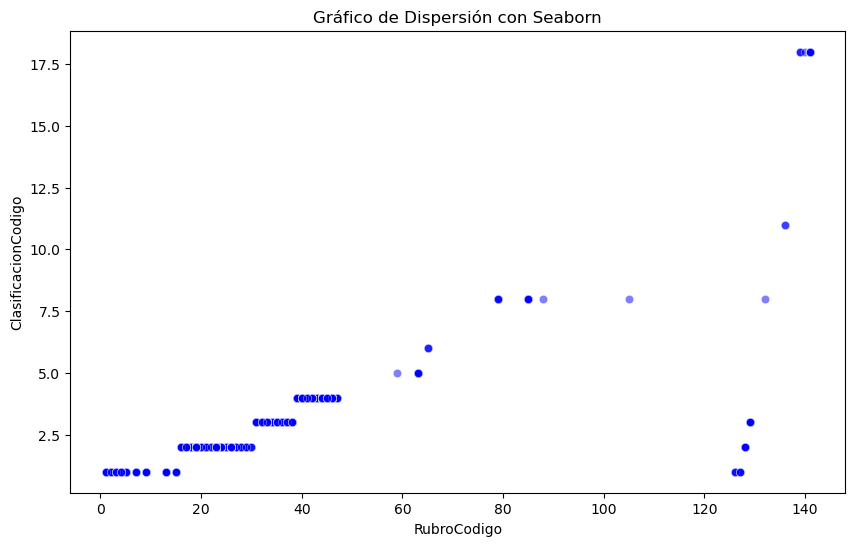

In [272]:
import seaborn as sns

# Crear gráfico de dispersión usando seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='RubroCodigo', y='ClasificacionCodigo', color='blue', alpha=0.5)
plt.title('Gráfico de Dispersión con Seaborn')
plt.show()

In [15]:
#pca
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data_scaled_copia = data.copy()
columnas =  ['ImpuestoId','Activo','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
            ,'Stock']

data_seleccionada = data_scaled_copia[columnas]


# Paso 3: Aplicar PCA
pca = PCA(n_components=0.9)  # Retiene el 90% de la varianza
data_pca = pca.fit_transform(data_seleccionada)

# Paso 4: Crear DataFrame de las componentes principales
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

print(data_pca_df.head())
#print(data_pca_df.head())
pca_componentes = pd.DataFrame(pca.components_, columns=data_seleccionada.columns)
print(pca_componentes)

             PC1
0    -162.974853
1    -164.931334
2    -155.883538
3    -153.950419
4    -164.929009
...          ...
3903 -165.622169
3904 -165.938143
3905 -165.599206
3906 -165.599206
3907 -165.932683

[3908 rows x 1 columns]
     ImpuestoId        Activo  CuentaContableCodigo  SubRubroCodigo  \
0 -4.536941e-08  3.172265e-07             -0.000991       -0.000212   

   RubroCodigo  SubclasificacionCodigo  ClasificacionCodigo  UnidadCodigo  \
0    -0.000132               -0.000041            -0.000009      0.000011   

      Stock  
0  0.999999  


In [183]:
#PCA
#pca sacando mas caracteristicas
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data['Log_SubRubroCodigo'] = np.log(data['SubRubroCodigo'] + 1)
data_numeric = data[['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','Log_SubRubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
           ]] 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

data_scaled_copia = data.copy()
columnas =  ['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','Log_SubRubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
           ]

#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data_scaled_copia[columnas]


# Paso 3: Aplicar PCA
pca = PCA(n_components=0.9)  # Retiene el 90% de la varianza
data_pca = pca.fit_transform(data_seleccionada)

# Paso 4: Crear DataFrame de las componentes principales
data_pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

print(data_pca_df)
#print(data_pca_df.head())
pca_componentes = pd.DataFrame(pca.components_, columns=data_seleccionada.columns)
print(pca_componentes)

# Gráfico de la varianza explicada acumulativa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Varianza explicada acumulativa")
plt.xlabel("Número de componentes principales")
plt.ylabel("Porcentaje de varianza explicada acumulativa")
plt.grid()
plt.show()

             PC1
0      29.013938
1     -27.077426
2     -77.068555
3     -34.205218
4     -29.076340
...          ...
3903 -376.554722
3904  -27.108759
3905 -367.079036
3906 -367.079036
3907  -27.070168

[3908 rows x 1 columns]
   CuentaContableCodigo  SubRubroCodigo  RubroCodigo  Log_SubRubroCodigo  \
0              0.999991       -0.003186     0.002119            0.000057   

   SubclasificacionCodigo  ClasificacionCodigo  UnidadCodigo  
0                0.001987             0.000227      0.000079  


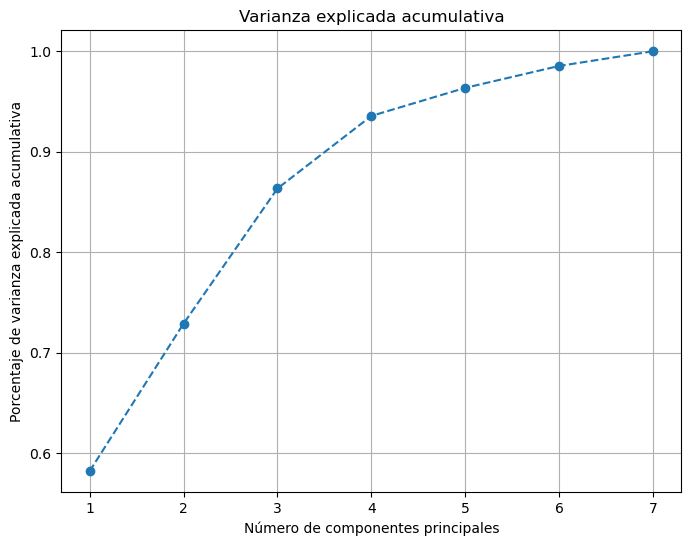

Contribuciones de las variables a los componentes principales:
                             PC1       PC2       PC3
CuentaContableCodigo    0.021614  0.863169 -0.488620
SubRubroCodigo          0.420632 -0.034468  0.143771
RubroCodigo             0.460531  0.053671  0.123128
Log_SubRubroCodigo      0.448474 -0.094920 -0.110679
SubclasificacionCodigo  0.448920  0.104511  0.047849
ClasificacionCodigo     0.426963  0.098315  0.128249
UnidadCodigo           -0.159865  0.470396  0.833327


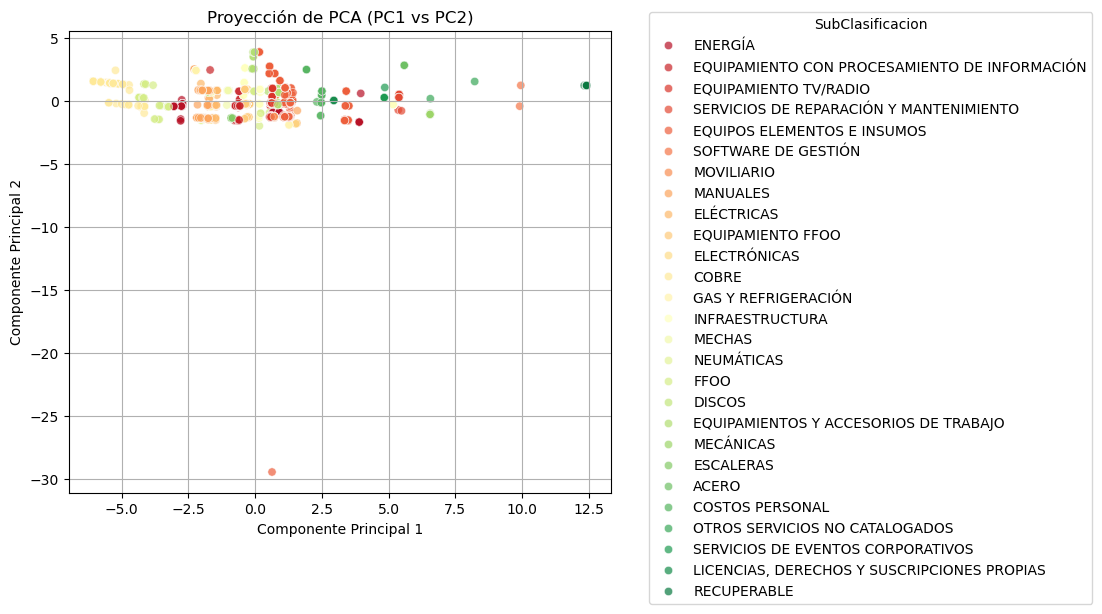

In [255]:
#PCA 1 
#desde cero PCA  -- gráficos incorporados en TESIS
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data['Log_SubRubroCodigo'] = np.log(data['SubRubroCodigo'] + 1)
data_numeric = data[['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','Log_SubRubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
           ]] 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

data_scaled_copia = data.copy()


# Aplicar PCA
pca = PCA()
pca.fit(data_scaled)

# Gráfico de la varianza explicada acumulativa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Varianza explicada acumulativa")
plt.xlabel("Número de componentes principales")
plt.ylabel("Porcentaje de varianza explicada acumulativa")
plt.grid()
plt.show()

# Decidir cuántos componentes retener (por ejemplo, los primeros 3)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Mostrar las contribuciones de las variables
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(3)], index=data_numeric.columns)
print("Contribuciones de las variables a los componentes principales:")
print(loadings)

# Visualizar la proyección en 2D (PC1 y PC2) 
plt.figure(figsize=(7, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Subclasificacion'], palette='RdYlGn', alpha=0.7)
plt.title("Proyección de PCA (PC1 vs PC2)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="SubClasificacion", bbox_to_anchor=(1.9, 0.4), loc='right')
plt.grid()
plt.show()

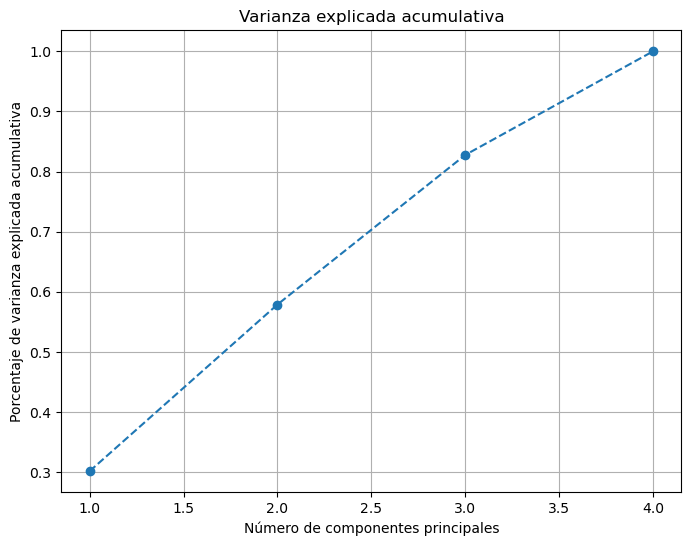

Contribuciones de las variables a los componentes principales:
                             PC1       PC2       PC3
SubRubroCodigo         -0.585518  0.506151  0.290413
RubroCodigo             0.756660  0.184537 -0.011201
SubclasificacionCodigo  0.175132 -0.192871  0.955630
ClasificacionCodigo     0.232298  0.820096  0.048027


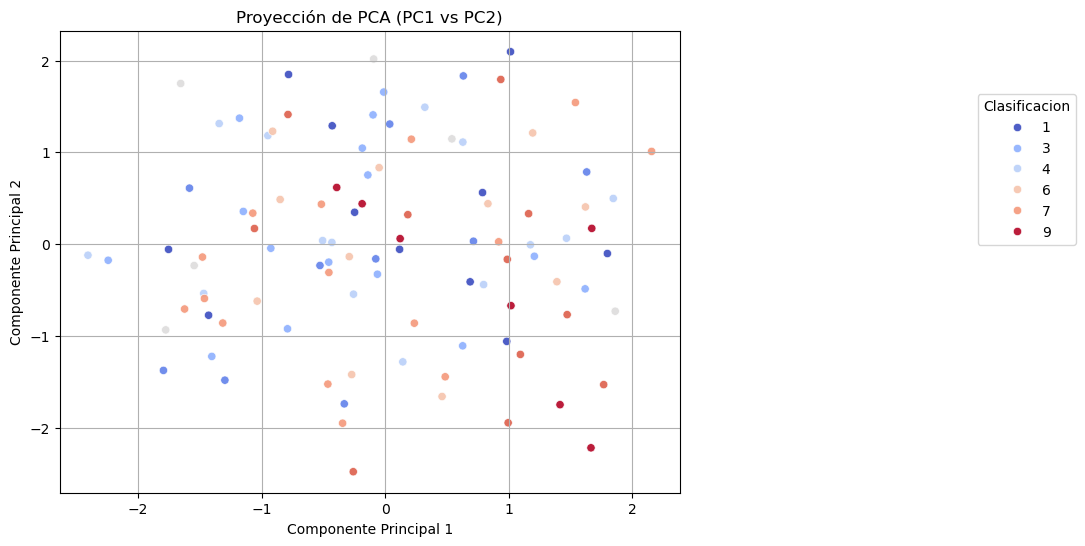

In [388]:
#PCA 2 - Gráficos incorporado en  TESIS
 
#desde cero PCA  -- fue a TESIS
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data['Log_SubRubroCodigo'] = np.log(data['SubRubroCodigo'] + 1)
data_numeric = data[['SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo']] 
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

data_scaled_copia = data.copy()


# Aplicar PCA
pca = PCA()
pca.fit(data_scaled)

# Gráfico de la varianza explicada acumulativa
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Varianza explicada acumulativa")
plt.xlabel("Número de componentes principales")
plt.ylabel("Porcentaje de varianza explicada acumulativa")
plt.grid()
plt.show()

# Decidir cuántos componentes retener (por ejemplo, los primeros 3)
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Mostrar las contribuciones de las variables
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(3)], index=data_numeric.columns)
print("Contribuciones de las variables a los componentes principales:")
print(loadings)

# Visualizar la proyección en 2D (PC1 y PC2) otros paletas de colores:viridis -RdYlGn 
plt.figure(figsize=(8, 6))
#si no quiero que tenga leyenda:









[[-2.54556645  0.18756741]
 [-0.80281421 -0.16973066]
 [ 0.476669   -0.28617574]
 ...
 [ 0.9822427  -1.41189003]
 [ 0.9822427  -1.41189003]
 [ 0.01561989 -0.10380904]]
   CuentaContableCodigo  SubRubroCodigo  RubroCodigo  SubclasificacionCodigo  \
0              0.031102        0.460758     0.524987                0.510669   
1              0.992593       -0.105668    -0.025864                0.053457   

   ClasificacionCodigo  
0             0.500340  
1             0.008185  


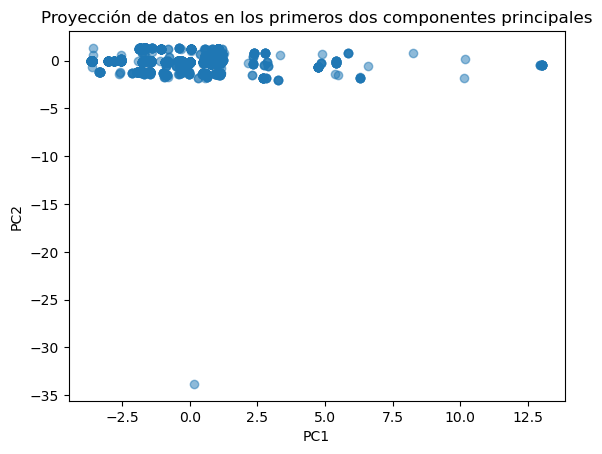

In [382]:
#nueva implementacion de pca 
from sklearn.preprocessing import StandardScaler

# Escalar los datos
from sklearn.decomposition import PCA
columnas=['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo']

#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data_scaled_copia[columnas]
data_scaled = StandardScaler().fit_transform(data_seleccionada)

from sklearn.decomposition import PCA

# PCA con SVD
pca = PCA(n_components=2)  # Número de componentes deseados
data_pca = pca.fit_transform(data_scaled)
pca_componentes= pd.DataFrame(pca.components_, columns=data_seleccionada.columns)
print(data_pca)
print(pca_componentes)

import matplotlib.pyplot as plt




plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección de datos en los primeros dos componentes principales')


plt.show()

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que `data_pca` es el dataset reducido con PCA
# y tiene el mismo número de filas que `data`

lof = LocalOutlierFactor(n_neighbors=20)

# Ajustar LOF y predecir outliers
outliers = lof.fit_predict(data_pca)

# Agregar los resultados de outliers al DataFrame original
# Asegúrate de que data y data_pca tengan la misma longitud
if len(data) == len(data_pca):
    data['Outlier'] = (outliers == -1).astype(int)  # Convertir -1 a 1 para outliers
    data['LOF_Score'] = lof.negative_outlier_factor_  # Agregar los puntajes LOF
else:
    raise ValueError("El número de filas de data y data_pca no coincide.")

# Separar datos normales y outliers
normal_data = data_pca[data['Outlier'] == 0]
outlier_data = data_pca[data['Outlier'] == 1]

# Resumen de los resultados
print("Número de outliers detectados:", data['Outlier'].sum())
print(data[['CuentaContable', 'Outlier', 'LOF_Score']].sort_values(by='LOF_Score'))

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], color='blue', alpha=0.6, label='Normal')
plt.scatter(outlier_data[:, 0], outlier_data[:, 1], color='red', alpha=0.6, label='Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Detección de Outliers con LOF')
plt.legend()
plt.show()


In [381]:
#aplico LOF con pca -- va a tesis------------------------------------
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)
outliers = lof.fit_predict(data_pca)

# Identificar outliers
data['outlier'] = (outliers == -1)

# Separar datos normales y outliers
normal_data = data_pca[data['outlier'] == False]
outlier_data = data_pca[data['outlier'] == True]

# Resumen de los resultados
print("Número de outliers detectados:", data['Outlier'].sum())
print(data[['CuentaContable', 'Outlier', 'LOF_Score']].sort_values(by='LOF_Score'))

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], color='blue', alpha=0.6, label='Normal')
plt.scatter(outlier_data[:, 0], outlier_data[:, 1], color='red', alpha=0.6, label='Outliers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Detección de Outliers con LOF')
plt.legend()
plt.show()

ValueError: Length of values (3908) does not match length of index (100)

In [383]:
data.head(5)

RubroCodigo  SubRubroCodigo  ClasificacionCodigo  SubclasificacionCodigo  \
0            2               5                    9                       3   
1            2               6                    5                       3   
2            1              12                   10                       8   
3            3              18                    2                       7   
4            5              15                    9                       9   

   Stock  cluster_dbscan  Outlier target13       PC1       PC2  
0    199              -1        1  Anómalo -3.953972  1.261719  
1    323              -1        0  Anómalo -3.508733 -2.745669  
2    443               0        0   Normal  3.143018  1.126630  
3     69              -1        0  Anómalo  7.790109 -6.926486  
4    301              -1        1  Anómalo  5.568576  0.579771

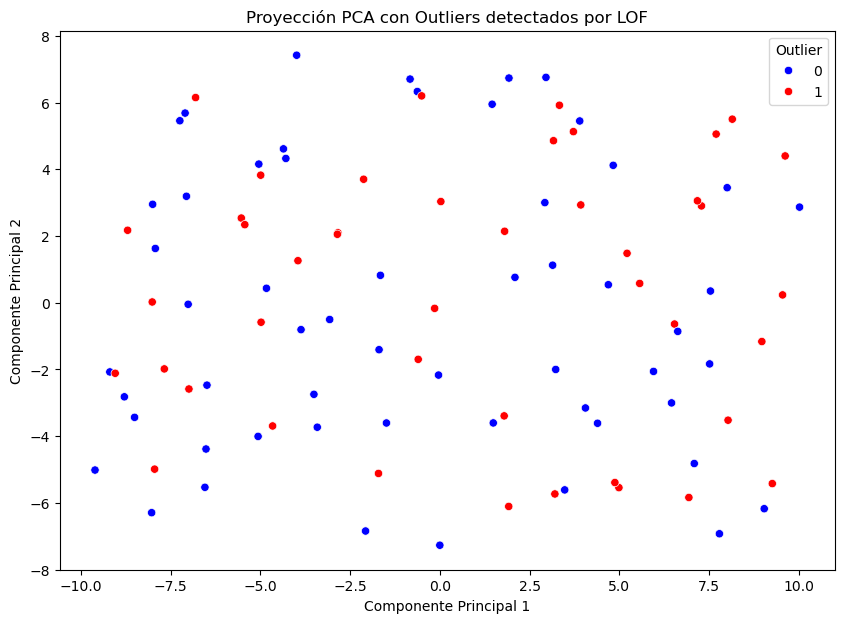

Número de outliers detectados: 44


In [380]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya seleccionaste las columnas numéricas relevantes
columnas_relevantes  =['SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo']
data_seleccionada = data[columnas_relevantes]

# Asegúrate de no tener valores nulos
data_seleccionada = data_seleccionada.dropna()

# Aplicar PCA para reducir a dos componentes principales
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(data_seleccionada)

# Agregar las componentes principales al DataFrame original
data['PC1'] = componentes_principales[:, 0]
data['PC2'] = componentes_principales[:, 1]


# Scatterplot PCA con outliers resaltados
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Outlier', 
    data=data, 
    palette={0: 'blue', 1: 'red'}
)
plt.title("Proyección PCA con Outliers detectados por LOF")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Outlier", loc='best')
plt.show()

 



In [379]:
#lof solo
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np

# Supongamos que 'data' es tu dataset cargado previamente.
# Selección de las columnas relevantes (numéricas) para LOF.
columnas_relevantes = ['CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo']
data_seleccionada = data[columnas_relevantes]

# Asegurarnos de que no haya valores nulos en las columnas seleccionadas
data_seleccionada = data_seleccionada.dropna()

# Aplicación de LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)  # Ajusta n_neighbors según el tamaño del dataset
outlier_scores = lof.fit_predict(data_seleccionada)

# Agregar resultados al dataset original
data['LOF_Score'] = lof.negative_outlier_factor_  # El puntaje negativo indica qué tan 'outlier' es cada punto
data['Outlier'] = np.where(outlier_scores == -1, 1, 0)  # -1 indica un outlier



# Resumen de los resultados
print("Número de outliers detectados:", data['Outlier'].sum())
print(data[['CuentaContableCodigo', 'Outlier', 'LOF_Score']].sort_values(by='LOF_Score'))


import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot PCA con outliers resaltados
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Outlier', data=data, palette={0: 'blue', 1: 'red'})
plt.title("Proyección PCA con Outliers detectados por LOF")
plt.show()


KeyError: "['CuentaContableCodigo'] not in index"

In [12]:

data_scaled_copia = data.copy()
columnas =  ['ImpuestoId','Activo','CuentaContableCodigo','SubRubroCodigo','RubroCodigo','SubclasificacionCodigo','ClasificacionCodigo','UnidadCodigo'
            ,'Stock','MovimientosStock','MovimientoCantidad']

#data_numeric = data.select_dtypes(include=[int, float])
data_seleccionada = data_scaled_copia[columnas]
print(data_seleccionada.isnull().sum())


ImpuestoId                  0
Activo                      0
CuentaContableCodigo        0
SubRubroCodigo              0
RubroCodigo                 0
SubclasificacionCodigo      0
ClasificacionCodigo         0
UnidadCodigo                0
Stock                       0
MovimientosStock          787
MovimientoCantidad        787
dtype: int64


In [152]:
#ingenieria de caracteristicas
# Ejemplo: Si quieres transformar 'Stock' y 'Precio'
data['Log_CtaContable'] = np.log(data['CuentaContableCodigo'] + 1)
data['Log_Clasificacion'] = np.log(data['ClasificacionCodigo'] + 1)

 #Mostrar los primeros registros para verificar
print(data[['CuentaContableCodigo', 'Log_CtaContable', 'ClasificacionCodigo', 'Log_Clasificacion']].head())

   CuentaContableCodigo  Log_CtaContable  ClasificacionCodigo  \
0                 10478         9.257129                    1   
1                 10422         9.251770                    3   
2                 10372         9.246962                    4   
3                 10415         9.251098                    8   
4                 10420         9.251578                    3   

   Log_Clasificacion  
0           0.693147  
1           1.386294  
2           1.609438  
3           2.197225  
4           1.386294  


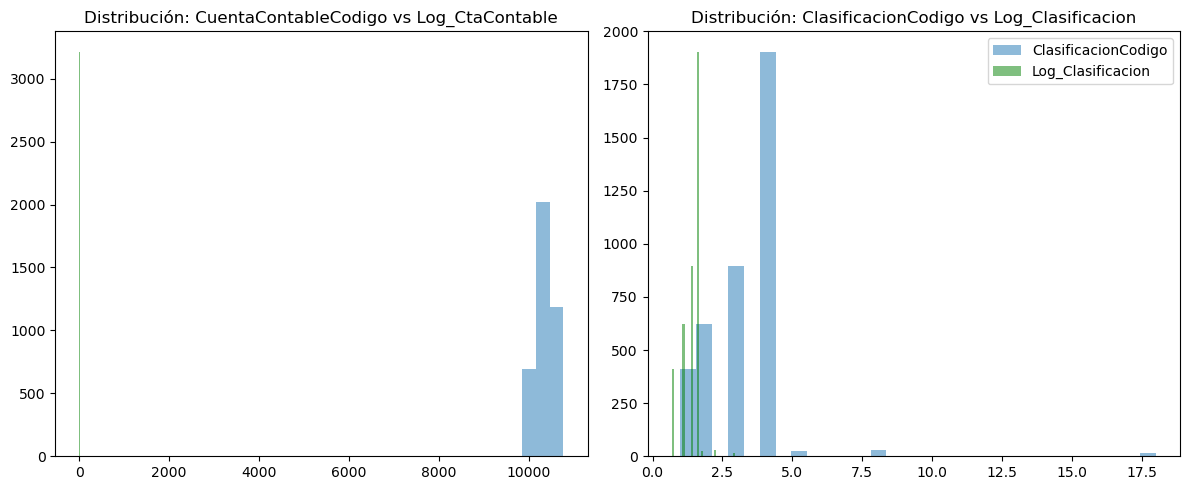

   CuentaContableCodigo  Log_CtaContable  ClasificacionCodigo  \
0                 10478         9.257129                    1   
1                 10422         9.251770                    3   
2                 10372         9.246962                    4   
3                 10415         9.251098                    8   
4                 10420         9.251578                    3   

   Log_Clasificacion  
0           0.693147  
1           1.386294  
2           1.609438  
3           2.197225  
4           1.386294  


In [168]:
#Verificar la transformación logarítmica con graficos
import matplotlib.pyplot as plt
color=sns.color_palette("vlag_r")



# Mostrar la distribución de las columnas originales y log-transformadas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].hist(data['CuentaContableCodigo'], bins=30, alpha=0.5, label='CuentaContableCodigo')
axs[0].hist(data['Log_CtaContable'], bins=30, alpha=0.5, label='Log_CtaContable', color='green')
axs[0].set_title('Distribución: CuentaContableCodigo vs Log_CtaContable')

# Histograma de 'ClasificacionCodigo' y 'Log_Clasificacion'
axs[1].hist(data['ClasificacionCodigo'], bins=30, alpha=0.5, label='ClasificacionCodigo')
axs[1].hist(data['Log_Clasificacion'], bins=30, alpha=0.5, label='Log_Clasificacion', color='green')
axs[1].set_title('Distribución: ClasificacionCodigo vs Log_Clasificacion')



plt.legend()
plt.tight_layout()
plt.show()
 #Mostrar los primeros registros para verificar
print(data[['CuentaContableCodigo', 'Log_CtaContable', 'ClasificacionCodigo', 'Log_Clasificacion']].head())

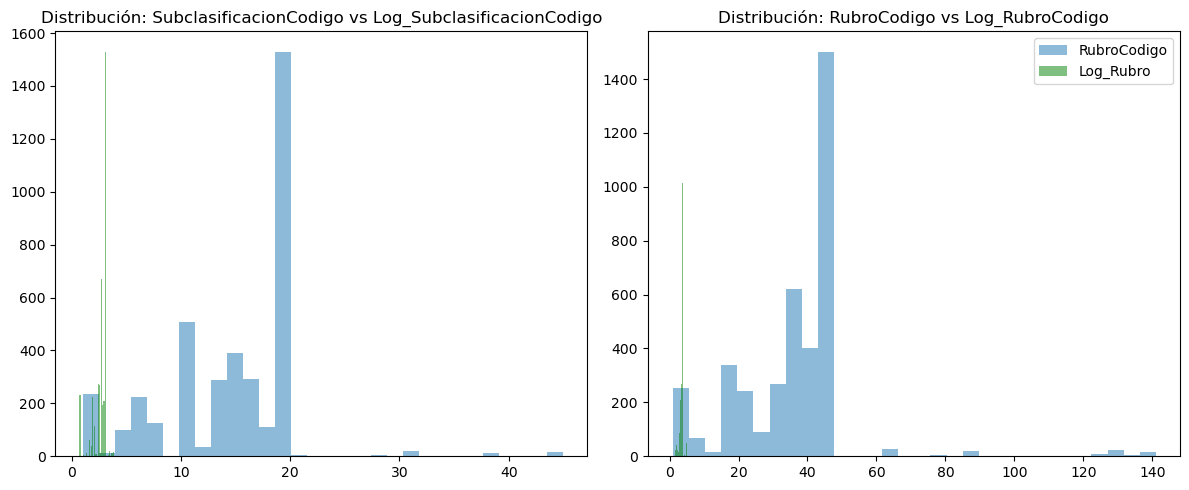

   SubclasificacionCodigo  Log_Subclasificacion  RubroCodigo  Log_Rubro
0                       7              2.079442           15   2.772589
1                       6              1.945910           37   3.637586
2                      16              2.833213           39   3.688879
3                      31              3.465736           85   4.454347
4                       6              1.945910           36   3.610918


In [165]:
import matplotlib.pyplot as plt
color=sns.color_palette("vlag_r")




data['Log_Subclasificacion'] = np.log(data['SubclasificacionCodigo'] + 1)
data['Log_Rubro'] = np.log(data['RubroCodigo'] + 1)
# Mostrar la distribución de las columnas originales y log-transformadas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
# Histograma de 'SubclasificacionCodigo' y 'Log_SubclasificacionCodigo'
axs[0].hist(data['SubclasificacionCodigo'], bins=30, alpha=0.5, label='SubclasificacionCodigo')
axs[0].hist(data['Log_Subclasificacion'], bins=30, alpha=0.5, label='Log_Subclasificacion', color='green')
axs[0].set_title('Distribución: SubclasificacionCodigo vs Log_SubclasificacionCodigo')

# Histograma de 'RubroCodigo' y 'Log_RubroCodigo'
axs[1].hist(data['RubroCodigo'], bins=30, alpha=0.5, label='RubroCodigo')
axs[1].hist(data['Log_Rubro'], bins=30, alpha=0.5, label='Log_Rubro', color='green')
axs[1].set_title('Distribución: RubroCodigo vs Log_RubroCodigo')
                    
plt.legend()
plt.tight_layout()
plt.show()
                  #Mostrar los primeros registros para verificar
print(data[['SubclasificacionCodigo', 'Log_Subclasificacion','RubroCodigo', 'Log_Rubro', ]].head())

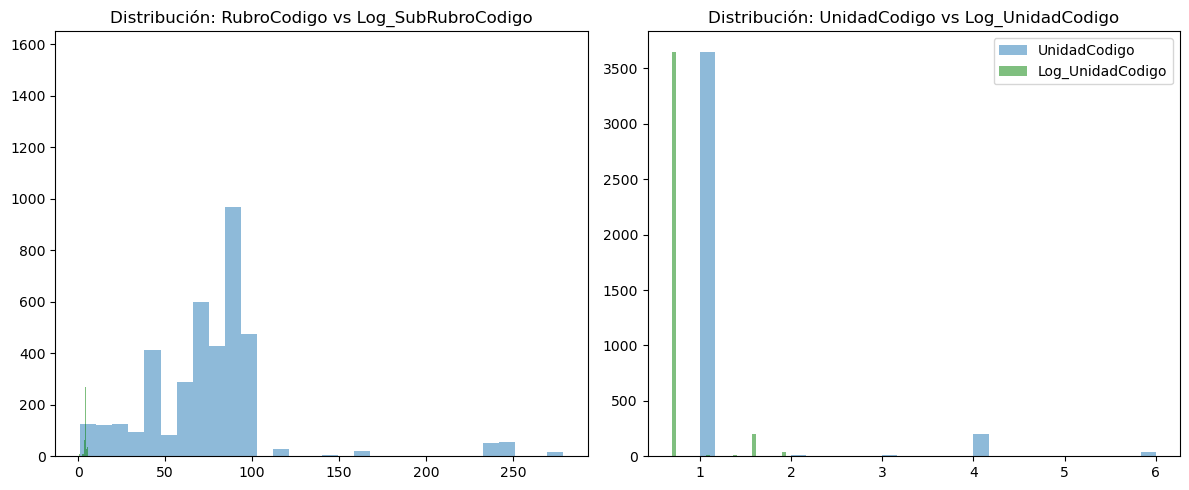

   SubRubroCodigo  Log_SubRubroCodigo  UnidadCodigo  Log_UnidadCodigo
0              28            3.367296             1          0.693147
1              71            4.276666             1          0.693147
2              76            4.343805             1          0.693147
3             159            5.075174             1          0.693147
4              70            4.262680             1          0.693147


In [171]:
import matplotlib.pyplot as plt


data['Log_SubRubroCodigo'] = np.log(data['SubRubroCodigo'] + 1)
data['Log_UnidadCodigo'] = np.log(data['UnidadCodigo'] + 1)
fig, axs2 = plt.subplots(1,2,figsize=(12, 5))

# Histograma de 'SubRubroCodigo' y 'Log_SubRubroCodigo'
axs2[0].hist(data['SubRubroCodigo'], bins=30, alpha=0.5, label='SubRubroCodigo')
axs2[0].hist(data['Log_SubRubroCodigo'], bins=30, alpha=0.5, label='Log_SubRubroCodigo', color='green')
axs2[0].set_title('Distribución: RubroCodigo vs Log_SubRubroCodigo')

# Histograma de 'UnidadCodigo' y 'Log_UnidadCodigo'
axs2[1].hist(data['UnidadCodigo'], bins=30, alpha=0.5, label='UnidadCodigo')
axs2[1].hist(data['Log_UnidadCodigo'], bins=30, alpha=0.5, label='Log_UnidadCodigo', color='green')
axs2[1].set_title('Distribución: UnidadCodigo vs Log_UnidadCodigo')
plt.legend()
plt.tight_layout()
plt.show()

 #Mostrar los primeros registros para verificar
print(data[['SubRubroCodigo', 'Log_SubRubroCodigo','UnidadCodigo', 'Log_UnidadCodigo', ]].head())




cluster_dbscan
 2     1871
 7      654
 4      552
 0      374
 1      224
 9       51
 8       34
 14      25
 3       21
 5       19
-1       19
 13      17
 16      15
 6        8
 11       7
 12       7
 10       5
 15       5
Name: count, dtype: int64


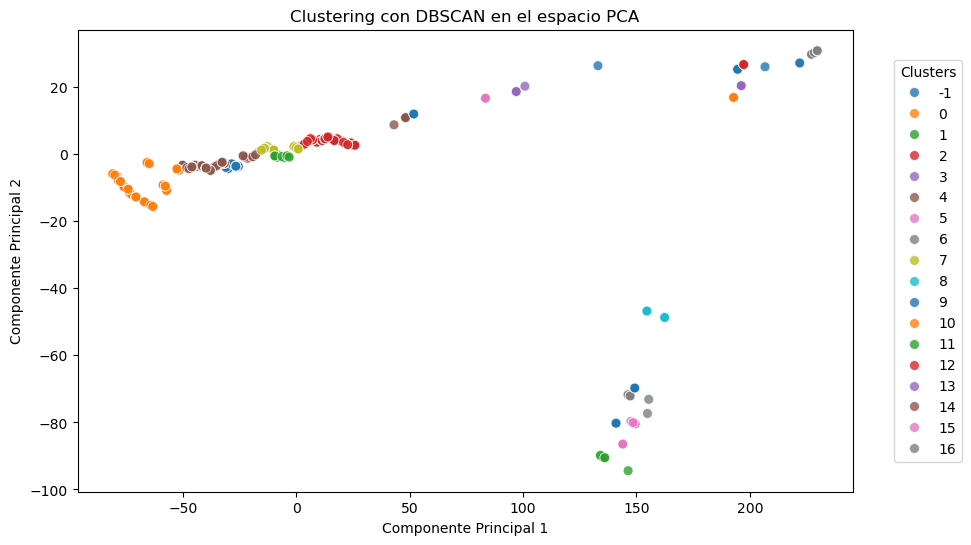

In [306]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Escalar los datos para normalizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Reemplaza 'features' por tus columnas relevantes

# Ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta eps y min_samples según tu dataset
data['cluster_dbscan'] = dbscan.fit_predict(features_scaled)

# Mostrar la cantidad de puntos en cada cluster
print(data['cluster_dbscan'].value_counts())
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='cluster_dbscan', data=data, palette='tab10', s=50, alpha=0.8
)
plt.title("Clustering con DBSCAN en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.15, 0.5), loc='right')
plt.show()



cluster_dbscan
 2     1871
 4      500
 13     375
 7      279
 10     230
 1      224
 0       52
 15      45
 8       40
 11      34
 12      34
 27      25
 21      24
 3       21
 26      17
 16      17
 18      17
 5       16
 30      15
 20      11
 22       7
 6        7
 17       7
 9        7
 14       5
-1        5
 28       5
 24       4
 25       4
 19       4
 23       3
 29       3
Name: count, dtype: int64


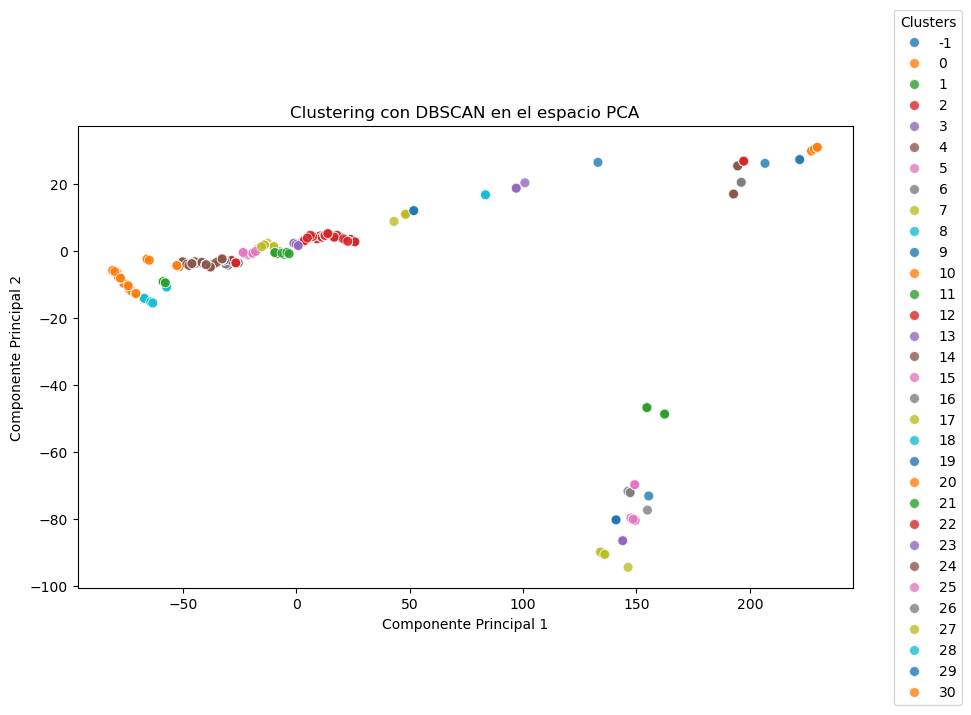

In [309]:
#DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Escalar los datos para normalizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)  # Reemplaza 'features' por tus columnas relevantes

# Ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)  # Ajusta eps y min_samples según tu dataset
data['cluster_dbscan'] = dbscan.fit_predict(features_scaled)

# Mostrar la cantidad de puntos en cada cluster
print(data['cluster_dbscan'].value_counts())
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='cluster_dbscan', data=data, palette='tab10', s=50, alpha=0.8
)
plt.title("Clustering con DBSCAN en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.15, 0.5), loc='right')
plt.show()

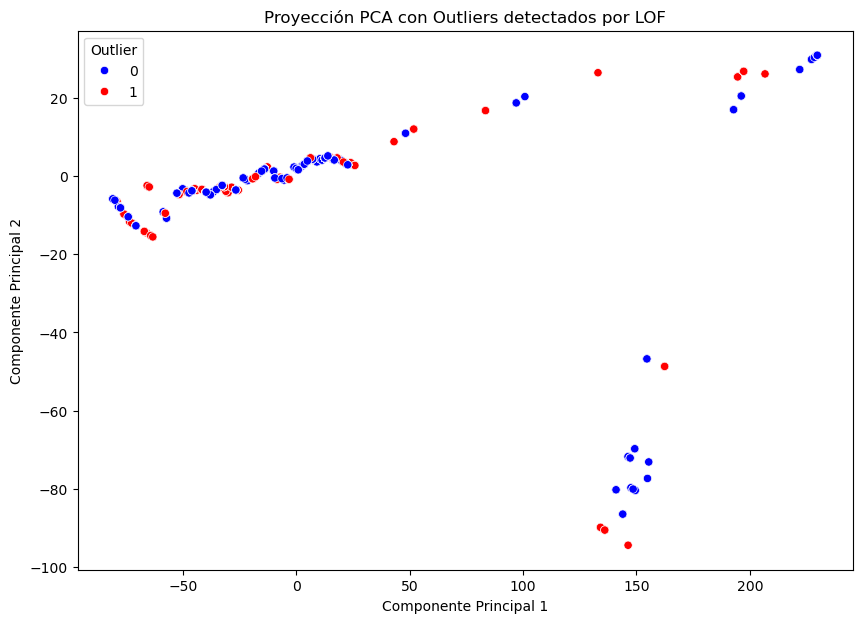

cluster_dbscan
 2     1871
 4      500
 13     375
 7      279
 10     230
 1      224
 0       52
 15      45
 8       40
 11      34
 12      34
 27      25
 21      24
 3       21
 26      17
 16      17
 18      17
 5       16
 30      15
 20      11
 22       7
 6        7
 17       7
 9        7
 14       5
-1        5
 28       5
 24       4
 25       4
 19       4
 23       3
 29       3
Name: count, dtype: int64


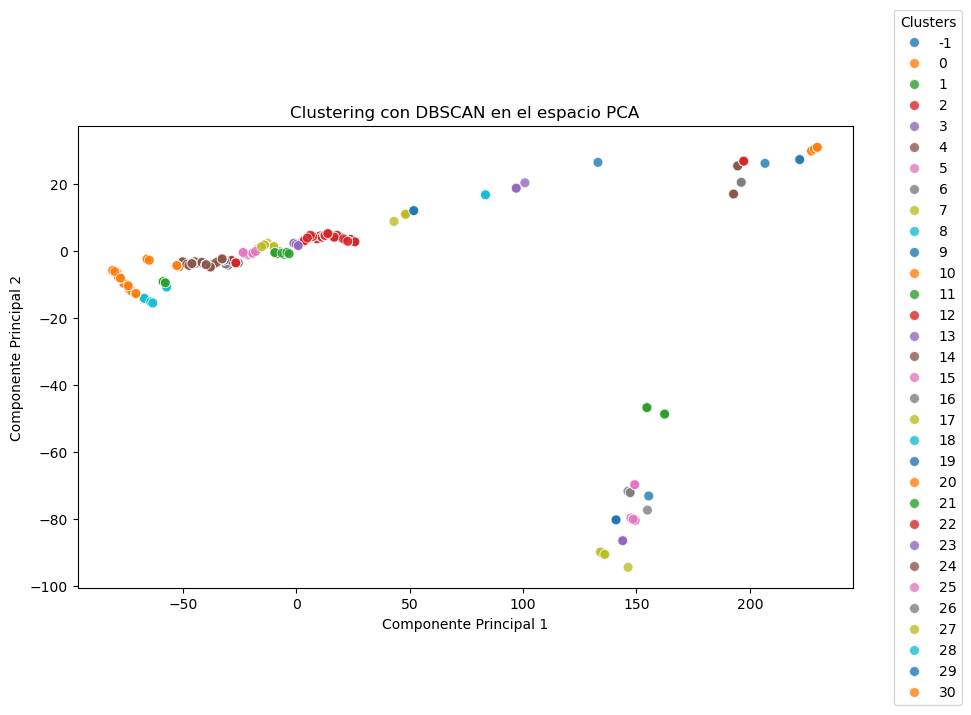

In [312]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Supongamos que ya seleccionaste las columnas numéricas relevantes
columnas_relevantes  = ['SubRubroCodigo', 'RubroCodigo', 'SubclasificacionCodigo', 'ClasificacionCodigo']
data_seleccionada = data[columnas_relevantes]

# Asegúrate de no tener valores nulos
data_seleccionada = data_seleccionada.dropna()

# Aplicar PCA para reducir a dos componentes principales
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(data_seleccionada)

# Agregar las componentes principales al DataFrame original
data['PC1'] = componentes_principales[:, 0]
data['PC2'] = componentes_principales[:, 1]

# ---- LOF ----
from sklearn.neighbors import LocalOutlierFactor

# Aplicar LOF para detectar outliers
lof = LocalOutlierFactor(n_neighbors=20)
data['Outlier'] = lof.fit_predict(data_seleccionada)
data['Outlier'] = data['Outlier'].apply(lambda x: 1 if x == -1 else 0)

# Scatterplot PCA con outliers resaltados
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Outlier', 
    data=data, 
    palette={0: 'blue', 1: 'red'}
)
plt.title("Proyección PCA con Outliers detectados por LOF")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Outlier", loc='best')
plt.show()

# ---- DBSCAN ----
# Escalar los datos para normalizar las características
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data_seleccionada)

# Ajustar el modelo DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)  # Ajusta eps y min_samples según tu dataset
data['cluster_dbscan'] = dbscan.fit_predict(features_scaled)

# Mostrar la cantidad de puntos en cada cluster
print(data['cluster_dbscan'].value_counts())

# Scatterplot DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2', hue='cluster_dbscan', data=data, palette='tab10', s=50, alpha=0.8
)
plt.title("Clustering con DBSCAN en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clusters", bbox_to_anchor=(1.15, 0.5), loc='right')
plt.show()



Catalogo
Normal     3613
Anómalo     295
Name: count, dtype: int64


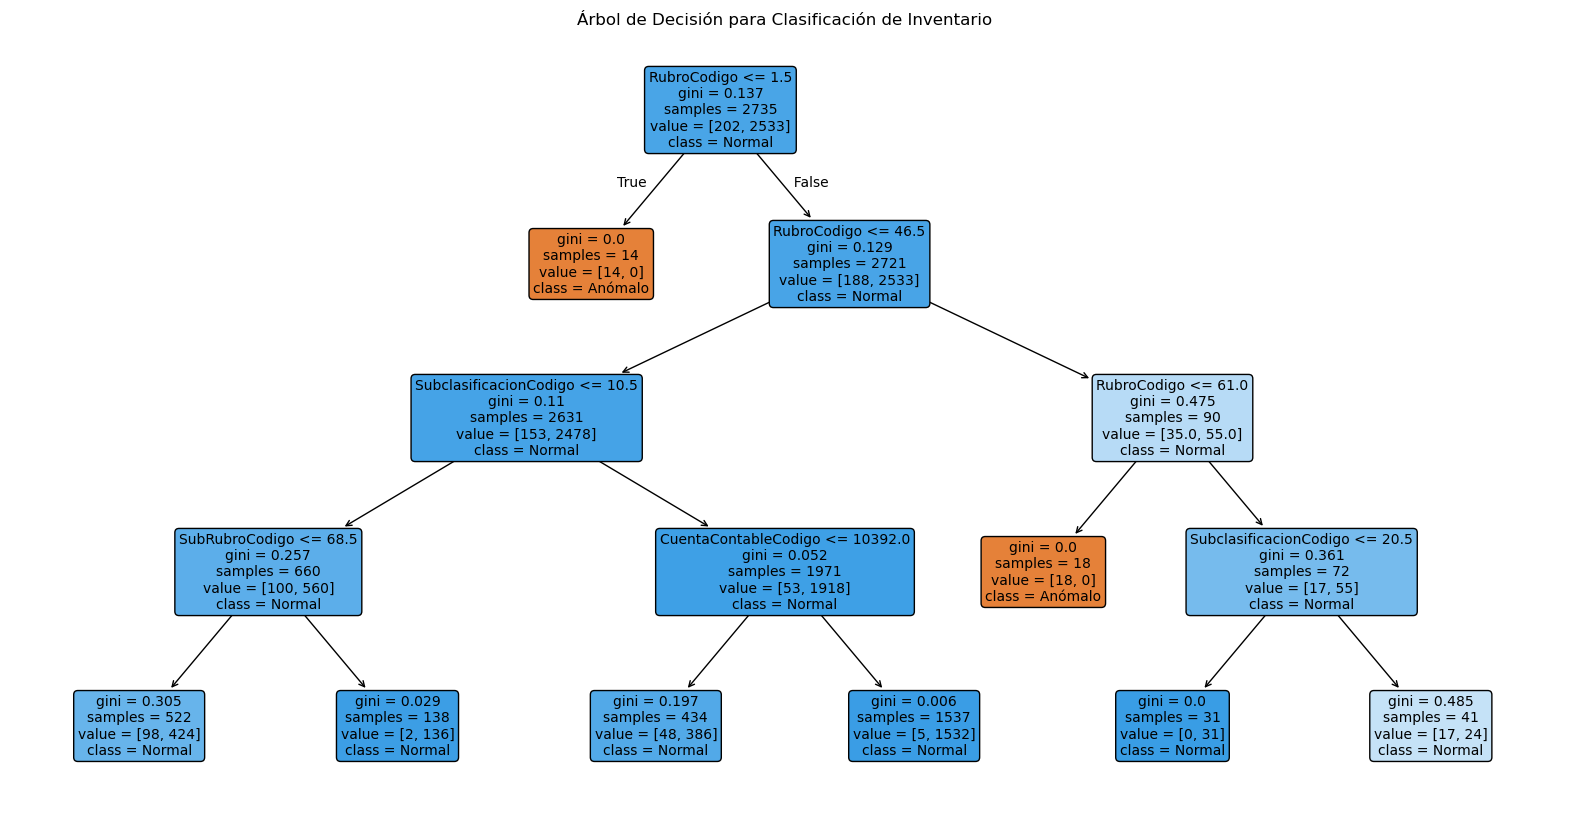

Precisión del modelo en el conjunto de prueba: 0.93


In [323]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Crear la columna Catalogo basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['Catalogo'] = data.apply(clasificar_producto, axis=1)

# Verificar la distribución de las clases creadas
print(data['Catalogo'].value_counts())

# Supongamos que ya seleccionaste las columnas relevantes

columnas_relevantes = ['CuentaContableCodigo','ClasificacionCodigo', 'SubclasificacionCodigo', 'RubroCodigo','SubRubroCodigo' ]

data_seleccionada = data[columnas_relevantes]
data_seleccionada = data_seleccionada.dropna()

# Variable objetivo y predictores
y = data['Catalogo']
X = data_seleccionada

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un árbol de decisión
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Ajusta max_depth si es necesario
dt_model.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=columnas_relevantes, 
    class_names=dt_model.classes_, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Árbol de Decisión para Clasificación de Inventario")
plt.show()

# Evaluación básica del modelo
accuracy = dt_model.score(X_test, y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")

Catalogo2
Normal     3613
Anómalo     295
Name: count, dtype: int64


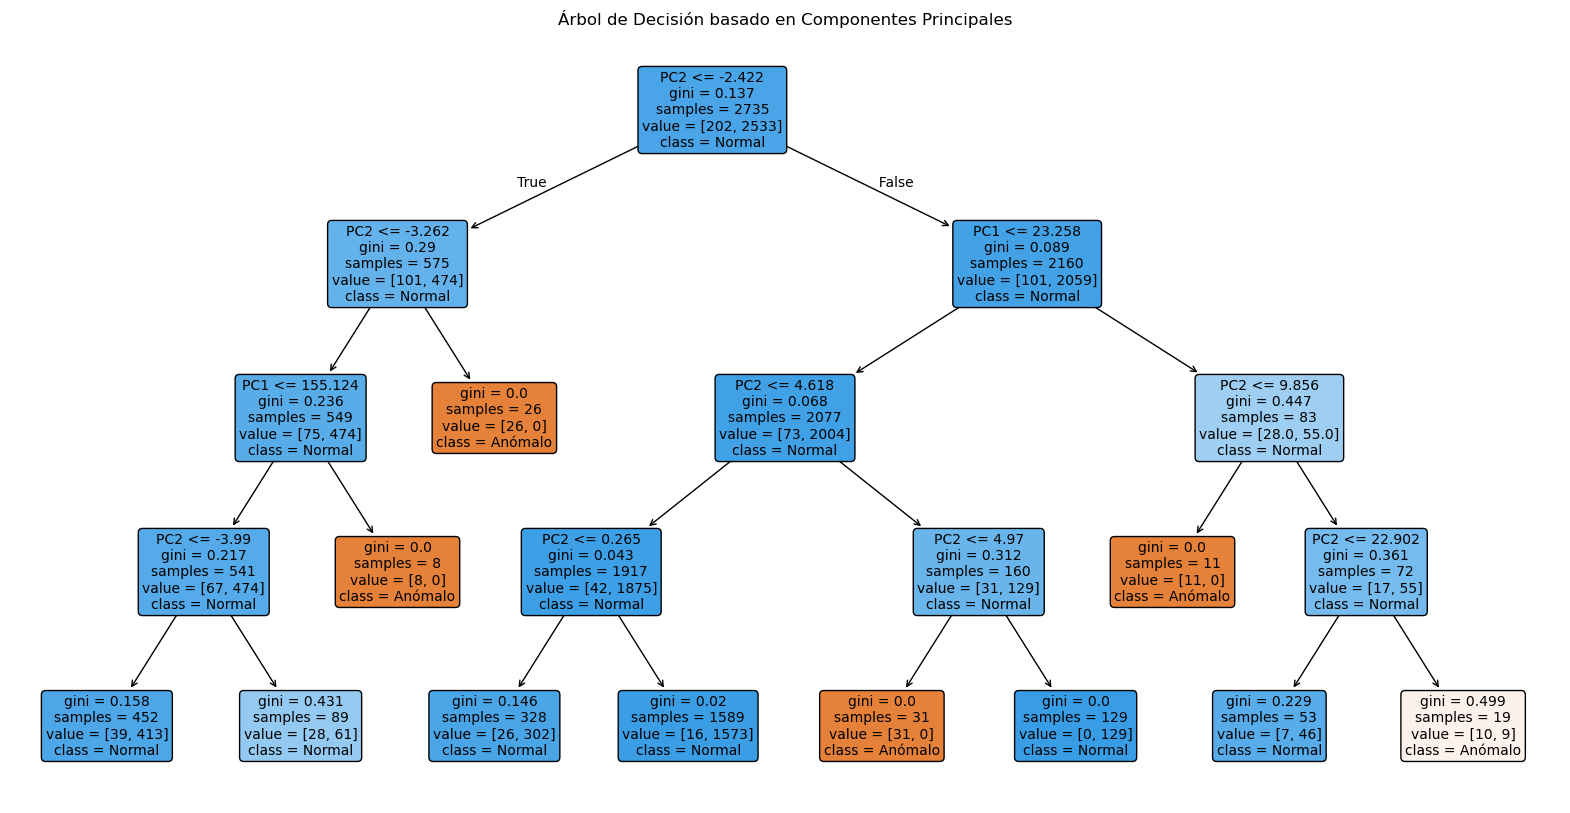

Precisión del modelo en el conjunto de prueba: 0.95


In [324]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Crear la columna Catalogo2 basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['Catalogo2'] = data.apply(clasificar_producto, axis=1)

# Verificar la distribución de las clases creadas
print(data['Catalogo2'].value_counts())

# Usar las componentes principales obtenidas previamente como características
columnas_pca = ['PC1', 'PC2']
X = data[columnas_pca]
y = data['Catalogo2']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un árbol de decisión
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Ajusta max_depth si es necesario
dt_model.fit(X_train, y_train)

# Graficar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model, 
    feature_names=columnas_pca, 
    class_names=dt_model.classes_, 
    filled=True, 
    rounded=True, 
    fontsize=10
)
plt.title("Árbol de Decisión basado en Componentes Principales")
plt.show()

# Evaluación básica del modelo
accuracy = dt_model.score(X_test, y_test)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")


In [325]:
data.head(10)


ProductoCodigo                               Nombre  ImpuestoId  Impuesto  \
0             357                             BATERIAS           1    IVA 21   
1             361                           MATERIALES           1    IVA 21   
2             364                      ROPA DE TRABAJO           1    IVA 21   
3             372           COMBUSTIBLES Y LUBRICANTES           1    IVA 21   
4             373                MATERIALES ELECTRICOS           1    IVA 21   
5             384           MATERIALES DE COMUNICACION           1    IVA 21   
6             389  MATERIALES DE COMUNICACIÓN AL 10,5            2  IVA 10,5   
7             390                               RESMAS           1    IVA 21   
8             391                            PAPELERÍA           1    IVA 21   
9             392             MATERIALES DE FERRETERÍA           1    IVA 21   

                             Descripcion  Activo  CuentaContableCodigo  \
0                  BATERIAS DE VEHICULOS       1                 10478   
1  MATERIALES PARA EL AREA DE PRODUCCION       1                 10422   
2                                    NaN       1                 10372   
3           COMBUSTIBLES Y LUBRINCANTES.       1                 10415   
4                                    NaN       0                 10420   
5             MATERIALES DE COMUNICACION       0                 10422   
6                                    NaN       0                 10422   
7                           RESMAS AUTOR       1                 10391   
8                        PAPELES- HOJAS.       1                 10391   
9                                    NaN       0                 10599   

                          CuentaContable  SubRubroCodigo  \
0  REPARACION Y MANTENIMIENTO DE RODADOS              28   
1                MATERIALES COMUNICACIÓN              71   
2                        ROPA DE TRABAJO              76   
3             COMBUSTIBLES Y LUBRICANTES             159   
4                  MATERIALES ELECTRICOS              70   
5                MATERIALES COMUNICACIÓN              70   
6                MATERIALES COMUNICACIÓN              70   
7                PAPELERIA E IMPRESIONES              87   
8                PAPELERIA E IMPRESIONES              87   
9                      MATERIALES VARIOS              86   

                                   SubRubro  ...  outlier        PC1  \
0                      BATERÍAS AUTOMOTICES  ...     True -51.793474   
1  ROUTER DE CONEXIÓN AÉREA Y PARA INTERIOR  ...    False  -4.181758   
2           EQUIPAMIENTO Y MATERIALES AUDIO  ...    False   2.181575   
3        REPARACIÓN Y MANTENIMIENTO RODADOS  ...    False  96.949614   
4           MATERIALES DE CONEXIONES VARIOS  ...    False  -5.455004   
5           MATERIALES DE CONEXIONES VARIOS  ...    False  -5.455004   
6           MATERIALES DE CONEXIONES VARIOS  ...    False  -5.455004   
7                                     PAPEL  ...    False  14.796914   
8                                     PAPEL  ...    False  14.796914   
9  ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...    False  13.860961   

         PC2 cluster  cluster_3 cluster_4  cluster_dbscan   target Catalogo  \
0  -4.735937       2          2         2               0  Anómalo  Anómalo   
1  -0.486802       0          0         0               1   Normal   Normal   
2   2.473514       0          0         0               2   Normal   Normal   
3  18.696982       3          1         3               3   Normal   Normal   
4  -1.023043       0          0         0               1   Normal   Normal   
5  -1.023043       0          0         0               1   Normal   Normal   
6  -1.023043       0          0         0               1   Normal   Normal   
7   4.794449       0          0         0               2  Anómalo  Anómalo   
8   4.794449       0          0         0               2  Anómalo  Anómalo   
9   5.146438       0          0         0               2   Nor

In [328]:
# Comparo catalogo y catalogo2
comparacion = data['Catalogo'] == data['Catalogo2']

# Conteo de valores coincidentes
total_iguales = comparacion.sum()
total_diferentes = len(data) - total_iguales
porcentaje_iguales = (total_iguales / len(data)) * 100

print(f"Total de valores iguales: {total_iguales}")
print(f"Total de valores diferentes: {total_diferentes}")
print(f"Porcentaje de coincidencia: {porcentaje_iguales:.2f}%")




Total de valores iguales: 3908
Total de valores diferentes: 0
Porcentaje de coincidencia: 100.00%


Clasificación del modelo SVM:
              precision    recall  f1-score   support

     Anómalo       1.00      0.08      0.14        93
      Normal       0.93      1.00      0.96      1080

    accuracy                           0.93      1173
   macro avg       0.96      0.54      0.55      1173
weighted avg       0.93      0.93      0.90      1173

Matriz de confusión:
[[   7   86]
 [   0 1080]]


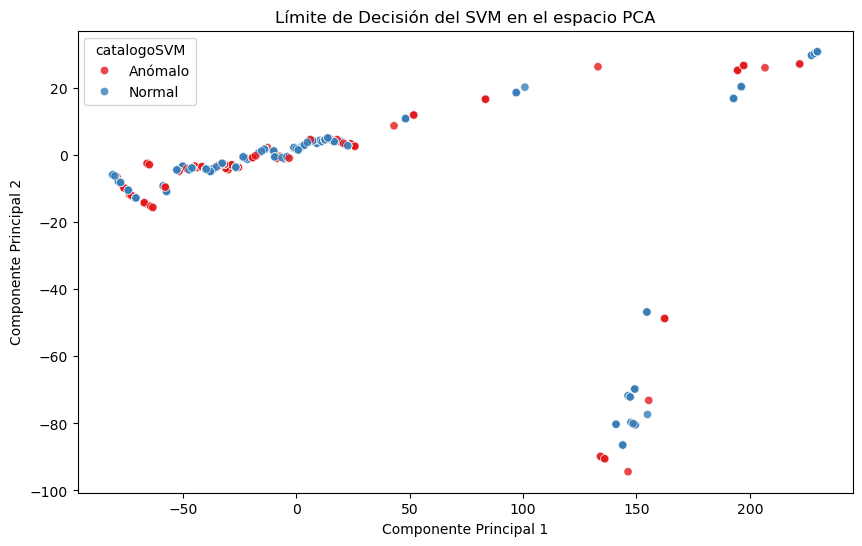

In [329]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoSVM basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if  row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoSVM'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para SVM
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  # Cambia a las columnas relevantes si no usas PCA
X = data[columnas_pca]
y = data['catalogoSVM']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Clasificación del modelo SVM:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del límite de decisión si usamos PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='catalogoSVM', data=data, palette='Set1', alpha=0.8)
plt.title("Límite de Decisión del SVM en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [330]:
data.tail(10)

ProductoCodigo                                             Nombre  \
3898            6146                     ROUTER CR2116-12G-4S 16 GB RAM   
3899            6147  SOPORTE TRAPECIO 300MM DOBLE SUSPENSION PARA B...   
3900            6148                              SELLOS PERSONALIZADOS   
3901            6149        IMPRESORA LASER B230V DNIA 34PPM LAN + WIFI   
3902            6154      TABLET 10´ PROCESADOR  QUAD CORE  RAM 2GB 32G   
3903            6155                              SMARTWATCH NM-PLUS BT   
3904            6156                        ETHERNET ADAPTADOR STARLINK   
3905            6157                     PIZARRA BLANCA MARCO ALUMINIO    
3906            6158               BORRADOR DE PIZARRA CON 3 MARCADORES   
3907            6159     PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V   

      ImpuestoId  Impuesto                                    Descripcion  \
3898           1    IVA 21      16GB RAM, 13xGb Ethernet y 4xSFP+ Puertos   
3899           1    IVA 21                                            NaN   
3900           1    IVA 21                                            NaN   
3901           2  IVA 10,5                                            NaN   
3902           2  IVA 10,5             Tablet para Donacion TK 21216/2024   
3903           1    IVA 21  relojes digitales para Donacion TK 21216/2024   
3904           1    IVA 21                                            NaN   
3905           1    IVA 21                                            NaN   
3906           1    IVA 21                                            NaN   
3907           1    IVA 21                                            NaN   

      Activo  CuentaContableCodigo              CuentaContable  \
3898       1                 10422     MATERIALES COMUNICACIÓN   
3899       1                 10422     MATERIALES COMUNICACIÓN   
3900       1                 10082            MUEBLES Y UTILES   
3901       1                 10089  MAQUINAS Y EQUIPOS EMPRESA   
3902       1                 10073  EQUIPOS - Bienes de Cambio   
3903       1                 10073  EQUIPOS - Bienes de Cambio   
3904       1                 10422     MATERIALES COMUNICACIÓN   
3905       1                 10082            MUEBLES Y UTILES   
3906       1                 10082            MUEBLES Y UTILES   
3907       1                 10422     MATERIALES COMUNICACIÓN   

      SubRubroCodigo                                           SubRubro  ...  \
3898              72  SOHO (MODEM-ROUTER-SWITCH DE TIPO SMALL OFFICE...  ...   
3899              75                      OTROS CCESORIOS PARA CABLEADO  ...   
3900              86           ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...   
3901              93                                         IMPRESORAS  ...   
3902             236                             CELULARES Y ACCESORIOS  ...   
3903             236                             CELULARES Y ACCESORIOS  ...   
3904              95            PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA  ...   
3905              86           ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...   
3906              86           ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...   
3907              75                      OTROS CCESORIOS PARA CABLEADO  ...   

             PC1        PC2  cluster cluster_3  cluster_4 cluster_dbscan  \
3898   -3.245805  -0.838791        0         0          0              1   
3899    0.787638   1.583763        0         0          0             13   
3900   13.860961   5.146438        0         0          0              2   
3901   20.749926   3.570746        0         0          0              2   
3902  154.591238 -46.763650        3         1          3             11   
3903  154.591238 -46.763650        3         1          3             11   
3904   22.621832   2.866769        0         0          0              2   
3905   13.860961   5.146438        0         0          0              2   
3906   13.860961   5.146438        0    

Clasificación del modelo SVM:
              precision    recall  f1-score   support

     Anómalo       1.00      0.05      0.10        93
      Normal       0.92      1.00      0.96      1080

    accuracy                           0.92      1173
   macro avg       0.96      0.53      0.53      1173
weighted avg       0.93      0.92      0.89      1173

Matriz de confusión:
[[   5   88]
 [   0 1080]]


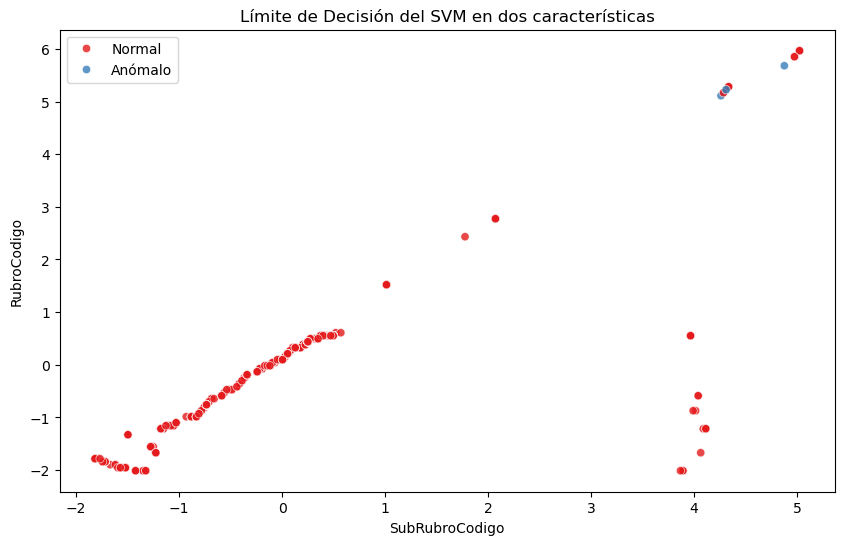

In [331]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoSVM2 basada en reglas personalizadas
# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoSVM2'] = data.apply(clasificar_producto, axis=1)

# Usar las columnas relevantes directamente como predictores
#columnas_relevantes = ['CuentaContableCodigo','ClasificacionCodigo', 'SubclasificacionCodigo', 'RubroCodigo','SubRubroCodigo' ]
columnas_relevantes = ['SubRubroCodigo', 'RubroCodigo', 'SubclasificacionCodigo', 'ClasificacionCodigo']
X = data[columnas_relevantes]
y = data['catalogoSVM2']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Clasificación del modelo SVM:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del resultado en dos dimensiones (solo aplicable si hay dos características dominantes)
# Usaremos solo las dos primeras columnas relevantes para simplificar la visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Set1', alpha=0.8)
plt.title("Límite de Decisión del SVM en dos características")
plt.xlabel(columnas_relevantes[0])
plt.ylabel(columnas_relevantes[1])
plt.show()


In [333]:
data.tail(5)

ProductoCodigo                                          Nombre  \
3903            6155                           SMARTWATCH NM-PLUS BT   
3904            6156                     ETHERNET ADAPTADOR STARLINK   
3905            6157                  PIZARRA BLANCA MARCO ALUMINIO    
3906            6158            BORRADOR DE PIZARRA CON 3 MARCADORES   
3907            6159  PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V   

      ImpuestoId Impuesto                                    Descripcion  \
3903           1   IVA 21  relojes digitales para Donacion TK 21216/2024   
3904           1   IVA 21                                            NaN   
3905           1   IVA 21                                            NaN   
3906           1   IVA 21                                            NaN   
3907           1   IVA 21                                            NaN   

      Activo  CuentaContableCodigo              CuentaContable  \
3903       1                 10073  EQUIPOS - Bienes de Cambio   
3904       1                 10422     MATERIALES COMUNICACIÓN   
3905       1                 10082            MUEBLES Y UTILES   
3906       1                 10082            MUEBLES Y UTILES   
3907       1                 10422     MATERIALES COMUNICACIÓN   

      SubRubroCodigo                                  SubRubro  ...  \
3903             236                    CELULARES Y ACCESORIOS  ...   
3904              95   PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA  ...   
3905              86  ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...   
3906              86  ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...   
3907              75             OTROS CCESORIOS PARA CABLEADO  ...   

            PC2 cluster  cluster_3 cluster_4  cluster_dbscan  target  \
3903 -46.763650       3          1         3              11  Normal   
3904   2.866769       0          0         0               2  Normal   
3905   5.146438       0          0         0               2  Normal   
3906   5.146438       0          0         0               2  Normal   
3907   1.583763       0          0         0              13  Normal   

      Catalogo Catalogo2 catalogoSVM  catalogoSVM2  
3903    Normal    Normal      Normal        Normal  
3904    Normal    Normal      Normal        Normal  
3905    Normal    Normal      Normal        Normal  
3906    Normal    Normal      Normal        Normal  
3907    Normal    Normal      Normal        Normal  

[5 rows x 48 columns]

Clasificación del modelo SVM después de aplicar SMOTE:
              precision    recall  f1-score   support

     Anómalo       0.69      0.55      0.61      1082
      Normal       0.63      0.75      0.68      1086

    accuracy                           0.65      2168
   macro avg       0.66      0.65      0.65      2168
weighted avg       0.66      0.65      0.65      2168

Matriz de confusión:
[[597 485]
 [271 815]]


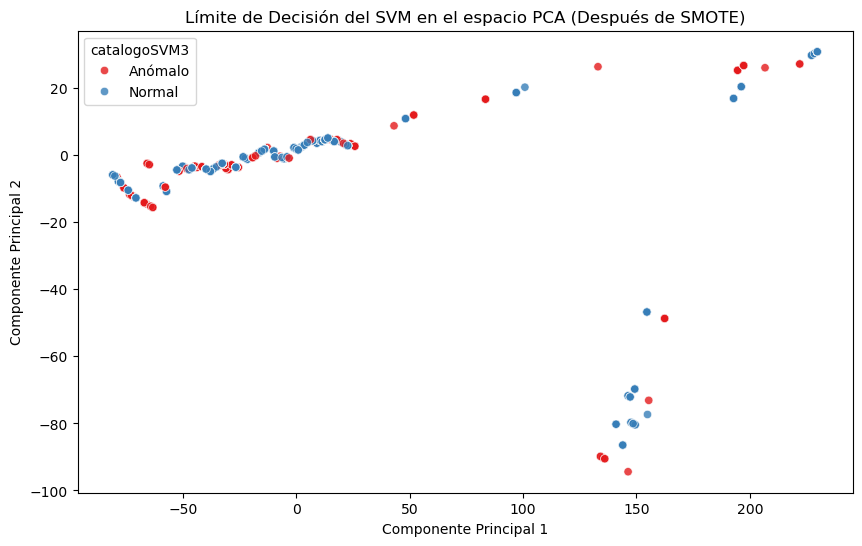

In [335]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoSVM3 basada en reglas personalizadas

# Regla 1: Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoSVM3'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para SVM
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['catalogoSVM3']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenar el modelo SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Clasificación del modelo SVM después de aplicar SMOTE:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del límite de decisión si usamos PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='catalogoSVM3', data=data, palette='Set1', alpha=0.8)
plt.title("Límite de Decisión del SVM en el espacio PCA (Después de SMOTE)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


Clasificación del modelo SVM después de ajustar hiperparámetros:
              precision    recall  f1-score   support

     Anómalo       0.69      0.55      0.61      1082
      Normal       0.63      0.76      0.69      1086

    accuracy                           0.65      2168
   macro avg       0.66      0.65      0.65      2168
weighted avg       0.66      0.65      0.65      2168

Matriz de confusión:
[[597 485]
 [263 823]]


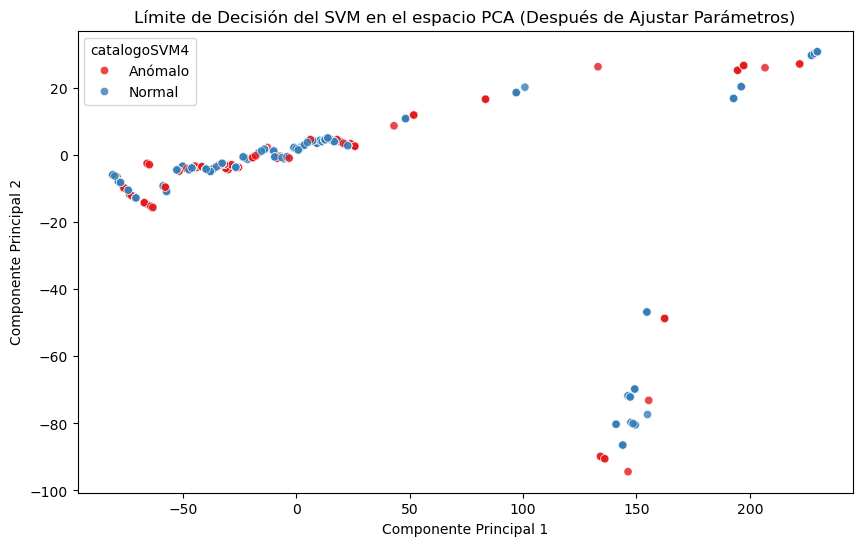

In [336]:
#AJUSTAO PARAMETROS
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoSVM4 basada en reglas personalizadas

# Regla : Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoSVM4'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para SVM
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2'] 
X = data[columnas_pca]
y = data['catalogoSVM4']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Ajustar el modelo SVM con nuevos hiperparámetros
svm_model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
svm_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test)
print("Clasificación del modelo SVM después de ajustar hiperparámetros:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización del límite de decisión si usamos PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='catalogoSVM4', data=data, palette='Set1', alpha=0.8)
plt.title("Límite de Decisión del SVM en el espacio PCA (Después de Ajustar Parámetros)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


Clasificación del modelo Random Forest:
              precision    recall  f1-score   support

     Anómalo       1.00      1.00      1.00      1082
      Normal       1.00      1.00      1.00      1086

    accuracy                           1.00      2168
   macro avg       1.00      1.00      1.00      2168
weighted avg       1.00      1.00      1.00      2168

Matriz de confusión:
[[1077    5]
 [   0 1086]]


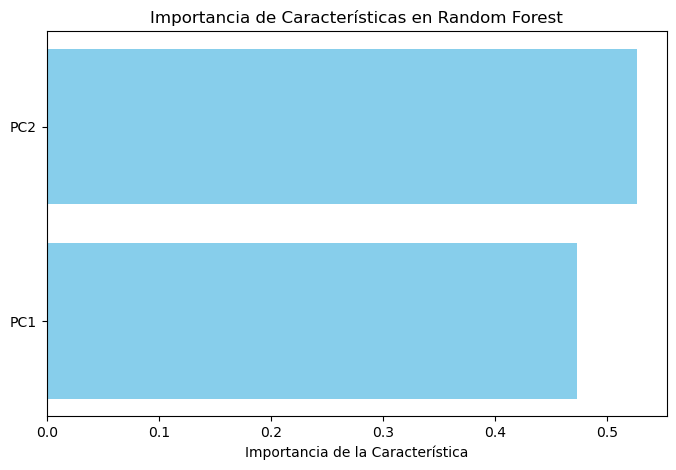

In [337]:
#Random Forest
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoRamdomF basada en reglas personalizadas
# Regla : Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoRamdomF'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para Random Forest
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['catalogoRamdomF']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf_model.predict(X_test)
print("Clasificación del modelo Random Forest:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización de importancia de características
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(columnas_pca, importances, color='skyblue')
plt.xlabel("Importancia de la Característica")
plt.title("Importancia de Características en Random Forest")
plt.show()


Clasificación del modelo Random Forest (Sin SMOTE):
              precision    recall  f1-score   support

     Anómalo       1.00      1.00      1.00        93
      Normal       1.00      1.00      1.00      1080

    accuracy                           1.00      1173
   macro avg       1.00      1.00      1.00      1173
weighted avg       1.00      1.00      1.00      1173

Matriz de confusión:
[[  93    0]
 [   0 1080]]


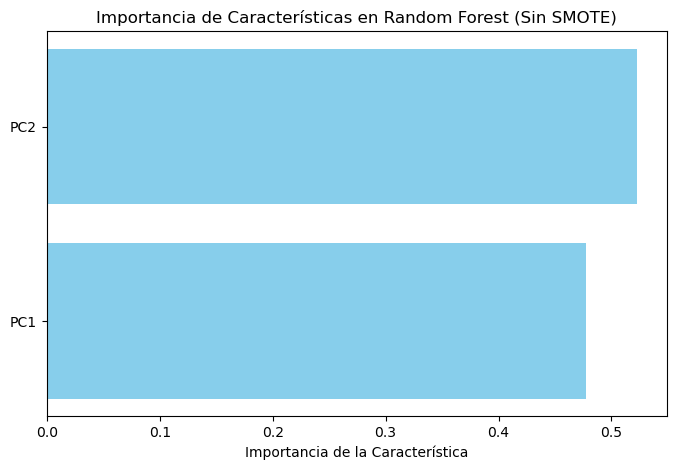

In [338]:
#SIN SMOTE
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna catalogoRamdomF2 basada en reglas personalizadas
# Regla : Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['catalogoRamdomF2'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para Random Forest sin SMOTE
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['catalogoRamdomF2']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Entrenar el modelo Random Forest sin SMOTE
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf_model.predict(X_test)
print("Clasificación del modelo Random Forest (Sin SMOTE):")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización de importancia de características
importances = rf_model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(columnas_pca, importances, color='skyblue')
plt.xlabel("Importancia de la Característica")
plt.title("Importancia de Características en Random Forest (Sin SMOTE)")
plt.show()


In [339]:
#CrossValidation
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna crossValidation basada en reglas personalizadas
# Regla : Incorporar etiquetas de anomalías (DBSCAN o LOF) si están disponibles
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['crossValidation'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para Random Forest
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['crossValidation']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validación cruzada para el modelo sin SMOTE
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
scores_sin_smote = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='f1_macro')
print("F1-Score promedio (sin SMOTE):", scores_sin_smote.mean())

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Validación cruzada para el modelo con SMOTE
rf_model_smote = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
scores_con_smote = cross_val_score(rf_model_smote, X_resampled, y_resampled, cv=5, scoring='f1_macro')
print("F1-Score promedio (con SMOTE):", scores_con_smote.mean())

# Comparación de resultados
print("\nComparación de resultados:")
print("Sin SMOTE:")
print("F1-Scores por validación:", scores_sin_smote)
print("Promedio:", scores_sin_smote.mean())
print("\nCon SMOTE:")
print("F1-Scores por validación:", scores_con_smote)
print("Promedio:", scores_con_smote.mean())


F1-Score promedio (sin SMOTE): 0.9623448054963701
F1-Score promedio (con SMOTE): 0.9918317344852167

Comparación de resultados:
Sin SMOTE:
F1-Scores por validación: [0.98592133 0.99538095 0.99538095 0.99538047 0.83966032]
Promedio: 0.9623448054963701

Con SMOTE:
F1-Scores por validación: [0.99723373 1.         0.99861592 0.9972318  0.96607723]
Promedio: 0.9918317344852167



Comparación de resultados:
Sin SMOTE:
F1-Scores por validación: [0.98592133 0.99538095 0.99538095 0.99538047 0.83966032]
Promedio: 0.9623448054963701

Con SMOTE:
F1-Scores por validación: [0.99723373 1.         0.99861592 0.9972318  0.96607723]
Promedio: 0.9918317344852167


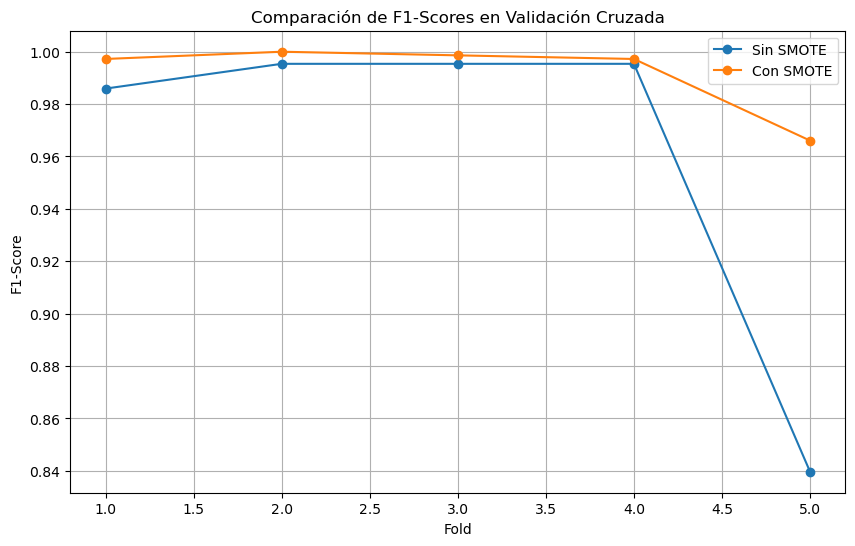

In [344]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna crossValidation basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['crossValidation'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos para Random Forest
columnas_pca = ['PC1', 'PC2'] 
X = data[columnas_pca]
y = data['crossValidation']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Validación cruzada para el modelo sin SMOTE
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
scores_sin_smote = cross_val_score(rf_model, X_scaled, y, cv=5, scoring='f1_macro')

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Validación cruzada para el modelo con SMOTE
rf_model_smote = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
scores_con_smote = cross_val_score(rf_model_smote, X_resampled, y_resampled, cv=5, scoring='f1_macro')

# Comparación de resultados
print("\nComparación de resultados:")
print("Sin SMOTE:")
print("F1-Scores por validación:", scores_sin_smote)
print("Promedio:", scores_sin_smote.mean())
print("\nCon SMOTE:")
print("F1-Scores por validación:", scores_con_smote)
print("Promedio:", scores_con_smote.mean())

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), scores_sin_smote, label='Sin SMOTE', marker='o')
plt.plot(range(1, 6), scores_con_smote, label='Con SMOTE', marker='o')
plt.title("Comparación de F1-Scores en Validación Cruzada")
plt.xlabel("Fold")
plt.ylabel("F1-Score")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8670 - loss: 0.5256 - val_accuracy: 0.9207 - val_loss: 0.3127
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9278 - loss: 0.2945 - val_accuracy: 0.9207 - val_loss: 0.2832
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9280 - loss: 0.2565 - val_accuracy: 0.9207 - val_loss: 0.2700
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9263 - loss: 0.2624 - val_accuracy: 0.9207 - val_loss: 0.2650
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9276 - loss: 0.2547 - val_accuracy: 0.9207 - val_loss: 0.2641
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9184 - loss: 0.2704 - val_accuracy: 0.9207 - val_loss: 0.2666
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9213 - loss: 0.2588 - val_accuracy: 0.9165 - val_loss: 0.2644
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9214 - loss: 0.2581 - val_accuracy: 0.9207 - val_loss:

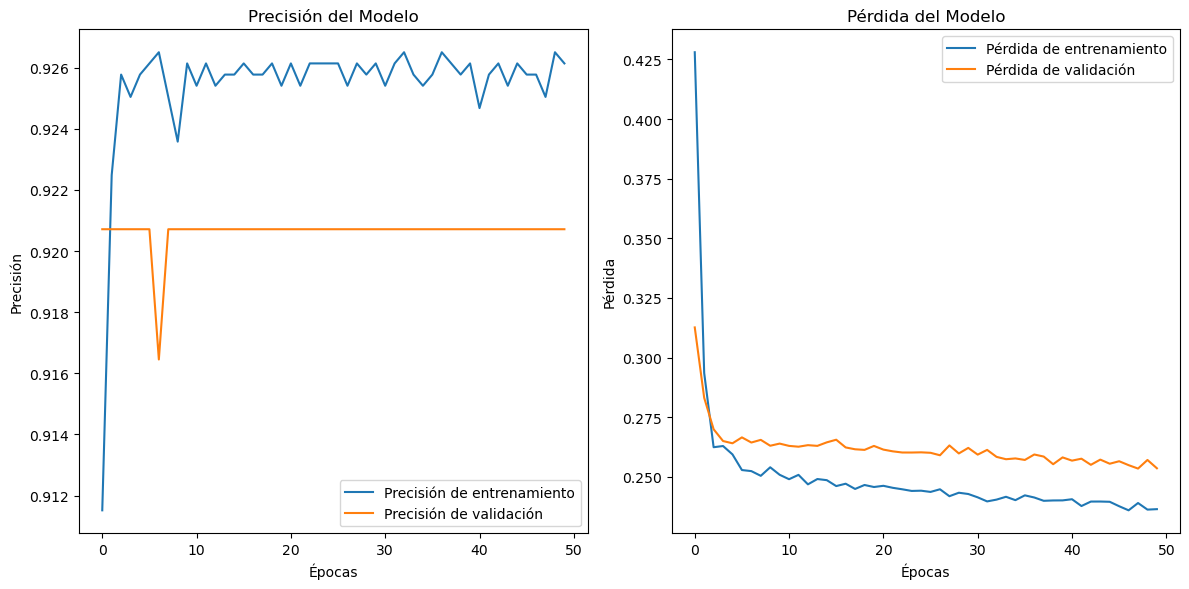

In [346]:
#REDES NEURONALES
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

# Crear la columna RedesNeuronales basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['RedesNeuronales'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  # Cambia a las columnas relevantes si no usas PCA
X = data[columnas_pca]
y = data['RedesNeuronales']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)

# Construcción del modelo de red neuronal
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Define explícitamente la forma de entrada
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en prueba: {loss}")
print(f"Precisión en prueba: {accuracy}")

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8934 - loss: 0.5411 - val_accuracy: 0.9207 - val_loss: 0.3279
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9260 - loss: 0.2897 - val_accuracy: 0.9207 - val_loss: 0.2873
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9194 - loss: 0.2953 - val_accuracy: 0.9207 - val_loss: 0.2693
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9264 - loss: 0.2552 - val_accuracy: 0.9207 - val_loss: 0.2664
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9323 - loss: 0.2405 - val_accuracy: 0.9207 - val_loss: 0.2681
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9263 - loss: 0.2476 - val_accuracy: 0.9156 - val_loss: 0.2677
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9267 - loss: 0.2523 - val_accuracy: 0.9207 - val_loss: 0.2674
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9326 - loss: 0.2323 - val_accuracy: 0.9207 - 

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9367 - loss: 0.2183 - val_accuracy: 0.9207 - val_loss: 0.2501
Epoch 52/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9230 - loss: 0.2439 - val_accuracy: 0.9207 - val_loss: 0.2540
Epoch 53/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9281 - loss: 0.2324 - val_accuracy: 0.9207 - val_loss: 0.2517
Epoch 54/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9265 - loss: 0.2386 - val_accuracy: 0.9207 - val_loss: 0.2491
Epoch 55/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9321 - loss: 0.2231 - val_accuracy: 0.9207 - val_loss: 0.2485
Epoch 56/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9231 - loss: 0.2388 - val_accuracy: 0.9207 - val_loss: 0.2500
Epoch 57/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9216 - loss: 0.2428 - val_accuracy: 0.9207 - val_loss: 0.2511
Epoch 58/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9288 - loss: 0.2316 - val_accuracy: 0.9207 - val_lo

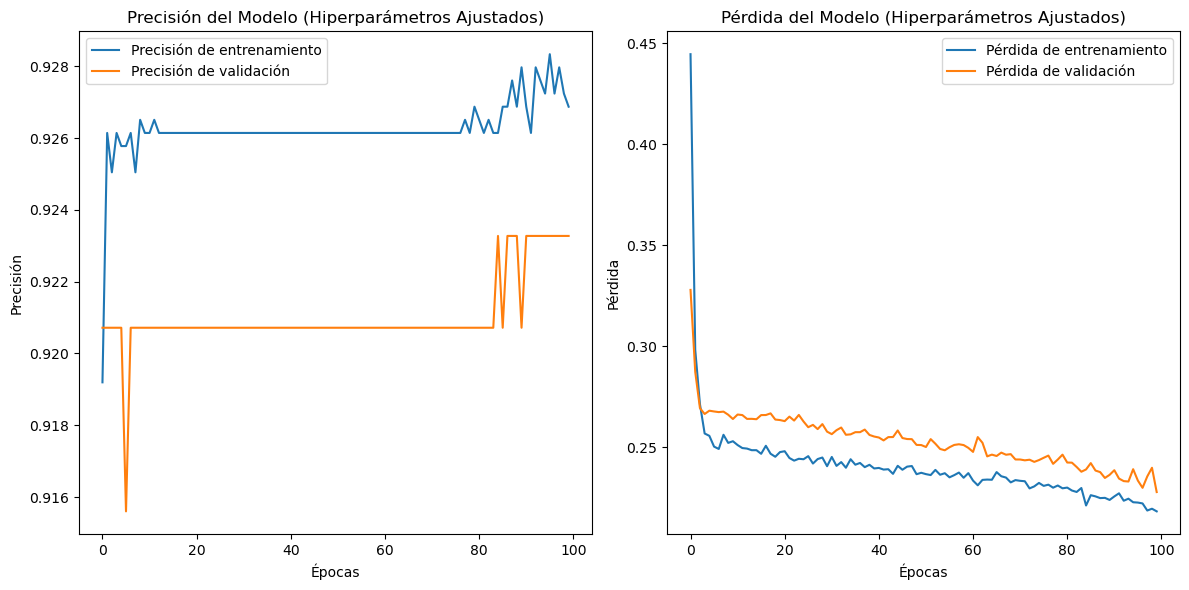

In [348]:
#REDES NEURONALES con ajuste de parametros
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

# Crear la columna target basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['RedesNeuronales'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['RedesNeuronales']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)



# Adjusted model definition
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Explicitly define the input shape
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en prueba: {loss}")
print(f"Precisión en prueba: {accuracy}")

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del Modelo (Hiperparámetros Ajustados)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del Modelo (Hiperparámetros Ajustados)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7455 - loss: 0.6342 - val_accuracy: 0.9207 - val_loss: 0.4675
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9323 - loss: 0.4134 - val_accuracy: 0.9207 - val_loss: 0.3349
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9331 - loss: 0.3042 - val_accuracy: 0.9207 - val_loss: 0.3034
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9163 - loss: 0.3183 - val_accuracy: 0.9207 - val_loss: 0.2926
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9245 - loss: 0.2775 - val_accuracy: 0.9207 - val_loss: 0.2824
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9233 - loss: 0.2715 - val_accuracy: 0.9207 - val_loss: 0.2722
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9240 - loss: 0.2786 - val_accuracy: 0.9207 - val_loss: 0.2683
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9213 - loss: 0.2738 - val_accuracy: 0.9207 - 

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9214 - loss: 0.2446 - val_accuracy: 0.9207 - val_loss: 0.2607
Epoch 52/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9223 - loss: 0.2539 - val_accuracy: 0.9207 - val_loss: 0.2615
Epoch 53/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9288 - loss: 0.2374 - val_accuracy: 0.9207 - val_loss: 0.2605
Epoch 54/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9296 - loss: 0.2302 - val_accuracy: 0.9207 - val_loss: 0.2591
Epoch 55/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9228 - loss: 0.2542 - val_accuracy: 0.9207 - val_loss: 0.2607
Epoch 56/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9213 - loss: 0.2548 - val_accuracy: 0.9207 - val_loss: 0.2603
Epoch 57/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9284 - loss: 0.2327 - val_accuracy: 0.9207 - val_loss: 0.2592
Epoch 58/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9370 - loss: 0.2168 - val_accuracy: 0.9207 - val_lo

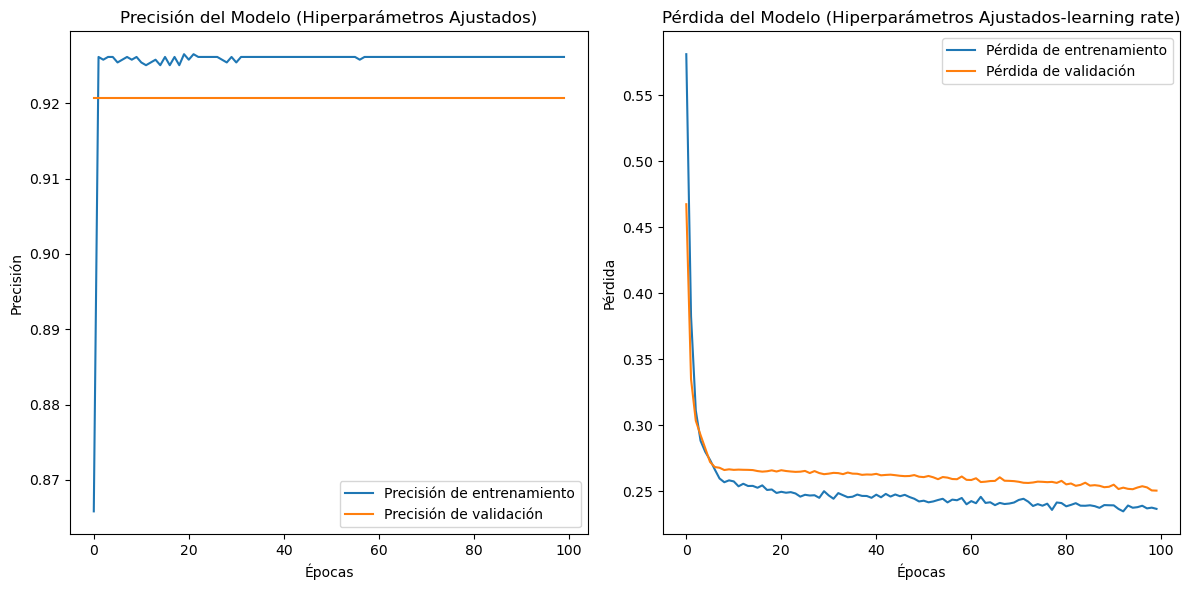

In [349]:
#REDES NEURONALES con ajuste de parametros/ajustando learning rate Ajustar, tasa de aprendizaje  con learning_rate=0.0005
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt

# Crear la columna RedesNeuronales3 basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['RedesNeuronales3'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['RedesNeuronales3']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.3, random_state=42)



# Adjusta
model = Sequential()
model.add(Input(shape=(X_train.shape[1],))) 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en prueba: {loss}")
print(f"Precisión en prueba: {accuracy}")

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del Modelo (Hiperparámetros Ajustados)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del Modelo (Hiperparámetros Ajustados-learning rate)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6216 - loss: 0.6693 - val_accuracy: 0.6725 - val_loss: 0.6279
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6500 - loss: 0.6490 - val_accuracy: 0.6725 - val_loss: 0.6149
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 0.6265 - val_accuracy: 0.6725 - val_loss: 0.6101
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6630 - loss: 0.6245 - val_accuracy: 0.6642 - val_loss: 0.6017
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6747 - loss: 0.6123 - val_accuracy: 0.6757 - val_loss: 0.5994
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6747 - loss: 0.6038 - val_accuracy: 0.6661 - val_loss: 0.5915
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 0.5994 - val_accuracy: 0.7039 - val_loss: 0.5868
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.5932 - val_accuracy: 0.6702 -

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8098 - loss: 0.3850 - val_accuracy: 0.8326 - val_loss: 0.3251
Epoch 52/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8045 - loss: 0.3900 - val_accuracy: 0.8399 - val_loss: 0.3272
Epoch 53/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8047 - loss: 0.3886 - val_accuracy: 0.8326 - val_loss: 0.3210
Epoch 54/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8262 - loss: 0.3530 - val_accuracy: 0.8312 - val_loss: 0.3251
Epoch 55/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8149 - loss: 0.3719 - val_accuracy: 0.8413 - val_loss: 0.3186
Epoch 56/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8129 - loss: 0.3774 - val_accuracy: 0.8326 - val_loss: 0.3161
Epoch 57/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8127 - loss: 0.3767 - val_accuracy: 0.8399 - val_loss: 0.3202
Epoch 58/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8044 - loss: 0.3855 - val_accuracy: 0.8326 - val_lo

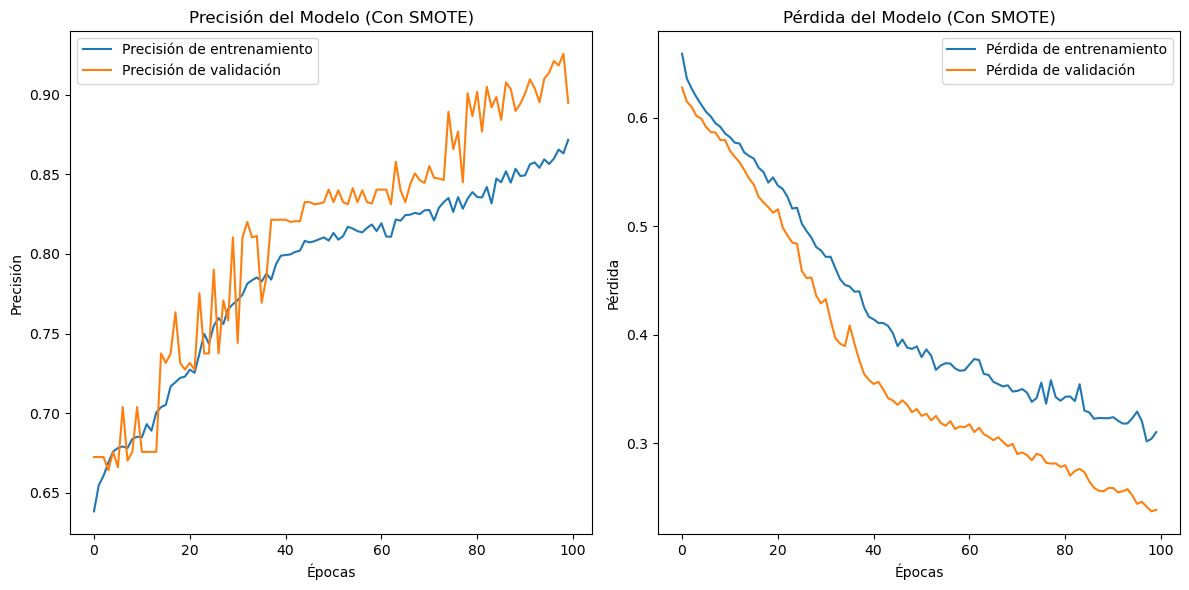

In [350]:
# Redes Neuronales con smote
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Crear la columna RedesNeuronalesSmote basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['RedesNeuronalesSmote'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
# Usar componentes principales o columnas relevantes como predictores
columnas_pca = ['PC1', 'PC2'] 
X = data[columnas_pca]
y = data['RedesNeuronalesSmote']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.3, random_state=42)

# Definición del modelo ajustado
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Definir explícitamente la forma de entrada
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en prueba: {loss}")
print(f"Precisión en prueba: {accuracy}")

# Graficar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión del Modelo (Con SMOTE)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida del Modelo (Con SMOTE)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5736 - loss: 0.6779 - val_accuracy: 0.6518 - val_loss: 0.6305
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6547 - loss: 0.6397 - val_accuracy: 0.6513 - val_loss: 0.6218
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6630 - loss: 0.6223 - val_accuracy: 0.6642 - val_loss: 0.6138
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6748 - loss: 0.6146 - val_accuracy: 0.6910 - val_loss: 0.6047
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6681 - loss: 0.6161 - val_accuracy: 0.6656 - val_loss: 0.6011
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6844 - loss: 0.5983 - val_accuracy: 0.6757 - val_loss: 0.5971
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6693 - loss: 0.6044 - val_accuracy: 0.6877 - val_loss: 0.5899
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6709 - loss: 0.5959 - val_accuracy: 0.6757 - 

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7877 - loss: 0.4225 - val_accuracy: 0.8367 - val_loss: 0.3487
Epoch 52/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7873 - loss: 0.4258 - val_accuracy: 0.8358 - val_loss: 0.3434
Epoch 53/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7889 - loss: 0.4054 - val_accuracy: 0.8118 - val_loss: 0.3513
Epoch 54/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8033 - loss: 0.3983 - val_accuracy: 0.8113 - val_loss: 0.3450
Epoch 55/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7960 - loss: 0.4087 - val_accuracy: 0.8390 - val_loss: 0.3485
Epoch 56/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7679 - loss: 0.4570 - val_accuracy: 0.7744 - val_loss: 0.4038
Epoch 57/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7720 - loss: 0.4503 - val_accuracy: 0.8261 - val_loss: 0.3526
Epoch 58/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8025 - loss: 0.4033 - val_accuracy: 0.8464 - val_lo

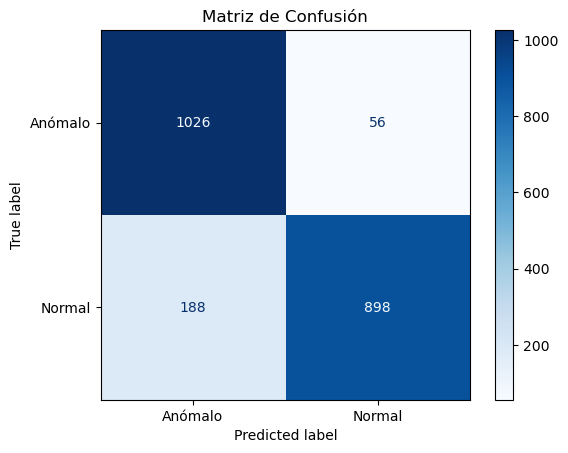

In [354]:
#matriz de confusion
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Crear la columna matriz basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['matriz'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
columnas_pca = ['PC1', 'PC2'] 
X = data[columnas_pca]
y = data['matriz']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Generar el informe de clasificación
report = classification_report(y_test_classes, y_pred_classes, target_names=encoder.classes_)
print(report)

# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión')
plt.show()


Epoch 1/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5937 - loss: 0.6735 - val_accuracy: 0.6444 - val_loss: 0.6307
Epoch 2/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6392 - loss: 0.6404 - val_accuracy: 0.6467 - val_loss: 0.6301
Epoch 3/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6574 - loss: 0.6358 - val_accuracy: 0.6587 - val_loss: 0.6120
Epoch 4/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6502 - loss: 0.6304 - val_accuracy: 0.6767 - val_loss: 0.6106
Epoch 5/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6631 - loss: 0.6194 - val_accuracy: 0.6642 - val_loss: 0.6023
Epoch 6/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6755 - loss: 0.6108 - val_accuracy: 0.6757 - val_loss: 0.5986
Epoch 7/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6732 - loss: 0.6121 - val_accuracy: 0.6757 - val_loss: 0.5928
Epoch 8/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6576 - loss: 0.6028 - val_accuracy: 0.6651 - val_loss:

Epoch 52/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8210 - loss: 0.3814 - val_accuracy: 0.8312 - val_loss: 0.3342
Epoch 53/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8163 - loss: 0.3758 - val_accuracy: 0.8316 - val_loss: 0.3326
Epoch 54/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8085 - loss: 0.3881 - val_accuracy: 0.8413 - val_loss: 0.3267
Epoch 55/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8086 - loss: 0.3871 - val_accuracy: 0.8312 - val_loss: 0.3260
Epoch 56/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.3685 - val_accuracy: 0.8404 - val_loss: 0.3240
Epoch 57/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8194 - loss: 0.3760 - val_accuracy: 0.8312 - val_loss: 0.3217
Epoch 58/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8114 - loss: 0.3775 - val_accuracy: 0.8326 - val_loss: 0.3193
Epoch 59/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8246 - loss: 0.3554 - val_accuracy: 0.8413 - v

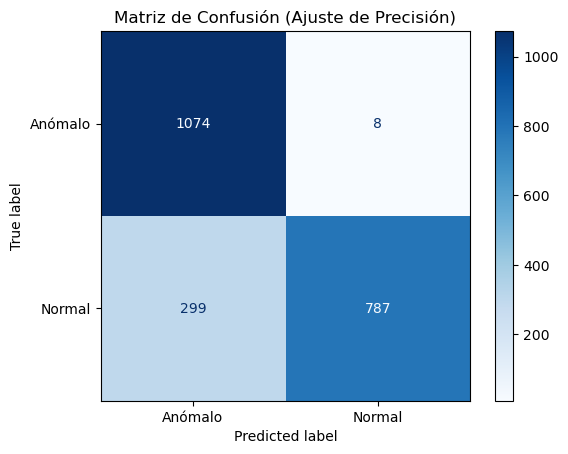

In [352]:
# Se modificado el algoritmo para ajustar el entrenamiento y priorizar una precisión de 0.88.
# Los cambios incluyen limitar el número de épocas a 70
# este llevar a tesis porque es mejor y explicar por que
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Crear la columna RedesNeuronales basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['RedesNeuronales'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['RedesNeuronales']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo con un ajuste para priorizar la clase Anómalo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo con un número limitado de épocas para ajustar precisión
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=64, verbose=1)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Generar el informe de clasificación
report = classification_report(y_test_classes, y_pred_classes, target_names=encoder.classes_)
print(report)

# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión (Ajuste de Precisión)')
plt.show()


Epoch 1/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5806 - loss: 0.6672 - val_accuracy: 0.6425 - val_loss: 0.6300
Epoch 2/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6457 - loss: 0.6365 - val_accuracy: 0.6587 - val_loss: 0.6183
Epoch 3/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6547 - loss: 0.6343 - val_accuracy: 0.6522 - val_loss: 0.6138
Epoch 4/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6551 - loss: 0.6212 - val_accuracy: 0.6642 - val_loss: 0.6096
Epoch 5/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6616 - loss: 0.6125 - val_accuracy: 0.6679 - val_loss: 0.5966
Epoch 6/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6734 - loss: 0.6060 - val_accuracy: 0.6757 - val_loss: 0.5973
Epoch 7/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6617 - loss: 0.5994 - val_accuracy: 0.6757 - val_loss: 0.5848
Epoch 8/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6746 - loss: 0.5987 - val_accuracy: 0.6757 - val_loss:

Epoch 52/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8052 - loss: 0.3923 - val_accuracy: 0.8326 - val_loss: 0.3290
Epoch 53/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8002 - loss: 0.3789 - val_accuracy: 0.8312 - val_loss: 0.3259
Epoch 54/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8133 - loss: 0.3778 - val_accuracy: 0.8326 - val_loss: 0.3217
Epoch 55/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8215 - loss: 0.3595 - val_accuracy: 0.8316 - val_loss: 0.3187
Epoch 56/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8182 - loss: 0.3641 - val_accuracy: 0.8312 - val_loss: 0.3177
Epoch 57/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8139 - loss: 0.3633 - val_accuracy: 0.8399 - val_loss: 0.3121
Epoch 58/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.3592 - val_accuracy: 0.8399 - val_loss: 0.3100
Epoch 59/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8191 - loss: 0.3515 - val_accuracy: 0.8413 - v

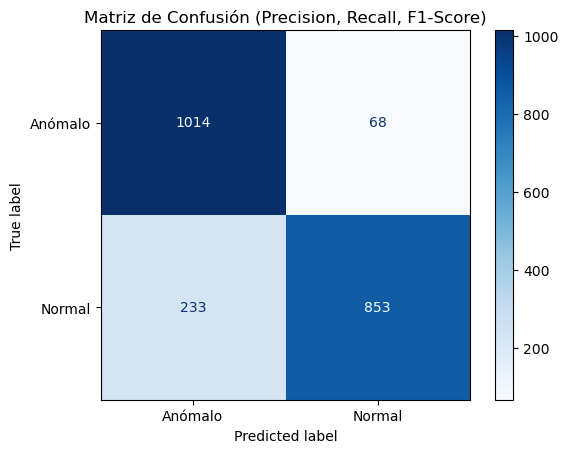

In [355]:
# Precisión, Recall y F1-Score

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Crear la columna Recall basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['Recall'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos
columnas_pca = ['PC1', 'PC2']  # Cambia a las columnas relevantes si no usas PCA
X = data[columnas_pca]
y = data['Recall']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo con un ajuste para priorizar la clase Anómalo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=64, verbose=1)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Calcular métricas de precisión, recall y F1-score
precision = precision_score(y_test_classes, y_pred_classes, average=None)
recall = recall_score(y_test_classes, y_pred_classes, average=None)
f1 = f1_score(y_test_classes, y_pred_classes, average=None)

print("Precision por clase:", precision)
print("Recall por clase:", recall)
print("F1-Score por clase:", f1)

# Generar el informe de clasificación
report = classification_report(y_test_classes, y_pred_classes, target_names=encoder.classes_)
print(report)

# Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión (Precision, Recall, F1-Score)')
plt.show()


In [356]:
data.tail(5)


ProductoCodigo                                          Nombre  \
3903            6155                           SMARTWATCH NM-PLUS BT   
3904            6156                     ETHERNET ADAPTADOR STARLINK   
3905            6157                  PIZARRA BLANCA MARCO ALUMINIO    
3906            6158            BORRADOR DE PIZARRA CON 3 MARCADORES   
3907            6159  PROTECTOR ALTA Y BAJA TENSION DIGITAL 10A 220V   

      ImpuestoId Impuesto                                    Descripcion  \
3903           1   IVA 21  relojes digitales para Donacion TK 21216/2024   
3904           1   IVA 21                                            NaN   
3905           1   IVA 21                                            NaN   
3906           1   IVA 21                                            NaN   
3907           1   IVA 21                                            NaN   

      Activo  CuentaContableCodigo              CuentaContable  \
3903       1                 10073  EQUIPOS - Bienes de Cambio   
3904       1                 10422     MATERIALES COMUNICACIÓN   
3905       1                 10082            MUEBLES Y UTILES   
3906       1                 10082            MUEBLES Y UTILES   
3907       1                 10422     MATERIALES COMUNICACIÓN   

      SubRubroCodigo                                  SubRubro  ...  \
3903             236                    CELULARES Y ACCESORIOS  ...   
3904              95   PERIFÉRICOS Y ACCESORIOS DE INFORMÁTICA  ...   
3905              86  ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...   
3906              86  ARTÍCULOS DE LIBRERÍA Y PAPELERÍA VARIOS  ...   
3907              75             OTROS CCESORIOS PARA CABLEADO  ...   

      catalogoSVM3 catalogoSVM4  catalogoRamdomF catalogoRamdomF2  \
3903        Normal       Normal           Normal           Normal   
3904        Normal       Normal           Normal           Normal   
3905        Normal       Normal           Normal           Normal   
3906        Normal       Normal           Normal           Normal   
3907        Normal       Normal           Normal           Normal   

      crossValidation RedesNeuronales  RedesNeuronales3 RedesNeuronalesSmote  \
3903           Normal          Normal            Normal               Normal   
3904           Normal          Normal            Normal               Normal   
3905           Normal          Normal            Normal               Normal   
3906           Normal          Normal            Normal               Normal   
3907           Normal          Normal            Normal               Normal   

      matriz  Recall  
3903  Normal  Normal  
3904  Normal  Normal  
3905  Normal  Normal  
3906  Normal  Normal  
3907  Normal  Normal  

[5 rows x 58 columns]

Epoch 1/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6004 - loss: 0.6700 - val_accuracy: 0.6518 - val_loss: 0.6307
Epoch 2/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6429 - loss: 0.6508 - val_accuracy: 0.6753 - val_loss: 0.6179
Epoch 3/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6625 - loss: 0.6317 - val_accuracy: 0.6642 - val_loss: 0.6105
Epoch 4/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6776 - loss: 0.6213 - val_accuracy: 0.6674 - val_loss: 0.6046
Epoch 5/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6722 - loss: 0.6156 - val_accuracy: 0.6757 - val_loss: 0.5989
Epoch 6/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6812 - loss: 0.6018 - val_accuracy: 0.7011 - val_loss: 0.5976
Epoch 7/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6880 - loss: 0.5930 - val_accuracy: 0.7020 - val_loss: 0.5940
Epoch 8/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6756 - loss: 0.5923 - val_accuracy: 0.6757 - val_loss

Epoch 52/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8120 - loss: 0.3891 - val_accuracy: 0.8326 - val_loss: 0.3325
Epoch 53/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8053 - loss: 0.3887 - val_accuracy: 0.8201 - val_loss: 0.3278
Epoch 54/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8153 - loss: 0.3772 - val_accuracy: 0.8289 - val_loss: 0.3272
Epoch 55/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8127 - loss: 0.3798 - val_accuracy: 0.8326 - val_loss: 0.3198
Epoch 56/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8142 - loss: 0.3757 - val_accuracy: 0.8312 - val_loss: 0.3274
Epoch 57/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8213 - loss: 0.3620 - val_accuracy: 0.8399 - val_loss: 0.3199
Epoch 58/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8106 - loss: 0.3858 - val_accuracy: 0.8404 - val_loss: 0.3189
Epoch 59/70
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8090 - loss: 0.3826 - val_accuracy: 0.8404 - v

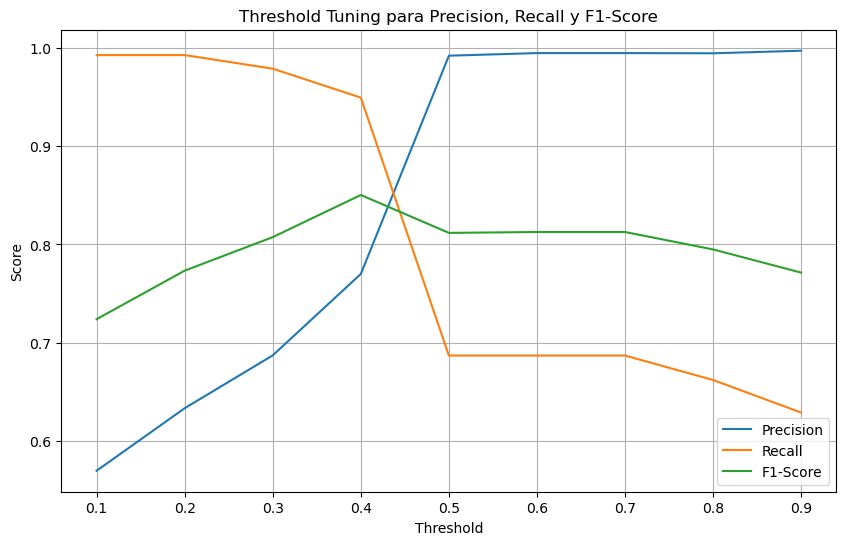

Mejor umbral basado en F1-Score: 0.4
Precision con umbral óptimo: 0.7699775952203136
Recall con umbral óptimo: 0.9493554327808471
F1-Score con umbral óptimo: 0.8503092783505155


In [357]:
#threshold tuning
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt

# Crear la columna thresholdtuning basada en reglas personalizadas
def clasificar_producto(row):
    if row.get('cluster_dbscan', 0) == -1 or row.get('Outlier', 0) == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['thresholdtuning'] = data.apply(clasificar_producto, axis=1)

# Preparación de los datos pCA
columnas_pca = ['PC1', 'PC2']  
X = data[columnas_pca]
y = data['thresholdtuning']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_encoded)
y_resampled_categorical = to_categorical(y_resampled)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=70, batch_size=64, verbose=1)

# Predecir las probabilidades del conjunto de prueba
y_pred_prob = model.predict(X_test)

# Implementar Threshold Tuning
thresholds = np.linspace(0.1, 0.9, 9)  # Diferentes umbrales
precision_scores = []
recall_scores = []
f1_scores = []

for threshold in thresholds:
    y_pred_classes = (y_pred_prob[:, 1] >= threshold).astype(int)
    precision = precision_score(y_test.argmax(axis=1), y_pred_classes)
    recall = recall_score(y_test.argmax(axis=1), y_pred_classes)
    f1 = f1_score(y_test.argmax(axis=1), y_pred_classes)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Graficar las métricas en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning para Precision, Recall y F1-Score')
plt.legend()
plt.grid()
plt.show()

# Seleccionar el mejor umbral basado en el F1-Score
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Mejor umbral basado en F1-Score: {best_threshold}")

# Recalcular métricas con el mejor umbral
y_pred_classes_best = (y_pred_prob[:, 1] >= best_threshold).astype(int)
final_precision = precision_score(y_test.argmax(axis=1), y_pred_classes_best)
final_recall = recall_score(y_test.argmax(axis=1), y_pred_classes_best)
final_f1 = f1_score(y_test.argmax(axis=1), y_pred_classes_best)

print(f"Precision con umbral óptimo: {final_precision}")
print(f"Recall con umbral óptimo: {final_recall}")
print(f"F1-Score con umbral óptimo: {final_f1}")


In [370]:
#Pruebas de predicciones con nuevo registro para clasificar
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE

# Entrenamiento previo del modelo

columnas_relevantes = ['SubRubroCodigo', 'RubroCodigo', 'SubclasificacionCodigo', 'ClasificacionCodigo']
data_relevante = data[columnas_relevantes]

# Escalado
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_relevante)

# Aplicación de PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PC1'] = data_pca[:, 0]
data['PC2'] = data_pca[:, 1]

# Creación de la variable objetivo
encoder = LabelEncoder()
data['Target10'] = encoder.fit_transform(data['RedesNeuronales'])

# División en entrenamiento y prueba
X = data[['PC1', 'PC2']]
y = data['Target10']

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Entrenamiento del modelo
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Definición del modelo de redes neuronales
nn_model = Sequential()
nn_model.add(Input(shape=(X_resampled.shape[1],)))
nn_model.add(Dense(128, activation='relu'))
nn_model.add(Dropout(0.4))
nn_model.add(Dense(64, activation='relu'))
nn_model.add(Dropout(0.3))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(len(np.unique(y_resampled)), activation='softmax'))
optimizer = Adam(learning_rate=0.001)
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
nn_model.fit(X_resampled, y_resampled, epochs=70, batch_size=64, verbose=1)

# Clasificación de un nuevo producto
nuevo_producto = pd.DataFrame([{
    'Nombre': 'preueba3',
    'RubroCodigo': 26,
    'SubRubroCodigo': 50,
    'ClasificacionCodigo': 2,
    'SubclasificacionCodigo': 5    
}])

# Escalado del nuevo producto
nuevo_producto_scaled = scaler.transform(nuevo_producto[columnas_relevantes])

# Transformación PCA
nuevo_producto_pca = pca.transform(nuevo_producto_scaled)

# Predicción con Random Forest
rf_pred = rf_model.predict(nuevo_producto_pca)
rf_clase_predicha = encoder.inverse_transform(rf_pred)
print(f"Predicción con Random Forest: {rf_clase_predicha[0]}")

# Predicción con Redes Neuronales
nn_pred_prob = nn_model.predict(nuevo_producto_pca)
nn_clase_predicha = encoder.inverse_transform([np.argmax(nn_pred_prob)])
print(f"Predicción con Redes Neuronales: {nn_clase_predicha[0]}")

# Resultados combinados
nuevo_producto['PC1'] = nuevo_producto_pca[0, 0]
nuevo_producto['PC2'] = nuevo_producto_pca[0, 1]
nuevo_producto['Prediccion_RF'] = rf_clase_predicha[0]
nuevo_producto['Prediccion_NN'] = nn_clase_predicha[0]
print("Nuevo producto clasificado:")
print(nuevo_producto)


Epoch 1/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6077 - loss: 0.6572
Epoch 2/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6621 - loss: 0.6157
Epoch 3/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 0.5983
Epoch 4/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6785 - loss: 0.5813
Epoch 5/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6706 - loss: 0.5816
Epoch 6/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6799 - loss: 0.5739
Epoch 7/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6788 - loss: 0.5687
Epoch 8/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6666 - loss: 0.5792
Epoch 9/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6774 - loss: 0.5658
Epoch 10/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6731 - loss: 0.5718
Epoch 11/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6766 - loss: 0.5649
Epoch 12/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8243 - loss: 0.3792
Epoch 69/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8199 - loss: 0.3789
Epoch 70/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8265 - loss: 0.3736
Predicción con Random Forest: Anómalo


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Predicción con Redes Neuronales: Anómalo
Nuevo producto clasificado:
     Nombre  RubroCodigo  SubRubroCodigo  ClasificacionCodigo  \
0  preueba3           26              50                    2   

   SubclasificacionCodigo       PC1       PC2 Prediccion_RF Prediccion_NN  
0                       5 -1.792914  0.402075       Anómalo       Anómalo  


In [371]:
#Pruebas de predicciones con nuevo registro para clasificar
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Simulación del dataset original
data = pd.DataFrame({
    'RubroCodigo': np.random.randint(1, 10, 100),
    'SubRubroCodigo': np.random.randint(1, 20, 100),
    'ClasificacionCodigo': np.random.randint(1, 15, 100),
    'SubclasificacionCodigo': np.random.randint(1, 10, 100),
    'Stock': np.random.randint(50, 500, 100),
    'cluster_dbscan': np.random.choice([-1, 0], 100),
    'Outlier': np.random.choice([0, 1], 100)
})

# Crear la columna target (clasificación)
def clasificar_producto(row):
    if row['cluster_dbscan'] == -1 or row['Outlier'] == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['target12'] = data.apply(clasificar_producto, axis=1)

# Seleccionar columnas relevantes
columnas_relevantes = ['RubroCodigo', 'SubRubroCodigo', 'ClasificacionCodigo', 'SubclasificacionCodigo', 'Stock']
X = data[columnas_relevantes]
y = data['target12']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Clasificar un nuevo producto
nuevo_producto = pd.DataFrame([{
    'RubroCodigo': 3,
    'SubRubroCodigo': 12,
    'ClasificacionCodigo': 5,
    'SubclasificacionCodigo': 8,
    'Stock': 50
}])

# Preprocesamiento del nuevo producto
nuevo_producto_scaled = scaler.transform(nuevo_producto)  # Escalar datos
nuevo_producto_pca = pca.transform(nuevo_producto_scaled)  # Transformar con PCA

# Predicción con el modelo entrenado
prediccion = model.predict(nuevo_producto_pca)
probabilidades = prediccion[0]  # Probabilidades para cada clase

# Interpretar la predicción
clase_predicha = encoder.inverse_transform([np.argmax(prediccion)])
print(f"Clase predicha: {clase_predicha[0]}")
print(f"Probabilidades: {probabilidades}")

# Agregar la predicción al DataFrame del nuevo producto
nuevo_producto['Prediccion'] = clase_predicha[0]
nuevo_producto['Probabilidad_Anómalo'] = probabilidades[1]
nuevo_producto['Probabilidad_Normal'] = probabilidades[0]

print("Nuevo producto clasificado:")
print(nuevo_producto)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - accuracy: 0.3985 - loss: 0.7148 - val_accuracy: 0.7000 - val_loss: 0.6763
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6977 - loss: 0.6658 - val_accuracy: 0.7667 - val_loss: 0.6511
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8030 - loss: 0.6136 - val_accuracy: 0.7667 - val_loss: 0.6358
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8290 - loss: 0.5824 - val_accuracy: 0.7667 - val_loss: 0.6247
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8251 - loss: 0.5557 - val_accuracy: 0.7667 - val_loss: 0.6149
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8017 - loss: 0.5545 - val_accuracy: 0.7667 - val_loss: 0.6075
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8134 - loss: 0.5344 - val_accuracy: 0.7667 - val_loss: 0.6026
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8017 - loss: 0.5193 - val_accuracy: 0.7667 - val_loss: 0.6011

In [373]:
#Pruebas de predicciones con nuevo registro para clasificar
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Simulación del dataset original
data = pd.DataFrame({
    'RubroCodigo': np.random.randint(1, 10, 100),
    'SubRubroCodigo': np.random.randint(1, 20, 100),
    'ClasificacionCodigo': np.random.randint(1, 15, 100),
    'SubclasificacionCodigo': np.random.randint(1, 10, 100),
    'Stock': np.random.randint(50, 500, 100),
    'cluster_dbscan': np.random.choice([-1, 0], 100),
    'Outlier': np.random.choice([0, 1], 100)
})

# Crear la columna target (clasificación)
def clasificar_producto(row):
    if row['cluster_dbscan'] == -1 or row['Outlier'] == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['target12'] = data.apply(clasificar_producto, axis=1)

# Seleccionar columnas relevantes
columnas_relevantes = ['RubroCodigo', 'SubRubroCodigo', 'ClasificacionCodigo', 'SubclasificacionCodigo', 'Stock']
X = data[columnas_relevantes]
y = data['target12']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Clasificar un nuevo producto
nuevo_producto = pd.DataFrame([{
    'RubroCodigo': 26,
    'SubRubroCodigo': 50,
    'ClasificacionCodigo': 2,
    'SubclasificacionCodigo': 5,
    'Stock': 50
}])

# Preprocesamiento del nuevo producto
nuevo_producto_scaled = scaler.transform(nuevo_producto)  # Escalar datos
nuevo_producto_pca = pca.transform(nuevo_producto_scaled)  # Transformar con PCA

# Predicción con el modelo entrenado
prediccion = model.predict(nuevo_producto_pca)
probabilidades = prediccion[0]  # Probabilidades para cada clase

# Interpretar la predicción
clase_predicha = encoder.inverse_transform([np.argmax(prediccion)])
print(f"Clase predicha: {clase_predicha[0]}")
print(f"Probabilidades: {probabilidades}")

# Agregar la predicción al DataFrame del nuevo producto
nuevo_producto['Prediccion'] = clase_predicha[0]
nuevo_producto['Probabilidad_Anómalo'] = probabilidades[1]
nuevo_producto['Probabilidad_Normal'] = probabilidades[0]

print("Nuevo producto clasificado:")
print(nuevo_producto)

#da buen resultado !!!!!!!!!

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 239ms/step - accuracy: 0.3901 - loss: 0.7233 - val_accuracy: 0.7333 - val_loss: 0.6664
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7165 - loss: 0.6456 - val_accuracy: 0.7333 - val_loss: 0.6404
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8433 - loss: 0.5859 - val_accuracy: 0.7333 - val_loss: 0.6262
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8199 - loss: 0.5620 - val_accuracy: 0.7333 - val_loss: 0.6209
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8433 - loss: 0.5008 - val_accuracy: 0.7333 - val_loss: 0.6229
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8238 - loss: 0.5140 - val_accuracy: 0.7333 - val_loss: 0.6329
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8316 - loss: 0.5001 - val_accuracy: 0.7333 - val_loss: 0.6515
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8472 - loss: 0.4705 - val_accuracy: 0.7333 - val_loss: 0.6758

In [374]:
#Pruebas de predicciones con nuevo registro para clasificar
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Simulación del dataset original
data = pd.DataFrame({
    'RubroCodigo': np.random.randint(1, 10, 100),
    'SubRubroCodigo': np.random.randint(1, 20, 100),
    'ClasificacionCodigo': np.random.randint(1, 15, 100),
    'SubclasificacionCodigo': np.random.randint(1, 10, 100),
    'Stock': np.random.randint(50, 500, 100),
    'cluster_dbscan': np.random.choice([-1, 0], 100),
    'Outlier': np.random.choice([0, 1], 100)
})

# Crear la columna target (clasificación)
def clasificar_producto(row):
    if row['cluster_dbscan'] == -1 or row['Outlier'] == 1:
        return 'Anómalo'
    else:
        return 'Normal'

data['target13'] = data.apply(clasificar_producto, axis=1)

# Seleccionar columnas relevantes
columnas_relevantes = ['RubroCodigo', 'SubRubroCodigo', 'ClasificacionCodigo', 'SubclasificacionCodigo', 'Stock']
X = data[columnas_relevantes]
y = data['target13']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Codificar la variable objetivo
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_categorical, test_size=0.3, random_state=42)

# Definición del modelo
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Clasificar un nuevo producto
nuevo_producto = pd.DataFrame([{
    'RubroCodigo': 2,
    'SubRubroCodigo': 11,
    'ClasificacionCodigo': 1,
    'SubclasificacionCodigo': 1,
    'Stock': 54
}])

# Preprocesamiento del nuevo producto
nuevo_producto_scaled = scaler.transform(nuevo_producto)  # Escalar datos
nuevo_producto_pca = pca.transform(nuevo_producto_scaled)  # Transformar con PCA

# Predicción con el modelo entrenado
prediccion = model.predict(nuevo_producto_pca)
probabilidades = prediccion[0]  # Probabilidades para cada clase

# Interpretar la predicción
clase_predicha = encoder.inverse_transform([np.argmax(prediccion)])
print(f"Clase predicha: {clase_predicha[0]}")
print(f"Probabilidades: {probabilidades}")

# Agregar la predicción al DataFrame del nuevo producto
nuevo_producto['Prediccion'] = clase_predicha[0]
nuevo_producto['Probabilidad_Anómalo'] = probabilidades[1]
nuevo_producto['Probabilidad_Normal'] = probabilidades[0]

print("Nuevo producto clasificado:")
print(nuevo_producto)



Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 221ms/step - accuracy: 0.4890 - loss: 0.6966 - val_accuracy: 0.8667 - val_loss: 0.6610
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4980 - loss: 0.6874 - val_accuracy: 0.8667 - val_loss: 0.6345
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5592 - loss: 0.6712 - val_accuracy: 0.8667 - val_loss: 0.6171
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6977 - loss: 0.6537 - val_accuracy: 0.8667 - val_loss: 0.6046
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7367 - loss: 0.6280 - val_accuracy: 0.8667 - val_loss: 0.5905
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7055 - loss: 0.6406 - val_accuracy: 0.8667 - val_loss: 0.5761
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7133 - loss: 0.6304 - val_accuracy: 0.8667 - val_loss: 0.5634
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7133 - loss: 0.6191 - val_accuracy: 0.8667 - val_loss: 0.5544

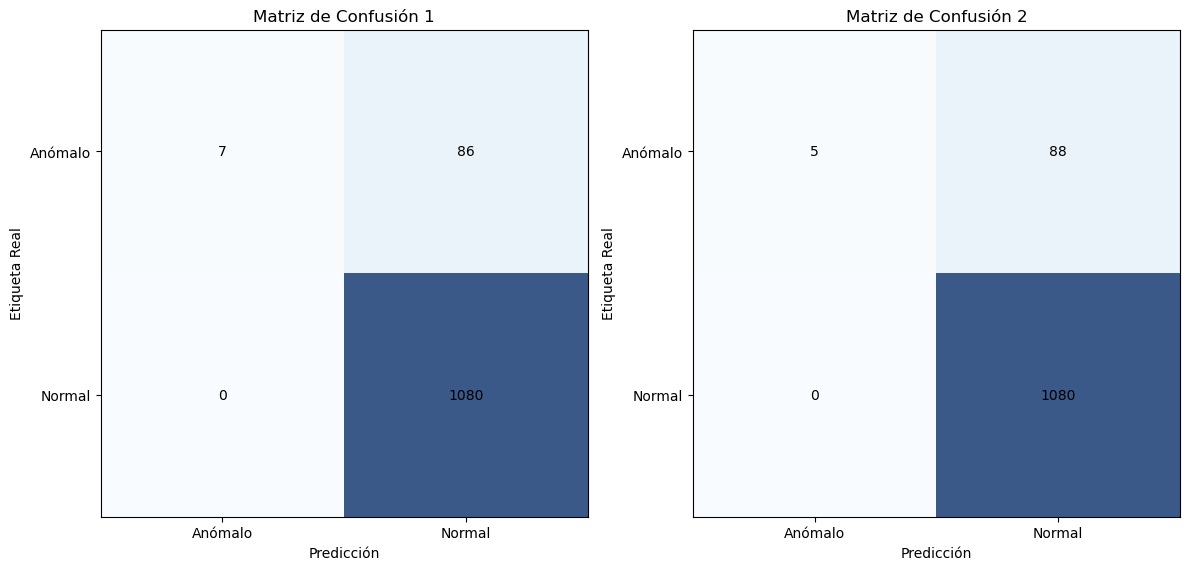

In [389]:
#Graficos de matrices para agregar al informe
import matplotlib.pyplot as plt
import numpy as np

# Definir las dos matrices de confusión
matriz1 = np.array([[7, 86],
                    [0, 1080]])
matriz2 = np.array([[5, 88],
                    [0, 1080]])

# Crear un gráfico comparativo de ambas matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Primera matriz
axs[0].imshow(matriz1, cmap='Blues', alpha=0.8)
for i in range(matriz1.shape[0]):
    for j in range(matriz1.shape[1]):
        axs[0].text(j, i, str(matriz1[i, j]), ha='center', va='center', color='black')
axs[0].set_title("Matriz de Confusión 1")
axs[0].set_xlabel("Predicción")
axs[0].set_ylabel("Etiqueta Real")
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(["Anómalo", "Normal"])
axs[0].set_yticklabels(["Anómalo", "Normal"])

# Segunda matriz
axs[1].imshow(matriz2, cmap='Blues', alpha=0.8)
for i in range(matriz2.shape[0]):
    for j in range(matriz2.shape[1]):
        axs[1].text(j, i, str(matriz2[i, j]), ha='center', va='center', color='black')
axs[1].set_title("Matriz de Confusión 2")
axs[1].set_xlabel("Predicción")
axs[1].set_ylabel("Etiqueta Real")
axs[1].set_xticks([0, 1])
axs[1].set_yticks([0, 1])
axs[1].set_xticklabels(["Anómalo", "Normal"])
axs[1].set_yticklabels(["Anómalo", "Normal"])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


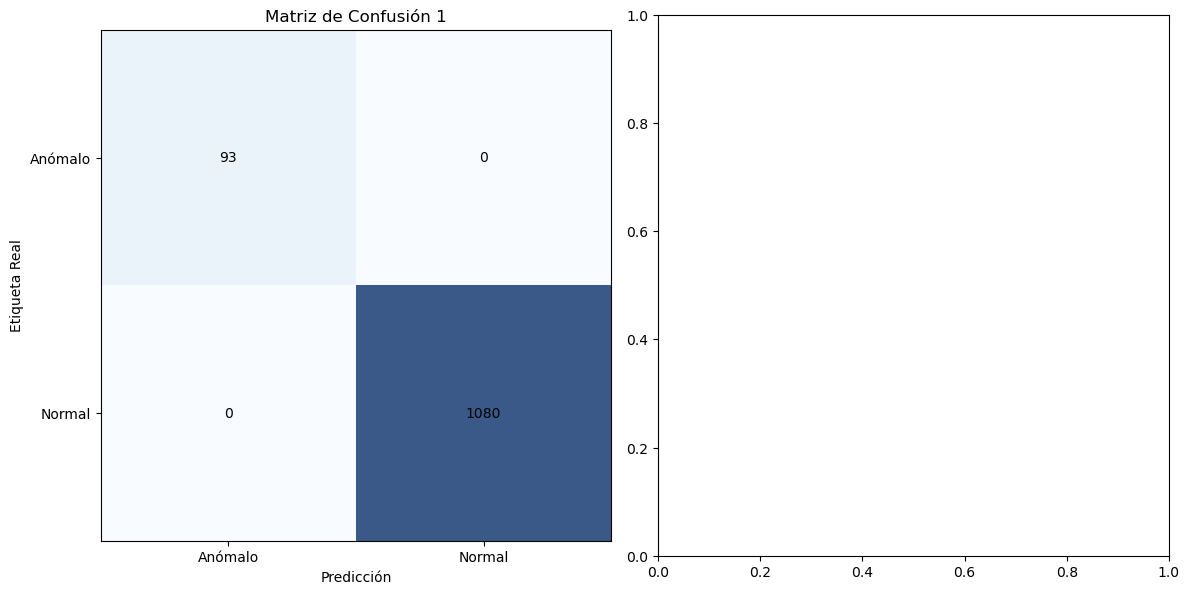

In [392]:
#Graficos de matrices para agregar al informe
import matplotlib.pyplot as plt
import numpy as np


# Definir las dos matrices de confusión
matriz1 = np.array([[9,0],
                    [0, 1080]])
matriz2 = np.array([[93, 0],
                    [0, 1080]])

# Crear un gráfico comparativo de ambas matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Primera matriz
axs[0].imshow(matriz1, cmap='Blues', alpha=0.8)
for i in range(matriz1.shape[0]):
    for j in range(matriz1.shape[1]):
        axs[0].text(j, i, str(matriz1[i, j]), ha='center', va='center', color='black')
axs[0].set_title("Matriz de Confusión 1")
axs[0].set_xlabel("Predicción")
axs[0].set_ylabel("Etiqueta Real")
axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[0].set_xticklabels(["Anómalo", "Normal"])
axs[0].set_yticklabels(["Anómalo", "Normal"])



# Mostrar el gráfico
plt.tight_layout()
plt.show()